<a href="https://www.kaggle.com/code/aliyaya/notebook-aliya?scriptVersionId=93823884" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices/data.csv


In [2]:
import numpy as np
import pandas as pd
import json
import re

In [3]:
data = pd.read_csv('/kaggle/input/house-prices/data.csv')

In [4]:
data.head(3)

,status,private pool,propertyType,street,baths,homeFacts,fireplace,city,schools,sqft,zipcode,beds,state,stories,mls-id,PrivatePool,MlsId,target
0,Active,NaN,Single Family Home,240 Heather Ln,3.5,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",Gas Logs,Southern Pines,"[{'rating': ['4', '4', '7', 'NR', '4', '7', 'N...",2900,28387,4,NC,NaN,NaN,NaN,611019,"$418,000"
1,for sale,NaN,single-family home,12911 E Heroy Ave,3 Baths,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",NaN,Spokane Valley,"[{'rating': ['4/10', 'None/10', '4/10'], 'data...","1,947 sqft",99216,3 Beds,WA,2.0,NaN,NaN,201916904,"$310,000"
2,for sale,NaN,single-family home,2005 Westridge Rd,2 Baths,"{'atAGlanceFacts': [{'factValue': '1961', 'fac...",yes,Los Angeles,"[{'rating': ['8/10', '4/10', '8/10'], 'data': ...","3,000 sqft",90049,3 Beds,CA,1.0,NaN,yes,FR19221027,"$2,895,000"


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377185 entries, 0 to 377184
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   status        337267 non-null  object
 1   private pool  4181 non-null    object
 2   propertyType  342452 non-null  object
 3   street        377183 non-null  object
 4   baths         270847 non-null  object
 5   homeFacts     377185 non-null  object
 6   fireplace     103115 non-null  object
 7   city          377151 non-null  object
 8   schools       377185 non-null  object
 9   sqft          336608 non-null  object
 10  zipcode       377185 non-null  object
 11  beds          285903 non-null  object
 12  state         377185 non-null  object
 13  stories       226470 non-null  object
 14  mls-id        24942 non-null   object
 15  PrivatePool   40311 non-null   object
 16  MlsId         310305 non-null  object
 17  target        374704 non-null  object
dtypes: object(18)
memory usa

In [6]:
data.columns

Index(['status', 'private pool', 'propertyType', 'street', 'baths',
       'homeFacts', 'fireplace', 'city', 'schools', 'sqft', 'zipcode', 'beds',
       'state', 'stories', 'mls-id', 'PrivatePool', 'MlsId', 'target'],
      dtype='object')

* 'status'	    - статус, 
* 'private pool	- частный бассейн, 
* 'propertyType'	- тип недвижимости, поместья, свойства, 
* 'street'	    - улица, 
* 'baths'         - бани,     
* 'homeFacts'	- домашние факты, сведения о доме
* 'fireplace'	- камин, 
* 'city'		- город, 
* 'schools'	- школы, 
* 'sqft'		- квадратный фут, 
* 'zipcode'	- почтовый индекс, 
* 'beds'		- кровати, спальня
* 'state'		- государство, штаты, 
* 'stories'	- рассказы--(этажность недвижимости)?, 
* 'mls-id'	- млс-идентификатор, 
* 'PrivatePool'	- Частный бассейн, 
* 'MlsId'		- MlsId идентификатор,
* 'target'	- цель (цена недвижиости)* 'status'	    - статус.


## EDA

#### Признак "target"

In [7]:
data.isna().sum()/(data.shape[0]/100)

status          10.583136
private pool    98.891525
propertyType     9.208479
street           0.000530
baths           28.192532
homeFacts        0.000000
fireplace       72.661956
city             0.009014
schools          0.000000
sqft            10.757851
zipcode          0.000000
beds            24.200856
state            0.000000
stories         39.957846
mls-id          93.387330
PrivatePool     89.312672
MlsId           17.731352
target           0.657767
dtype: float64

Строки с пустыми значениями признака "target" надо удалять.

In [8]:
data.drop(data[data.target.isna()].index, inplace=True)
data = data.reset_index(drop=True)

In [9]:
def make_target(x):
    x = re.sub('[^0-9]', '', x)
    x = int(x)
    return x

data.target = data.target.apply(make_target)

In [10]:
data.target.describe()

count    3.747040e+05
mean     6.447575e+05
std      1.841431e+06
min      1.000000e+00
25%      1.869900e+05
50%      3.200000e+05
75%      5.821000e+05
max      1.950000e+08
Name: target, dtype: float64

По содержанию будем предполагать, что признаки ['street', 'mls-id', 'MlsId', 'zipcode'] не должны сильно влиять на цену недвижимости. Поэтому удаляем этих признаков.

In [11]:
cols_drop = ['street', 'zipcode',  'mls-id', 'MlsId']
data.drop(cols_drop, axis=1, inplace=True)

In [12]:
df = data.copy()
df.shape

(374704, 14)

##### Если данные не качественные, то любая хорошая модель не поможет получить  хороший результат
Для анализа данных признаков используются общие стандартные методы python, numpy, pandas, matplotlib, seaborn, модели sklearn, разные приемы парсинга. При необходимости придется анализировать данные построчно.

#### Признак "status"

In [13]:
df['status'].value_counts().index.tolist()

['for sale',
 'Active',
 'For sale',
 'foreclosure',
 'New construction',
 'Pending',
 'Pre-foreclosure',
 'P',
 'Pre-foreclosure / auction',
 'Under Contract Show',
 ' / auction',
 'Under Contract   Showing',
 'Active Under Contract',
 'New',
 'Under Contract',
 'Contingent',
 'Price Change',
 'Auction',
 'A Active',
 'for rent',
 'Foreclosure',
 'Foreclosed',
 'Under Contract Backups',
 'Contingent Finance And Inspection',
 'Pending Continue To Show',
 'Option Pending',
 'Back on Market',
 'pending',
 'Contingent Show',
 'Pending Taking Backups',
 'Option Contract',
 'Active With Offer',
 'Pending With Contingencies',
 'Active Backup',
 'C',
 'Pi',
 'Contract P',
 'P Pending Sale',
 'Auction - Active',
 'Listing Extended',
 'Due Diligence Period',
 'Contract Contingent On Buyer Sale',
 'C Continue Show',
 'Pending - Taking Backups',
 'Active/Contingent',
 'Offer Pending Signature',
 'Contingent Take Backup',
 'Pending Inspection',
 'Active With Contingencies',
 'Contingent   Show',
 

In [14]:
df['status'].nunique()

156

'Pf' = 'Pre foreclosure'
'Ps' = 'Pending Sale'
'Bckp' = 'Backup'
W/ Cont. = 'with contract' ???
'insp' = 'inspection'

In [15]:
df['status'].value_counts()

for sale                   156100
Active                     105206
For sale                    43465
foreclosure                  5677
New construction             5459
                            ...  
Coming soon: Nov 8.             1
Coming soon: Oct 29.            1
Coming soon: Dec 15.            1
Pending W/Backup Wanted         1
Coming soon: Dec 23.            1
Name: status, Length: 156, dtype: int64

In [16]:
def make_status(x):
    if x.startswith('Coming soon'): x = 'coming soon'
    x = x.replace('Showing', 'show')
    x = x.replace('Pf', 'pre foreclosure')
    x = x.replace('Ps', 'pending Sale')
    x = x.replace('Bckp', 'backups')
    # x = x.replace('insp', 'inspection')              
    x = x.lower()
    x = re.sub('[^a-z:]', ' ', x)
    x = re.sub(r'\b\w{,2}\b', '', x)
    x = re.sub(r'\s+', ' ', x)
    return x.strip()

In [17]:
df['status'] = df['status'].fillna('other')
df['status'] = df['status'].apply(make_status)

df['status'].value_counts()

for sale                 199567
active                   105649
other                     39257
foreclosure                6020
new construction           5459
                          ...  
pending backup wanted         1
conditional contract          1
pending bring backup          1
temporary active              1
backup                        1
Name: status, Length: 82, dtype: int64

In [18]:
# df['status'].value_counts().index.tolist()

Термины, используемые в сфере продажи-покупки недвижимости:
status - статус, состояние
estate - недвижимость
Multiple Listing Service (MLS) - Служба множественного листинга 

'foreclosed' - 'исключено', 'лишен права выкупа'
'foreclosure' - 'выкупа'. — это процесс, когда ваша недвижимость переходит к кредитору из-за неуплаты Вами ипотечных выплат. Продажа foreclosure недвижимости отличается от традиционных продаж. 
Переход недвижимости в собственность залогодержателя если, по какой-либо причине, вы не можете выплачивать ваш mortgage
Mortgage - ссуда в банке на недвижимость (Ипотека).

'pre foreclosure' - «до выкупа»
'pre foreclosure auction' - «аукцион до выкупа»

'under contract showing',
'under contract show',
'under contract' - 'по договору',
'active under contract' - «действующий по контракту»,

'under contract backups' - резервное копирование по контракту,
'active backup'  -  «активное резервное копирование»
'backup contract' - «резервный контракт»
'active backup' - «активное резервное копирование»

'contingency' - 'непредвиденные обстоятельства'
'contingency contract' - «контракт на случай непредвиденных обстоятельств»,
'active contingency' - 'активное непредвиденное обстоятельство',
'insp inspection contingency' - 'непредвиденные обстоятельства инспектирования'

'pending escape clause' - 'ожидающая оговорка об освобождении'

'pending backup wanted' - «требуется резервное копирование в ожидании»
'pending take backups' - «ожидание создания резервных копий»
 
'pending continue show financing' - 'в ожидании продолжения шоу финансирования'
'pending continue show' - 'ожидание продолжения шоу'

'pending insp finance' - 'в ожидании финансовой поддержки'
'pending inspection' - "в ожидании проверки"

'due diligence period' - «период должной осмотрительности»

'activated' - активирован (active)

'active with contract' - 'активен с контрактом'
'active option' =
= active with contract =
= 'active option contract' =
= contingency period =
= due diligence period
«активный вариант» - «активный опционный контракт»,
In some states, the active option contract is referred to as a contingency period or due diligence period.

'active with offer' - 'активен с предложением'


'active auction',
'auction active',
'auction'

contingency, contingencies - случайность, непредвиденные обстоятельства 
contingent - условный. В сфере недвижимости, когда дом указан как условный, это означает, что предложение было сделано и принято, но до завершения сделки должны быть выполнены некоторые дополнительные критерии. В сфере недвижимости, когда дом указан как условный, это означает, что предложение было сделано и принято, но до завершения сделки должны быть выполнены некоторые дополнительные критерии.

cooling-off period - период обдумывание (период охлаждения)
conditional offers - условные предложения


In [19]:
df['status'] = df['status'].apply(lambda x: 'other' if x=='' else x)

In [20]:
df['status'].value_counts()['continue show']

20

In [21]:
# Заменим некоторые слова для приобретения единой формы
old_words = ['auction active', 'pending continue show financing', 'activated']
new_words = ['active auction', 'pending continue show','active']

for i in range(0,len(new_words)):
    df['status'] = df['status'].apply(lambda x: 
                                    x.replace(old_words[i], new_words[i]))

In [22]:
new_string = ['active with contract', 'active option contract', 
              'contingency period', 'due diligence period']
for i in range(0, len(new_string)):
    df['status'] = df['status'].apply(lambda x: 'active option' 
                                    if (-1 != x.find(new_string[i])) else x)

df['status'] = df['status'].apply(lambda x: 'for rent' 
                                        if (-1 != x.find('for rent')) else x)

In [23]:
df['status'] = df['status'].apply(lambda x: 'active auction' 
                                  if x=='auction' else x)
df['status'].nunique()

72

In [24]:
df['status'].value_counts().index.tolist()

['for sale',
 'active',
 'other',
 'foreclosure',
 'new construction',
 'pending',
 'pre foreclosure',
 'under contract show',
 'active auction',
 'pre foreclosure auction',
 'active under contract',
 'under contract',
 'new',
 'contingent',
 'price change',
 'for rent',
 'foreclosed',
 'under contract backups',
 'contingent finance and inspection',
 'pending continue show',
 'contingent show',
 'back market',
 'coming soon',
 'option pending',
 'pending taking backups',
 'option contract',
 'active with offer',
 'pending with contingencies',
 'active option',
 'pending sale',
 'active backup',
 'contract',
 'listing extended',
 'contract contingent buyer sale',
 'active contingent',
 'continue show',
 'offer pending signature',
 'pending inspection',
 'contingent take backup',
 'active with contingencies',
 'contingent escape',
 'pending insp finance',
 'insp inspection contingency',
 'contingency contract',
 'active contingency',
 'backup contract',
 'contingent lien holder release',

In [25]:
# df['status'].value_counts()

Статусы недвижимости разнобразны - 72 вида. По ходу модельного эксперимента рассмотрим варианты уменьшения категории, выбрав топ 50 или 30 категории.

In [26]:
top_status = df['status'].value_counts()[:50].index
df['status'] = df['status'].apply(lambda x: x 
                                              if x in top_status else 'other')

In [27]:
df['status'].value_counts()

for sale                             199567
active                               105651
other                                 40860
foreclosure                            6020
new construction                       5459
pending                                4826
pre foreclosure                        2004
under contract show                    1987
active auction                         1330
pre foreclosure auction                1281
active under contract                   718
under contract                          702
new                                     690
contingent                              581
price change                            563
for rent                                412
foreclosed                              294
under contract backups                  253
contingent finance and inspection       245
pending continue show                   205
contingent show                         115
back market                             112
option pending                  

#### Признак "propertyType"

Типы домов, жилищ, и их основные характеристики:
1. Apartment - Квартира
2. Condo - Квартира (Кондоминиум)
3. Co-Op - Совместная (Кооперативная квартира)
4. Single-Family (Detached)
5. Tiny Home -  Односемейный (маленький, отдельный)
6.  Townhome, Townhouse 
7. Cape Cod - черепица, деревянный сайдинг, центральная дверь с окнами по бокам, 1-2 этажf.
8. Colonial home - Два этажа с лишним, симметричный, центральная лестница, формальный вид. Different types include English, French, Dutch, Georgian, Spanish and American (which closely resembles English) colonials.
9. Contemporary  - Основные характеристики: Чистые, простые линии; нейтральные цвета; натуральные текстуры 
10. Cottage - Уютная, небольшая веранда; небольшие жилые помещения; индивидуальный характер.
11. Craftsman - "ремесленник"
    элементы ручной работы из дерева, выступающие балки, большие колонны.
12. Greek Revival - 
     большие белые колонны, украшения в греческом стиле, парадный вход.
13. Farmhouse -  
    деревенское, прямоугольное, большое крыльцо, крыши в стиле сарая и особенности.
14. French Country - 
    влияние прованса, каменный внешний вид, состаренный вид.
15. Mediterranean - белая штукатурка, теплое дерево и камень, черепичные крыши, есть элементы испанских и итальянских вилл.
16. Midcentury Modern - 
    сочетание органики и геометрии, гладкий, лаконичный, большие окна.
17. Ranch - 
     один этаж, низкая крыша, открытые жилые помещения, задний двор.
18. Split-Level - 
    Жилые помещения разделены короткими лестничными пролетами.
19. Tudor - 
    Деревянный каркас, каменная кладка, ассимметричные, крутые двускатные крыши.
20. Victorian (Queen Anne Houses) - два-три этажа, богато украшенные крутые
    двускатные крыши, небольшие башни, яркие фасады.

Источник:
https://www.rocketmortgage.com/learn/types-of-houses

Europian Houses style - 
    часто используют кирпич или камень и включают в себя высокие крутые крыши, высокие окна, часто со ставнями, и традиционные декоративные детали, такие как фронтоны и замковые камни.

log home - деревяный дом
    
mortgage - ипотека


Некоторые жаргонные сокращения, для исправления.

'farms/ranches' - 1-2 story
  
less than 4 floors == 3 story
'4+ floors'

* cluster home
* modular
* prefab
* manufactured home (house)  = mobile | prefab | modular
* transitional - внутри домашний стиль

* mo2 le - mobile
* mo2le  - mobile
* 'ca2 n' - cabin

* midcentury
* mid century
* mid-century

In [28]:
df.shape

(374704, 14)

In [29]:
df['propertyType'].isna().sum()

34554

In [30]:
df['propertyType'] = df['propertyType'].fillna('no data')
df['propertyType'] = df['propertyType'].apply(lambda x: 'no data' 
                                        if x ==' ' or x=='unknown' else x)
df['propertyType'] = df['propertyType'].apply(lambda x: x.lower())

df['propertyType'].value_counts()

single-family home                                             91376
single family                                                  61888
condo                                                          42372
no data                                                        34708
single family home                                             31725
                                                               ...  
contemporary, farmhouse                                            1
2 stories, traditional, mediterranean, texas hill country          1
1 story, contemporary, traditional, mediterranean                  1
loft, warehouse                                                    1
bilevel, converted dwelling, loft with bedrooms, condo/unit        1
Name: propertyType, Length: 1270, dtype: int64

In [31]:
df['propertyType'].value_counts()['singlefamilyresidence']

179

In [32]:
df['propertyType'].value_counts().index.tolist()

['single-family home',
 'single family',
 'condo',
 'no data',
 'single family home',
 'lot/land',
 'townhouse',
 'land',
 'multi-family',
 'condo/townhome/row home/co-op',
 'traditional',
 'coop',
 'multi family',
 'high rise',
 'ranch',
 'detached, one story',
 'mobile/manufactured',
 'single detached, traditional',
 'contemporary',
 'multi-family home',
 '1 story',
 'colonial',
 'mobile / manufactured',
 'contemporary/modern',
 '2 stories',
 'apartment',
 'mfd/mobile home',
 'single detached',
 'detached, two story',
 'one story',
 'transitional',
 'cooperative',
 'florida',
 'bungalow',
 'farms/ranches',
 'two story',
 'garden home',
 'cape cod',
 '2 story',
 '2 stories, traditional',
 'spanish/mediterranean',
 'other style',
 '1 story, traditional',
 'other',
 'condo/townhome, traditional',
 'craftsman',
 'contemporary/modern, traditional',
 'condo/townhome',
 'condo/townhome, contemporary/modern',
 'singlefamilyresidence',
 'single detached, contemporary/modern',
 'multiple occup

In [33]:
df['propertyType'].value_counts()['yes']

10

Строки с "land" значением признака 'propertyType' удаляем. Так как нам необходимо оценить недвижимость. Земельный участок нас не интересует. 

In [34]:
df['propertyType'] = df['propertyType'].apply(lambda x: x.replace('lot/land', 'land'))
df['propertyType'] = df['propertyType'].apply(lambda x: 'land' if (-1 != x.find('land')) else x)

In [35]:
ind_land_drop = df[df['propertyType']=='land'].index
ind_land_drop

Int64Index([     4,     41,     49,     50,     61,     69,    103,    124,
               140,    173,
            ...
            374599, 374604, 374618, 374621, 374641, 374643, 374647, 374654,
            374659, 374680],
           dtype='int64', length=31477)

In [36]:
df.drop(ind_land_drop,  inplace=True)
df = df.reset_index(drop=True)

Содержимое признака небрежно заполнено и данные очень разнообразны, и требуют сложного парсинга содежимого признака.
Заменим некоторые сокрашенные слова, расшифруем и заменим синонимы на более общепринятые.

In [37]:
old = ['one', 'two', '2-', 'stories', '1 1/2', 'tri-', 'single family',
       'singlefamilyresidence', 'townhome',   'bi', 'bi-', 'multi family', 
       'hi-', 'high ', 'condominium',  '4 plex', 'other', 'ca2 n', 'cape cod',
       'mid century', 'mid-century',  'mo2 le', 'mo2le', ' / ','mfd',   
       'co-op', 'coop',  'modernist', 'key west', 'farm house',
       'queen anne', ' -level', 'floors', 'mobile home', 'manuf/mobile',
       'less than 4 story', 'historic/older', 'quad']
new = ['1', '2', '2 ', 'story',  '1.5', '3 ', 'single-family',
       'single-family', 'townhouse',  '2 ', '2 ',  'multi-family',
       'high-', 'high-', 'condo',  '4-plex', 'other style', 'cabin', 'cape', 
       'midcentury', 'midcentury', 'mobile', 'mobile', '/', 'manufactured', 
        'cooperative', 'cooperative',  'modern', 'elevated', 'farmhouse',
        'victorian', ' level',  'story', 'manufactured', 'manufactured',
        '3 story', 'historical', '4']
for i in range(0,len(new)):
    df['propertyType'] = df['propertyType'].apply(lambda x: 
                                                  x.replace(old[i], new[i]))

In [38]:
df['propertyType'].value_counts()

single-family home                                             123101
single-family                                                   62067
condo                                                           42428
no data                                                         34708
townhouse                                                       18352
                                                                ...  
other style, ranch                                                  1
traditional, colonial, federal                                      1
condo/townhouse, french, split level                                1
colonial, duplex                                                    1
2 level, converted dwelling, loft with bedrooms, condo/unit         1
Name: propertyType, Length: 1229, dtype: int64

In [39]:
# df['propertyType'].value_counts().index.tolist() 

In [40]:
# В признаке 'propertyType' много сведений об этажности домов
# Выделим все  эти данные
# Это небходимо для уточнения и дополнения признака 'stories'
df['Property_story'] = df['propertyType'].apply(lambda x: 
                                        x if -1!= x.find('story') else 'no')

In [41]:
df['Property_story'].value_counts()

no                                                          335515
1 story                                                       1827
detached, 1 story                                             1614
2 story                                                       1506
detached, 2 story                                              638
                                                             ...  
1 story, modern                                                  1
3+ story, texas hill country                                     1
2 story, traditional, other style (see remarks)                  1
1 story, contemporary, ranch, traditional, mediterranean         1
3+ story, contemporary, traditional                              1
Name: Property_story, Length: 227, dtype: int64

In [42]:
# df['Property_story'].value_counts().index.tolist()

In [43]:
# Dыделим индексы строк, имеющие данные об этажности
ind_story = df[df['Property_story']!='no'].index
ind_story

Int64Index([    14,     90,    106,    154,    166,    181,    198,    277,
               342,    469,
            ...
            342668, 342676, 342743, 342747, 342851, 342853, 342945, 343005,
            343131, 343135],
           dtype='int64', length=7712)

In [44]:
df['stories'][ind_story].value_counts()

Multi/Split      26
2                 8
Three Or More     7
1.7               2
1                 2
1 Level           1
Name: stories, dtype: int64

In [45]:
df['Property_story'][ind_story].value_counts().index.tolist()

['1 story',
 'detached, 1 story',
 '2 story',
 'detached, 2 story',
 '2 story, traditional',
 '1 story, traditional',
 '2 story, contemporary',
 '1 story, contemporary',
 'low-rise (1-3 story)',
 'ranch, 1 story',
 'detached, ranch, 1 story',
 'detached, 2 story, spanish/mediterranean',
 '1 story with basement',
 'detached, 1 story, spanish/mediterranean',
 '1 story, ranch',
 'high-rise (8+ story)',
 '1 story, historical',
 '2 story with basement',
 '2 story, mediterranean',
 '1 story, spanish/mediterranean',
 '3 story',
 '2 story, spanish/mediterranean',
 'manufactured house, ranch, 1 story',
 '2 story, historical',
 '2 story, contemporary, traditional',
 '1 story, ranch, traditional',
 'mid-rise (4-7 story)',
 '2 story, texas hill country',
 '2 story, craftsman',
 '3+ story',
 '1 story with basement, craftsman',
 'detached, patio home, 2 story',
 'manufactured house, ranch, 1 story, manufactured home',
 '1 story, mediterranean',
 '3+ story, contemporary',
 '1 story, texas hill countr

In [46]:
# Оставляем сведения только относящиеся к этажности и записываем в признак 'stories'
def story(x):
    s = x.split(',')
    se = ''
    for i in range(0, len(s)):
        if s[i].find('story')!=-1:
            se = s[i]
    return se.strip()

df.loc[ind_story, 'stories'] = df['Property_story'][ind_story].apply(story)
df['stories'][ind_story].value_counts()

1 story                    4332
2 story                    2919
1 story with basement        99
low-rise (1-3 story)         90
2 story with basement        68
3 story                      44
3+ story                     44
high-rise (8+ story)         38
1.5 story with basement      21
4+ story                     17
mid-rise (4-7 story)         15
1.5 story                    13
1 story/ranch                 7
manufactured 1 story          1
coastal 2 story               1
2.5 story                     1
2 story condo                 1
1 story traditional           1
Name: stories, dtype: int64

In [47]:
# Очищаем от слов, относящихся к типам домов и записываем в признак 'stories'
del_str = ['/ranch', 'manufactured', 'coastal', 'traditional', 'condo']

def del_substr(x):
    for i in range(0, len(del_str)):
        x = x.replace(del_str[i], '').strip()
    return x

df.loc[ind_story, 'stories'] = df['stories'][ind_story].apply(del_substr)
df['stories'][ind_story].value_counts()

1 story                    4341
2 story                    2921
1 story with basement        99
low-rise (1-3 story)         90
2 story with basement        68
3 story                      44
3+ story                     44
high-rise (8+ story)         38
1.5 story with basement      21
4+ story                     17
mid-rise (4-7 story)         15
1.5 story                    13
2.5 story                     1
Name: stories, dtype: int64

In [48]:
# Удаление сведений, относящихся к этажности для перезаписи в признак 'propertyType'
def type_del_story(x):
    s = x.split(',')
    for i in range(0, len(s)):
        if s[i].find('story')!=-1:
            if len(s)==1 and i==0:
                s[i] = 'other'
            if len(s)>1:
                s[i] = ','
            if len(s)>1 and i==0:
                s[i]=''
        x = '' .join(s).strip()
    return x

In [49]:
df.loc[ind_story, 'propertyType'] = df['Property_story'][ind_story].apply(type_del_story)

df['propertyType'][ind_story].value_counts()

other                                       3641
detached,                                   2252
traditional                                  540
contemporary                                 266
detached, spanish/mediterranean              120
                                            ... 
texas hill country a-frame                     1
colonial contemporary                          1
split level contemporary traditional           1
contemporary ranch traditional craftsman       1
multi-level patio home townhouse               1
Name: propertyType, Length: 127, dtype: int64

In [50]:
df.drop('Property_story', axis=1, inplace=True)

Далее в полях признака 'propertyType' оставляем основные типы домов, жилищ

In [51]:
# Присвоение полям новых названий в соответствии с найденной подстрокой
new = ['mediterranean', 'english', 'georgian', 'florida','spanish',
        'lake house', 'tudor', 'victorian', 'ranch', 'townhouse', 
        'single-family','multi-family', 'single detached', 'detached', 
        'high-rise', 'colonial', 'traditional',
        'condo', 'contemporary', 'other style', 'bungalow', 'craftsman',
        'cape cod','cooperative', 'a-frame',  'custom', 'loft', 
        'multi-level', 'attached', 'manufactured',  'side-by-side', 
        'cottage',  'french', 'cluster home', 'garden home', 
        'farmhouse', 'elevated',  'historical', 'transitional','penthouse',
        'modern']

for i in range(0, len(new)):
    df['propertyType'] = df['propertyType'].apply(lambda x: new[i] 
                                            if (-1 != x.find(new[i])) else x)

In [52]:
#  Присвоение  полям новых значений с изменением
old = ['cape','log']
new = ['cape cod','log home']

for i in range(0,len(new)):
    df['propertyType'] = df['propertyType'].apply(lambda x: new[i] 
                                              if -1!=x.find(old[i])  else x)
df['propertyType'] = df['propertyType'].apply(lambda x: 'historical'
                        if (x=='historic') or (x=='historic vintage') else x)

In [53]:
df['propertyType'].value_counts()

single-family      185168
condo               42776
no data             34708
townhouse           27014
multi-family        12170
                    ...  
bermuda                 1
back-to-back            1
split,                  1
resort property         1
prairie                 1
Name: propertyType, Length: 144, dtype: int64

In [54]:
# df['propertyType'].value_counts().index.tolist() 

Непонятные значения признака 'propertyType':
'no data' - эти данные - NaN
'camp', 'end unit', 'yes' - что эти данные означают для  типов квартир и домов?

Привести к единым данным:

'no data' = 'other style' = 'other' ?!

In [55]:
df['propertyType'] = df['propertyType'].apply(lambda x: 'other style' 
                            if (x=='no data') or (x=='other')  else x)

In [56]:
# С целью уменьшения числа категорий, выберем топ 50 или топ 100 типов стилей домов.
top_Type = df['propertyType'].value_counts()[:50].index
df['propertyType'] = df['propertyType'].apply(lambda x: x 
                                            if x in top_Type else 'other style')

In [57]:
df['propertyType'].value_counts()

single-family            185168
condo                     42776
other style               39584
townhouse                 27014
multi-family              12170
traditional                7171
detached                   5305
cooperative                3835
manufactured               3500
contemporary               3226
ranch                      3104
high-rise                  1969
colonial                   1342
mediterranean               875
apartment                   798
florida                     749
transitional                569
bungalow                    551
garden home                 321
cape cod                    313
craftsman                   308
tudor                       156
cluster home                155
custom                      146
multiple occupancy          145
victorian                   140
spanish                     129
split-level                 119
modern                      119
federal                     115
elevated                    109
resident

#### Признак "stories"

Признаки 'stories' и 'propertyType' необходимо рассмотреь совместно, так как в признаке 'propertyType' приведены данные об этажности домов, которые относятся к признаку 'stories'.

In [58]:
df['stories'].value_counts()

1.0                           65511
2.0                           54556
1                             22749
2                             17940
3.0                           11116
                              ...  
Tudor                             1
Multi Level, Three or More        1
A Frame                           1
Quad Level                        1
65.0                              1
Name: stories, Length: 356, dtype: int64

In [59]:
df['stories'].value_counts().index.tolist()

['1.0',
 '2.0',
 '1',
 '2',
 '3.0',
 '0.0',
 'One',
 '1 story',
 '0',
 '3',
 '2 story',
 '9.0',
 '2.00',
 'Two',
 '4.0',
 '2 Story',
 '1 Story',
 '1.00',
 '4',
 '3+',
 '6.0',
 '1.50',
 '5.0',
 'Three Or More',
 '3.00',
 '9',
 'One Story',
 'Townhouse',
 '7.0',
 'Ranch/1 Story',
 '6',
 '8.0',
 'Two Story or More',
 'Multi/Split',
 '2 Stories',
 '1.5',
 '2.0000',
 '3 Story',
 '2 Level, Site Built',
 '5',
 'Condominium',
 '1.5 Story',
 '1 Level, Site Built',
 '2 Story/Basement',
 '1 Level',
 'One Level',
 'Stories/Levels',
 'Ranch',
 '1.0000',
 '2 Level',
 '1 story with basement',
 '12.0',
 '2.50',
 '7',
 'low-rise (1-3 story)',
 'Traditional',
 '16.0',
 '1.5 Level, Site Built',
 '1 Story Basement',
 '8',
 'Mid-Rise',
 '2 story with basement',
 '11.0',
 '17.0',
 '2 Or More Stories',
 'Tri-Level',
 '2.5',
 '15.0',
 '20.0',
 'Multi-Level',
 '12',
 '10.0',
 'Split Level',
 '13.0',
 '14.0',
 '1.5000',
 '2 Levels',
 '4.00',
 '20',
 '3 story',
 '3+ story',
 '4 Story',
 '11',
 '18.0',
 '14',
 '1

In [60]:
df['stories'].isna().sum()

113217

In [61]:
df['stories'] = df['stories'].fillna('0.0')
df['stories'] = df['stories'].apply(lambda x: x.lower())
df['stories'] = df['stories'].apply(lambda x: '0.0' if x == '0' else x)

In [62]:
num_str = ['one','two','bi', 'split', 'three','tri','four', 'quad' , 'stories', 
           '-level', 'levels', 'leveland','cape cod', '1 and 1 half', '1 1/2 story',
           'ranch', 'garden', 'log home', 'cape',
          'raised ranch', 'bungalow', 'farm house', '4plex', 'sixplex','tudor']
num_num = ['1','2','2', '2', '3','3', '4', '4', 'story', 
           ' level', 'level', 'level and','1 story', '1.5 story', '1.5 story',
           '1 story', '1 story', '1 story', '1 story',
          '1 story', '1 story', '1 story', '4 plex','6 plex', '2 story']
for i in range(0, len(num_str)):
    df['stories'] = df['stories'].apply(lambda x: x.replace(num_str[i], num_num[i]))

'dwelling story' - жилой дом
'1 story/f.r.o.g.'
FROG is a “Finished Room Over Garage.” 

foyer - очаг

t3-townhouse стиль - 2 и более этажей

'craftsman' 1, 1.5 этажей

'log' - 'log home' 1,2 этажей


In [63]:
df['stories'].value_counts()

0.0                                  124657
1.0                                   65511
2.0                                   54556
1                                     28507
2                                     20435
                                      ...  
manufactured home, non-site built         1
bedroom - 2 plan                          1
78                                        1
n1                                        1
65.0                                      1
Name: stories, Length: 323, dtype: int64

In [64]:
# df['stories'].value_counts().index.tolist()

Проверим последовательно, признаки  какой этажности соответствуют признаку 'stories'  к данным 'townhouse', 'condominium', 'traditional' и 'Contemporary' из признака 'propertyType' в исходном датасете (dataframe data). В исходном датасете они еще не обработаны, т.е. в виде 'Townhouse', 'Condominium', 'Traditional', 'Contemporary'.

In [65]:
# 'Townhouse', 'Condominium', 'Traditional', 'Contemporary'
data['stories'][data['propertyType']=='Townhouse'].value_counts().index[0]

'2.0'

In [66]:
data['stories'][data['propertyType']=='Condominium'].value_counts().index[0]

'1'

In [67]:
data['stories'][data['propertyType']=='Traditional'].value_counts().index[0]

'1'

In [68]:
data['stories'][data['propertyType']=='Contemporary'].value_counts().index[0]

'One'

In [69]:
df['stories'].value_counts()['ca2n/cottage']

4

In [70]:
# df['stories'].value_counts().index.tolist()

In [71]:
one_story = ['condominium', 'traditional', 'contemporary', 
             'mo2le', 'ground level', 'modular home', 'craftsman']
def change_story(x):
    if x=='townhouse':
        x = '2'
    if x in one_story:
        x = '1'
    if -1!=x.find('low-rise') or -1!=x.find('multi level'):
        x = '2'
    if -1!=x.find('mid-rise'):
        x = '5'
    if -1!=x.find('high-rise'):
        x = '9'
    return x

df['stories'] = df['stories'].apply(change_story)  

In [72]:
df['stories'].value_counts().index.tolist()

['0.0',
 '1.0',
 '2.0',
 '1',
 '2',
 '3.0',
 '1 story',
 '2 story',
 '3',
 '9.0',
 '2.00',
 '4.0',
 '1.00',
 '4',
 '3+',
 '6.0',
 '1.50',
 '5.0',
 '3 or more',
 '9',
 '3.00',
 '1 story/1 story',
 '7.0',
 '1 level',
 '6',
 '5',
 '3 story',
 '8.0',
 '2 story or more',
 'multi/2',
 '2 level',
 '1.5',
 '1.5 story',
 '2.0000',
 '2 level, site built',
 '1 level, site built',
 '2 story/basement',
 'story/level',
 '1.0000',
 '1 story with basement',
 '12.0',
 '2.50',
 '7',
 '16.0',
 '1.5 level, site built',
 '1 story basement',
 '3 level',
 '8',
 '2 story with basement',
 '11.0',
 '17.0',
 '2 or more story',
 '2.5',
 '15.0',
 '20.0',
 '12',
 '10.0',
 '13.0',
 '14.0',
 '3+ story',
 '1.5000',
 '20',
 '4.00',
 '4 story',
 '11',
 '18.0',
 '14',
 '21.0',
 '19.0',
 '2.5 story',
 '16',
 '1.5 story/basement',
 '3 level, site built',
 '21',
 '19',
 '1.5 level',
 '13',
 '24.0',
 '25.0',
 '23.0',
 '1.75',
 '15',
 '3 or more level',
 '23',
 '22.0',
 '17',
 '1.000',
 '27.0',
 'total floors in bldg',
 '30.0

In [73]:
def stories_float(x):
    if x.startswith(','): x = x[1:]
    if x == -1.0: return x
    x = re.sub('[^0-9,-\.]', '', x)
    x = re.sub('-',',', x)
    x = x.replace(',,',',0,')
    x = x.split(',')
    try:
        x = (max([float(item) for item in x]))
        # x = float(x)
        if x>120.0 or x==0.0:
            x=-1.0
    except:
        x = -1.0
    return x

df['stories'] = df['stories'].apply(stories_float)

In [74]:
df['stories'].value_counts()

-1.0     125479
 1.0     102330
 2.0      84708
 3.0      17724
 9.0       3450
          ...  
 82.0         1
 1.2          1
 2.2          1
 96.0         1
 65.0         1
Name: stories, Length: 84, dtype: int64

In [75]:
# df['stories'].value_counts().index.tolist()

In [76]:
# df['stories'].value_counts()[112.0:].sum()

#### Признак "homeFacts"

В первоначальном осмотре структуры датасет признаки 'homeFacts' и 'schools' имеют тексты, и содержат несколько отдельных сведений. Необходимо десериализовать содержимое этих признаков. Если имеются полезные данные, то необходимо из них создать новые признаки.

In [77]:
df['homeFacts'].value_counts()

{'atAGlanceFacts': [{'factValue': '', 'factLabel': 'Year built'}, {'factValue': '', 'factLabel': 'Remodeled year'}, {'factValue': '', 'factLabel': 'Heating'}, {'factValue': '', 'factLabel': 'Cooling'}, {'factValue': '', 'factLabel': 'Parking'}, {'factValue': '—', 'factLabel': 'lotsize'}, {'factValue': None, 'factLabel': 'Price/sqft'}]}                                                  7136
{'atAGlanceFacts': [{'factValue': None, 'factLabel': 'Year built'}, {'factValue': None, 'factLabel': 'Remodeled year'}, {'factValue': None, 'factLabel': 'Heating'}, {'factValue': None, 'factLabel': 'Cooling'}, {'factValue': None, 'factLabel': 'Parking'}, {'factValue': None, 'factLabel': 'lotsize'}, {'factValue': None, 'factLabel': 'Price/sqft'}]}                                       3484
{'atAGlanceFacts': [{'factValue': '', 'factLabel': 'Year built'}, {'factValue': '', 'factLabel': 'Remodeled year'}, {'factValue': '', 'factLabel': 'Heating'}, {'factValue': '', 'factLabel': 'Cooling'}, {'factValue': 

In [78]:
# df['homeFacts'].value_counts().index.tolist()

Признак "homeFacts" содержит несколько отдельных данных, имеющих влияние на оценку недвижимости, дома, квартиры. Поэтому выделим эти данные. Для этого приведем содежимое данного признака к формату .json и формируем новые признаки.

In [79]:
df['homeFacts'] = df['homeFacts'].apply(lambda x: x.replace('None', '0'))
df['homeFacts'].value_counts()

{'atAGlanceFacts': [{'factValue': '', 'factLabel': 'Year built'}, {'factValue': '', 'factLabel': 'Remodeled year'}, {'factValue': '', 'factLabel': 'Heating'}, {'factValue': '', 'factLabel': 'Cooling'}, {'factValue': '', 'factLabel': 'Parking'}, {'factValue': '—', 'factLabel': 'lotsize'}, {'factValue': 0, 'factLabel': 'Price/sqft'}]}                                                     7136
{'atAGlanceFacts': [{'factValue': 0, 'factLabel': 'Year built'}, {'factValue': 0, 'factLabel': 'Remodeled year'}, {'factValue': 0, 'factLabel': 'Heating'}, {'factValue': 0, 'factLabel': 'Cooling'}, {'factValue': 0, 'factLabel': 'Parking'}, {'factValue': 0, 'factLabel': 'lotsize'}, {'factValue': 0, 'factLabel': 'Price/sqft'}]}                                                            3484
{'atAGlanceFacts': [{'factValue': '', 'factLabel': 'Year built'}, {'factValue': '', 'factLabel': 'Remodeled year'}, {'factValue': '', 'factLabel': 'Heating'}, {'factValue': '', 'factLabel': 'Cooling'}, {'factValue': 

In [80]:
# df['homeFacts'].value_counts().index.tolist()

In [81]:
# Для замены апострофы в словах
change_old = ["Attch'd", "Addtn'l",'"closet"', "Hennen\'s", "Penske's","Req'd"]
change_new = ['Attch`d','Addtn`l','`closet`', 'Hennen`s', 'Penske`s','Req`d']

for i in range(0,len(change_old)):
    df['homeFacts'] = df['homeFacts'].apply(lambda x: x.replace(change_old[i],change_new[i]))

In [82]:
df['homeFacts'] = df['homeFacts'].apply(lambda x: x.replace("'",'"'))

Проверка

In [83]:
df['homeFacts'][4]

'{"atAGlanceFacts": [{"factValue": "1920", "factLabel": "Year built"}, {"factValue": "", "factLabel": "Remodeled year"}, {"factValue": "Forced Air", "factLabel": "Heating"}, {"factValue": "Central", "factLabel": "Cooling"}, {"factValue": "", "factLabel": "Parking"}, {"factValue": "680 sqft", "factLabel": "lotsize"}, {"factValue": "$233/sqft", "factLabel": "Price/sqft"}]}'

In [84]:
ss = df['homeFacts'][4]
sa = json.loads(ss)
sa

{'atAGlanceFacts': [{'factValue': '1920', 'factLabel': 'Year built'},
  {'factValue': '', 'factLabel': 'Remodeled year'},
  {'factValue': 'Forced Air', 'factLabel': 'Heating'},
  {'factValue': 'Central', 'factLabel': 'Cooling'},
  {'factValue': '', 'factLabel': 'Parking'},
  {'factValue': '680 sqft', 'factLabel': 'lotsize'},
  {'factValue': '$233/sqft', 'factLabel': 'Price/sqft'}]}

In [85]:
# Для проверки правильности парсинга в json формат
for i in range(0,len(df)):
    ss = df['homeFacts'][i]
    try:
        sa = json.loads(ss)
    except:
        print(i)

In [86]:
def app(x,k):
    js = json.loads(x)
    return js['atAGlanceFacts'][k]['factValue']

In [87]:
df['Year built'] = df['homeFacts'].apply(lambda x: app(x,0))
df['Remodeled year'] = df['homeFacts'].apply(lambda x: app(x,1))
df['Heating'] = df['homeFacts'].apply(lambda x: app(x,2))
df['Cooling'] = df['homeFacts'].apply(lambda x: app(x,3))
df['Parking'] = df['homeFacts'].apply(lambda x: app(x,4))
df['lotsize'] = df['homeFacts'].apply(lambda x: app(x,5))
df['Price/sqft'] = df['homeFacts'].apply(lambda x: app(x,6))

#### Обработка новых выделенных признаков  из признака 'homeFacts'.

##### Признак 'Year built'

In [88]:
# df['Year built'] = df['homeFacts'].apply(lambda x: app(x,0))

In [89]:
df['Year built']

0         2019
1         2019
2         1961
3         2006
4         1920
          ... 
343222    1990
343223    1924
343224    1950
343225       0
343226    2019
Name: Year built, Length: 343227, dtype: object

In [90]:
df['Year built'].value_counts()

2019    32027
        31552
2006     7928
2005     7424
2007     7054
        ...  
1809        1
1823        1
1807        1
1740        1
1804        1
Name: Year built, Length: 227, dtype: int64

In [91]:
df['Year built'] = df['Year built'].apply(lambda x: '0' 
                                    if ((x==0) or (x=='No Data') or (x=='') or len(x)>4) else x)
df['Year built'] = df['Year built'].astype(int)
df['Year built'].value_counts()

0       36300
2019    32027
2006     7928
2005     7424
2007     7054
        ...  
1809        1
1823        1
1807        1
1799        1
1804        1
Name: Year built, Length: 224, dtype: int64

In [92]:
# df['Year built'].value_counts().index.tolist()

In [93]:
df[(df['Year built']>0) & (df['Year built']<1700)]

,status,private pool,propertyType,baths,homeFacts,fireplace,city,schools,sqft,beds,...,stories,PrivatePool,target,Year built,Remodeled year,Heating,Cooling,Parking,lotsize,Price/sqft
136434,pending insp finance,NaN,single-family,2,"{""atAGlanceFacts"": [{""factValue"": ""1208"", ""fac...",NaN,Logan,"[{'rating': ['9', '6', '4', '6', 'NR', 'NR'], ...",1208,3.0,...,-1.0,NaN,79000,1208,,GAS FORCED AIR,,888,0,$65
157186,active,NaN,single-family,2,"{""atAGlanceFacts"": [{""factValue"": ""1057"", ""fac...",NaN,Ocala,"[{'rating': ['1', '4', '3', '1', '6', '5', 'NR...",1042,2,...,1.0,NaN,104900,1057,,Central Electric,Central Electric,,8712,$101
240373,active,NaN,other style,NaN,"{""atAGlanceFacts"": [{""factValue"": ""1060"", ""fac...",NaN,Brooklyn,"[{'rating': ['6', '8', '5', '6'], 'data': {'Di...","1,892",NaN,...,-1.0,NaN,1499999,1060,1960,,,,"1,953 Sq. Ft.",$793 / Sq. Ft.
284644,active,NaN,georgian,"3,000","{""atAGlanceFacts"": [{""factValue"": ""1019"", ""fac...",NaN,Charlotte,"[{'rating': [], 'data': {'Distance': [], 'Grad...","1,811",Baths,...,-1.0,NaN,285500,1019,,,"Heat Pump for A/C, Heat Pump for Heat",,—,$158 / Sq. Ft.


In [94]:
# Определим индексы "выбросов" в меньшую сторону.
ind_built_old= df[(df['Year built']>0) & (df['Year built']<1700)].index
ind_built_old

Int64Index([136434, 157186, 240373, 284644], dtype='int64')

In [95]:
df['Year built'][ind_built_old]

136434    1208
157186    1057
240373    1060
284644    1019
Name: Year built, dtype: int64

In [96]:
df[df['Year built']>=2022]

,status,private pool,propertyType,baths,homeFacts,fireplace,city,schools,sqft,beds,...,stories,PrivatePool,target,Year built,Remodeled year,Heating,Cooling,Parking,lotsize,Price/sqft
90758,active,NaN,other style,NaN,"{""atAGlanceFacts"": [{""factValue"": ""2022"", ""fac...",NaN,Fort Lauderdale,"[{'rating': ['7', '5', '7'], 'data': {'Distanc...","14,062",NaN,...,-1.0,NaN,2150000,2022,,,,,0.32 Acres,$153 / Sq. Ft.
100699,active,NaN,other style,"1,500","{""atAGlanceFacts"": [{""factValue"": ""2022"", ""fac...",NaN,Houston,"[{'rating': ['7', '10', '5'], 'data': {'Distan...","2,999",Baths,...,-1.0,NaN,1820000,2022,,Central Electric,Central Electric,,—,$607 / Sq. Ft.
118010,active,NaN,other style,NaN,"{""atAGlanceFacts"": [{""factValue"": ""2022"", ""fac...",NaN,Houston,"[{'rating': ['7', '5', '1'], 'data': {'Distanc...","3,775",NaN,...,-1.0,NaN,3925000,2022,,Heat Pump,Heat Pump,,—,$1040 / Sq. Ft.
125912,active,NaN,other style,NaN,"{""atAGlanceFacts"": [{""factValue"": ""2022"", ""fac...",NaN,Houston,"[{'rating': ['7', '5', '1'], 'data': {'Distanc...","2,985",NaN,...,-1.0,NaN,1635000,2022,,Heat Pump,Heat Pump,,—,$548 / Sq. Ft.
149379,active,NaN,traditional,NaN,"{""atAGlanceFacts"": [{""factValue"": ""2025"", ""fac...",1,Raleigh,"[{'rating': ['5', '4', '3'], 'data': {'Distanc...","3,518",NaN,...,-1.0,NaN,534000,2025,,,,,—,$152 / Sq. Ft.
163330,active,NaN,townhouse,3.5,"{""atAGlanceFacts"": [{""factValue"": ""2022"", ""fac...",2,Kirkland,"[{'rating': ['6', '8', '10', 'NR', '3', 'NR', ...",2805,3,...,-1.0,NaN,3829800,2022,,,,Off street parking,0,"$1,365"
216000,active,NaN,condo,NaN,"{""atAGlanceFacts"": [{""factValue"": ""2022"", ""fac...",NaN,Philadelphia,"[{'rating': ['6', '4', 'NR', 'NR', '1'], 'data...","2,051",NaN,...,-1.0,NaN,2899995,2022,,,,,—,$1414 / Sq. Ft.
252702,other,NaN,townhouse,3.5,"{""atAGlanceFacts"": [{""factValue"": ""2022"", ""fac...",NaN,Kirkland,"[{'rating': ['6', '8', '10', 'NR', '3', 'NR', ...",3030,3,...,-1.0,NaN,4988800,2022,,,,,0,"$1,646"
285228,active,NaN,traditional,NaN,"{""atAGlanceFacts"": [{""factValue"": ""2025"", ""fac...",1,Raleigh,"[{'rating': ['5', '4', '3'], 'data': {'Distanc...","3,000",NaN,...,-1.0,NaN,494990,2025,,,,,0.77 Acres,$165 / Sq. Ft.
320498,active,NaN,condo,NaN,"{""atAGlanceFacts"": [{""factValue"": ""2022"", ""fac...",NaN,Philadelphia,"[{'rating': ['6', '4', 'NR', 'NR', '1'], 'data...","1,854",NaN,...,-1.0,NaN,2329995,2022,,,,,—,$1257 / Sq. Ft.


In [97]:
# Определим индексы "выбросов" в большую сторону.
# Год строительства 2022 год тоже сомнительно!
ind_built_new = df[df['Year built']>=2022].index
ind_built_new

Int64Index([90758, 100699, 118010, 125912, 149379, 163330, 216000, 252702,
            285228, 320498],
           dtype='int64')

In [98]:
df['Year built'][ind_built_new]

90758     2022
100699    2022
118010    2022
125912    2022
149379    2025
163330    2022
216000    2022
252702    2022
285228    2025
320498    2022
Name: Year built, dtype: int64

In [99]:
df[df['Year built']==2025] # 163100, 285228

,status,private pool,propertyType,baths,homeFacts,fireplace,city,schools,sqft,beds,...,stories,PrivatePool,target,Year built,Remodeled year,Heating,Cooling,Parking,lotsize,Price/sqft
149379,active,NaN,traditional,NaN,"{""atAGlanceFacts"": [{""factValue"": ""2025"", ""fac...",1,Raleigh,"[{'rating': ['5', '4', '3'], 'data': {'Distanc...","3,518",NaN,...,-1.0,NaN,534000,2025,,,,,—,$152 / Sq. Ft.
285228,active,NaN,traditional,NaN,"{""atAGlanceFacts"": [{""factValue"": ""2025"", ""fac...",1,Raleigh,"[{'rating': ['5', '4', '3'], 'data': {'Distanc...","3,000",NaN,...,-1.0,NaN,494990,2025,,,,,0.77 Acres,$165 / Sq. Ft.


In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
plt.rcParams['figure.figsize']=(15,10)

<AxesSubplot:>

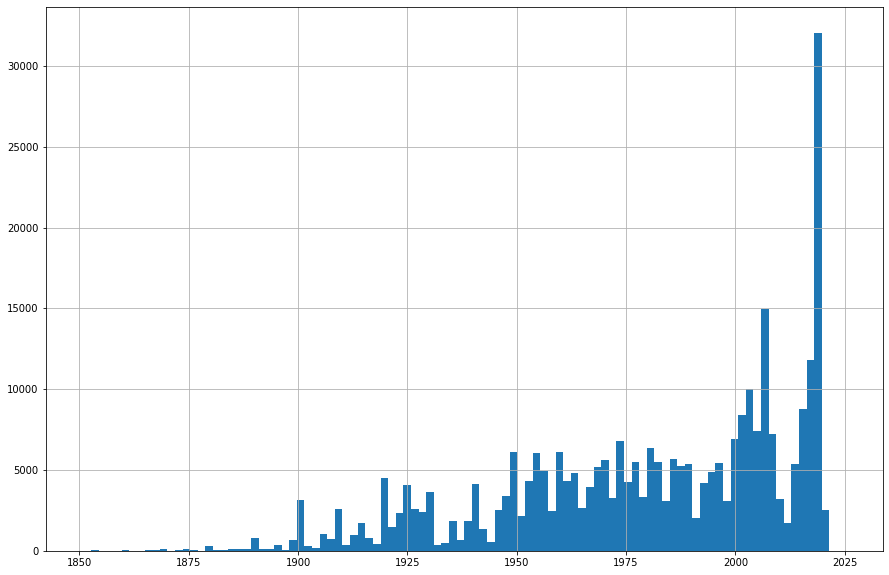

In [102]:
df['Year built'][df['Year built'] >1850].hist(bins=100)

##### Признак 'Remodeled year'

In [103]:
# df['Remodeled year'] = df['homeFacts'].apply(lambda x: app(x,1))

In [104]:
df['Remodeled year']

0             
1             
2         1967
3         2006
4             
          ... 
343222    1990
343223        
343224    1950
343225       0
343226       0
Name: Remodeled year, Length: 343227, dtype: object

In [105]:
df['Remodeled year'].value_counts()

        168748
0        26341
2006      5477
2005      4769
2007      4348
         ...  
1845         1
1853         1
1870         1
1869         1
1862         1
Name: Remodeled year, Length: 152, dtype: int64

In [106]:
# df['Remodeled year'].value_counts().index.tolist()

In [107]:
df['Remodeled year'] = df['Remodeled year'].apply(lambda x: '0' if (x==0) or (x=='') else x)
df['Remodeled year'] = df['Remodeled year'].astype(int)
df['Remodeled year'].value_counts()

0       195325
2006      5477
2005      4769
2007      4348
2008      3757
         ...  
1869         1
1853         1
1870         1
1845         1
1862         1
Name: Remodeled year, Length: 150, dtype: int64

In [108]:
# Определим индексы "выбросов" в меньшую сторону.
ind_Remodeled_old= df[(df['Remodeled year']>0) & (df['Remodeled year']<1700)].index
ind_Remodeled_old

Int64Index([], dtype='int64')

In [109]:
# Определим индексы "выбросов" в большую сторону.
ind_Remodeled_new= df[df['Remodeled year']>=2021].index
ind_Remodeled_new

Int64Index([50834, 77403, 154533, 161535, 323702, 337081], dtype='int64')

In [110]:
df['Remodeled year'][ind_Remodeled_new]

50834     2021
77403     2021
154533    2021
161535    2021
323702    2021
337081    2021
Name: Remodeled year, dtype: int64

<AxesSubplot:>

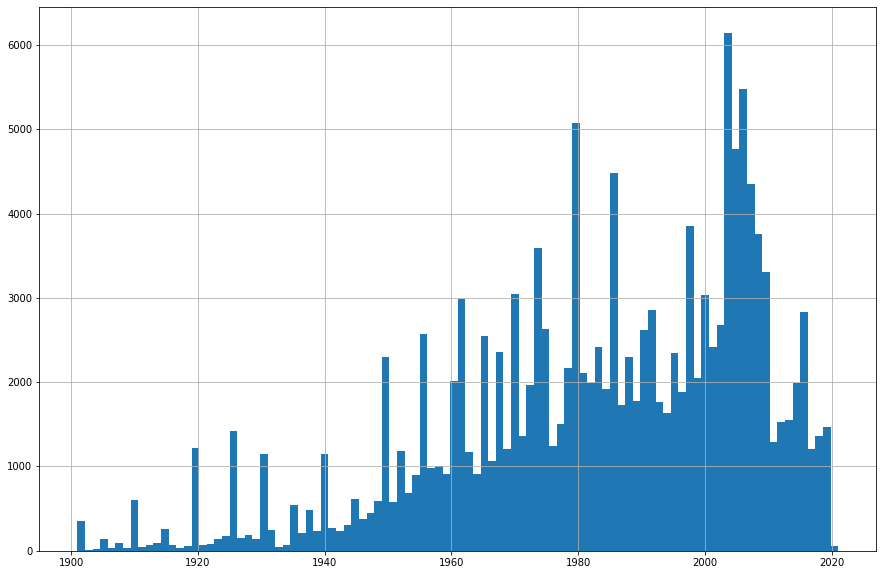

In [111]:
df['Remodeled year'][df['Remodeled year']>1900].hist(bins=100)

Данные признаки 'Year built' и 'Remodeled year' лучше преобразовать в числовой вид, вычитая данные из максимального значения принака. Тогда нулевые значения признака будет иметь какой-то смысл, как возраст недвижимости.

****До определния разности исправим данные, или удалим ненужные строки.

In [112]:
df.loc[ind_built_old, 'Year built']

136434    1208
157186    1057
240373    1060
284644    1019
Name: Year built, dtype: int64

In [113]:
df.loc[ind_built_old]

,status,private pool,propertyType,baths,homeFacts,fireplace,city,schools,sqft,beds,...,stories,PrivatePool,target,Year built,Remodeled year,Heating,Cooling,Parking,lotsize,Price/sqft
136434,pending insp finance,NaN,single-family,2,"{""atAGlanceFacts"": [{""factValue"": ""1208"", ""fac...",NaN,Logan,"[{'rating': ['9', '6', '4', '6', 'NR', 'NR'], ...",1208,3.0,...,-1.0,NaN,79000,1208,0,GAS FORCED AIR,,888,0,$65
157186,active,NaN,single-family,2,"{""atAGlanceFacts"": [{""factValue"": ""1057"", ""fac...",NaN,Ocala,"[{'rating': ['1', '4', '3', '1', '6', '5', 'NR...",1042,2,...,1.0,NaN,104900,1057,0,Central Electric,Central Electric,,8712,$101
240373,active,NaN,other style,NaN,"{""atAGlanceFacts"": [{""factValue"": ""1060"", ""fac...",NaN,Brooklyn,"[{'rating': ['6', '8', '5', '6'], 'data': {'Di...","1,892",NaN,...,-1.0,NaN,1499999,1060,1960,,,,"1,953 Sq. Ft.",$793 / Sq. Ft.
284644,active,NaN,georgian,"3,000","{""atAGlanceFacts"": [{""factValue"": ""1019"", ""fac...",NaN,Charlotte,"[{'rating': [], 'data': {'Distance': [], 'Grad...","1,811",Baths,...,-1.0,NaN,285500,1019,0,,"Heat Pump for A/C, Heat Pump for Heat",,—,$158 / Sq. Ft.


In [114]:
df['Year built'][ind_built_new]

90758     2022
100699    2022
118010    2022
125912    2022
149379    2025
163330    2022
216000    2022
252702    2022
285228    2025
320498    2022
Name: Year built, dtype: int64

In [115]:
df[df['Year built']==2025]

,status,private pool,propertyType,baths,homeFacts,fireplace,city,schools,sqft,beds,...,stories,PrivatePool,target,Year built,Remodeled year,Heating,Cooling,Parking,lotsize,Price/sqft
149379,active,NaN,traditional,NaN,"{""atAGlanceFacts"": [{""factValue"": ""2025"", ""fac...",1,Raleigh,"[{'rating': ['5', '4', '3'], 'data': {'Distanc...","3,518",NaN,...,-1.0,NaN,534000,2025,0,,,,—,$152 / Sq. Ft.
285228,active,NaN,traditional,NaN,"{""atAGlanceFacts"": [{""factValue"": ""2025"", ""fac...",1,Raleigh,"[{'rating': ['5', '4', '3'], 'data': {'Distanc...","3,000",NaN,...,-1.0,NaN,494990,2025,0,,,,0.77 Acres,$165 / Sq. Ft.


In [116]:
df['Remodeled year'][ind_Remodeled_old]

Series([], Name: Remodeled year, dtype: int64)

In [117]:
df['Remodeled year'][ind_Remodeled_new]

50834     2021
77403     2021
154533    2021
161535    2021
323702    2021
337081    2021
Name: Remodeled year, dtype: int64

Исправлению подлежат данные для индексов ind_built_old признака 'Year built' на ноль, так как остальные данные вполне приемлемы для использования в расчетах. Также можно обнулить для ind_Remodeled_old индексы  признака 'Remodeled year'

In [118]:
df.loc[ind_built_old, 'Year built'] = 0 

df.loc[ind_built_new, 'Year built'] = 2022

df.loc[ind_Remodeled_old, 'Remodeled year'] = 0

Заметили, что для индекса 278869  в признаке 'Year built' год постройки 2004, а ремонт в 'Remodeled year'- 1748 год, здесь  явная ошибка. Необходимо программно проверить для всех строк.

Чтобы полученные большие числа в результате вычитания "не потянули" результат для отсутствующих данных и нулей, поставим -1.0

In [119]:
max = df['Year built'].max()
df['Year built'] =  df['Year built'].apply(lambda x: float(max-x) if x!=0 else -1.0)
df['Year built']

0           3.0
1           3.0
2          61.0
3          16.0
4         102.0
          ...  
343222     32.0
343223     98.0
343224     72.0
343225     -1.0
343226      3.0
Name: Year built, Length: 343227, dtype: float64

In [120]:
max = df['Remodeled year'].max()
df['Remodeled year'] =  df['Remodeled year'].apply(lambda x: float(max-x) if x!=0 else -1.0)
df['Remodeled year'].value_counts()

-1.0      195325
 15.0       5477
 16.0       4769
 14.0       4348
 13.0       3757
           ...  
 152.0         1
 168.0         1
 151.0         1
 176.0         1
 159.0         1
Name: Remodeled year, Length: 150, dtype: int64

<AxesSubplot:>

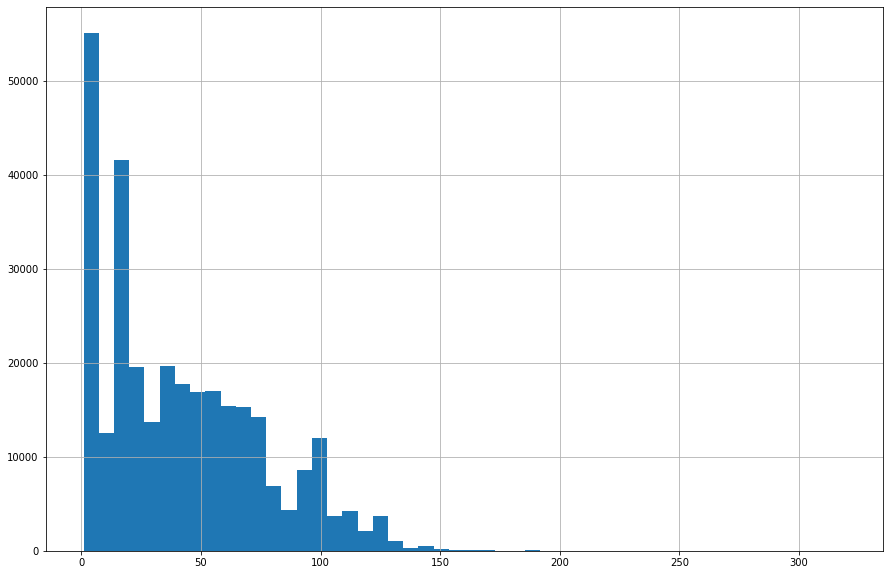

In [121]:
df['Year built'][df['Year built']>0].hist(bins=50)

<AxesSubplot:>

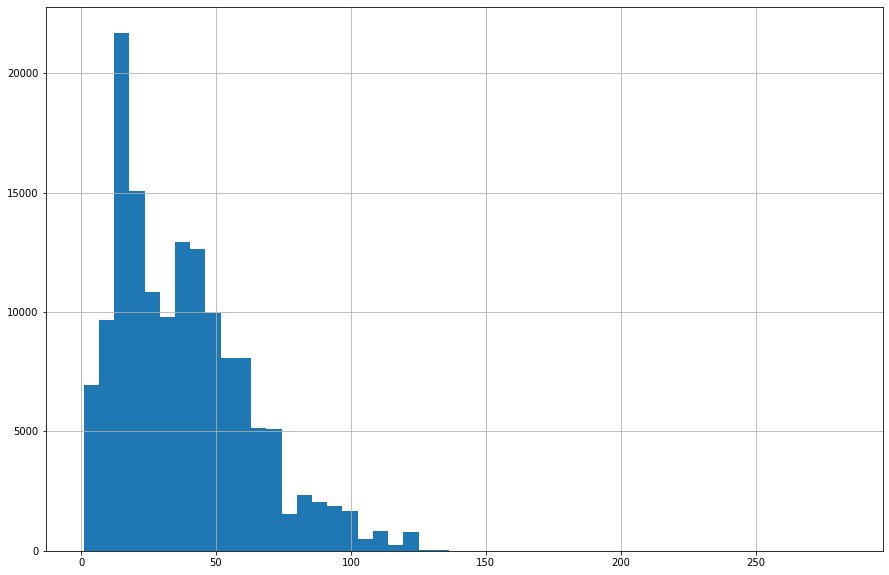

In [122]:
df['Remodeled year'][df['Remodeled year']>0].hist(bins=50)

Для индекса 278869  в признаке 'Year built' год постройки 2004, а ремонт в 'Remodeled year'- 1748 год, здесь  явная ошибка. Надо проверить.

##### Признак 'Parking'

In [123]:
df['Parking'] = df['homeFacts'].apply(lambda x: app(x,4))

In [124]:
df['Parking'].value_counts()

                                                                                                                                    141447
Attached Garage                                                                                                                      69615
2 spaces                                                                                                                             27867
1 space                                                                                                                              14109
No Data                                                                                                                              13023
                                                                                                                                     ...  
Detached Garage, Off Street, On Street                                                                                                   1
Concrete Driveway, Paved Dr

In [125]:
# Признак будет бинарный: 0 - нет паркинг, 1 - есть паркинг.
df['Parking']=df['Parking'].apply(lambda x: 0 
            if x==0 or x=='' or x=='No Data' or x=='No' else 1)        

df['Parking'].value_counts()

1    185263
0    157964
Name: Parking, dtype: int64

Была попытка систематизировать данные признака и сделать категориальным, но данные оказались слишким разнообразным.

Yes = ['Garage','Space', 'Parking', 'Carport', 'Car', 'Attached', 'Detached', 
       'Off Street', 'On Street', 'Onstr', 'Basement', 'Electric Door',
       'Driveway',  'Concr', 'Gravel', 'Assigned', 'Covered', 'Paved', 
       'Asphalt', 'Common', 'Alley', 'Open', 'Guest']
def pars_parking(x):
    if x==0 or x=='' or x=='No Data' or x=='No':
        x = '0'
    x = x.title()
    x = x.replace('Gravl', 'Gravel')
    x = x.replace('Drvwy', 'Driveway')
    x = x.replace('Aspht','Asphalt')
    x= x.replace('Spaces', 'Space')
    for i in range(0,len(Yes)):
        if -1!=x.find(Yes[i]):
            x = re.sub('[^0-9\.]', '', x).strip()
            # x = Yes[i]+ ' - '+x
            if len(x)==0:
                x = '1'
    return x

df['Parking'] = df['Parking'].apply(pars_parking)

top_Parking = df['Parking'].value_counts()[:30].index
df['Parking'] = df['Parking'].apply(lambda x: x if x in top_Parking else 'Yes')

##### Признак 'lotsize'

In [126]:
# df['lotsize'] = df['homeFacts'].apply(lambda x: app(x,5))

In [127]:
df['lotsize'].value_counts()

                  32281
0                 28038
—                 25176
No Data            5296
-- sqft lot        3813
                  ...  
8,224 Sq. Ft.         1
10103                 1
1586891               1
20172                 1
7,084 sqft lot        1
Name: lotsize, Length: 34136, dtype: int64

In [128]:
# df['lotsize'].value_counts().index.tolist()

Необходимо убрать единицы измерения, предварительно приведя их в единое измерение, и преобразовать признак в числовой.

In [129]:
# 1 acre = 43560 sqft 
acre_sf = 43560 # sqft
acre_hec = 0.404686 #hectar
hectar_acr = 2.47105 # acres
hectar_sf = 107639 #sqft

In [130]:
df['lotsize'][1055]

'0.47 acres'

In [131]:
df['lotsize'] = df['lotsize'].apply(lambda x: '0' if (x==0) or (x=='') or 
                                    (x=='No Data') or (x=='—') or (x=='-- sqft lot') else x)

In [132]:
sf = ['sqft', 'sqft lot']
acr = ['Acres', 'acres lot', 'Acre', 'acre', 'acre lot']
def analyze(x):
    x = x.replace('Sq. Ft.', 'sqft')
    ed_izm = re.sub('[^A-Z a-z]', '', x).strip()
    value = re.sub('[^0-9,\.]', '', x).strip()
    if ed_izm in sf:
        x = x.replace(ed_izm, 'sqft')
    if ed_izm in acr:
        x = x.replace(ed_izm, 'acres')
    return x

In [133]:
df['lotsize'] = df['lotsize'].apply(analyze)

In [134]:
df['lotsize'].value_counts()

0             94604
0.26 acres     3059
0.28 acres     2578
0.27 acres     2485
0.25 acres     2453
              ...  
1577              1
47978             1
15198             1
13388             1
2,871 sqft        1
Name: lotsize, Length: 23903, dtype: int64

In [135]:
# df['lotsize'].value_counts().index.tolist()

In [136]:
def to_num(x):
    ed_izm = re.sub('[^A-Z a-z]', '', x).strip()
    value = re.sub('[^0-9\.]', '', x).strip()
    if ed_izm=='acres':
        value = round(float(value)*acre_sf, 1)
    if ed_izm=='sqft'  or ed_izm=='':
        value = round(float(value), 1)
    return value

df['lotsize'] = df['lotsize'].apply(to_num) 

In [137]:
df['lotsize'].value_counts()

0.0          94604
11325.6       3059
10890.0       2868
6098.0        2581
12196.8       2578
             ...  
2955981.6        1
12781.0          1
1265418.0        1
9550.0           1
2871.0           1
Name: lotsize, Length: 16344, dtype: int64

In [138]:
# df['lotsize'].value_counts().index.tolist()

In [139]:
df['lotsize'].describe()

count    3.432270e+05
mean     6.970015e+04
std      5.457482e+06
min      0.000000e+00
25%      0.000000e+00
50%      5.750000e+03
75%      1.001900e+04
max      2.147484e+09
Name: lotsize, dtype: float64

In [140]:
df[df['lotsize']==df['lotsize'].max()]

,status,private pool,propertyType,baths,homeFacts,fireplace,city,schools,sqft,beds,...,stories,PrivatePool,target,Year built,Remodeled year,Heating,Cooling,Parking,lotsize,Price/sqft
1264,for sale,NaN,single-family,4.0,"{""atAGlanceFacts"": [{""factValue"": ""2006"", ""fac...",Yes,Spokane,"[{'rating': ['6/10', '4/10', '8/10'], 'data': ...","4,820",5,...,3.0,NaN,799900,16.0,3.0,Heat pump,Central,1,2.147484e+09,$166


In [141]:
# Число слишком большое, обнуляем.
df.loc[1148, 'lotsize'] = 0.0

##### Признак 'Price/sqft'

In [142]:
# df['Price/sqft']  = df['homeFacts'].apply(lambda x: app(x,6))

In [143]:
df['Price/sqft'].value_counts()

0              29766
                4577
No Data         1062
No Info          950
$1/sqft          871
               ...  
$3,197             1
$2,179             1
$3,998/sqft        1
$2,424/sqft        1
$2,032             1
Name: Price/sqft, Length: 6413, dtype: int64

In [144]:
# df['Price/sqft'].value_counts().index.tolist()

In [145]:
df['Price/sqft']

0              $144
1         $159/sqft
2         $965/sqft
3         $371/sqft
4         $233/sqft
            ...    
343222         $311
343223    $337/sqft
343224    $458/sqft
343225            0
343226         $140
Name: Price/sqft, Length: 343227, dtype: object

In [146]:
df['Price/sqft'].isna().sum()

0

In [147]:
df['Price/sqft'] = df['Price/sqft'].fillna(0.0)

In [148]:
def is_num(x):
    try:
        float(x)
        return True
    except ValueError:
        return False

def Price_sqft(x):
    if x==0 or x=='' or x=='No Data' or x=='No Info':
        x = '0'
        return float(x)
    x = re.sub('[^0-9\.]', '', x).strip()
    if is_num(x):
        return float(x)
    else:
        return 0.0

In [149]:
df['Price/sqft'] = df['Price/sqft'].apply(Price_sqft)

In [150]:
df['Price/sqft'].isna().sum()

0

In [151]:
df['Price/sqft'] = df['Price/sqft'].fillna(0.0)

Необходимо выявить выбросы и их удалить или исправить!
Признак 'Price/sqft' - числовой

In [152]:
df['Price/sqft'].describe()

count    3.432270e+05
mean     3.102613e+02
std      1.547135e+04
min      0.000000e+00
25%      0.000000e+00
50%      1.370000e+02
75%      2.420000e+02
max      5.000000e+06
Name: Price/sqft, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f472ee37850>,
 'caps': [<matplotlib.lines.Line2D at 0x7f472ee37fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f472ee37390>],
 'medians': [<matplotlib.lines.Line2D at 0x7f472ee39750>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f472ee39a90>],
 'means': []}

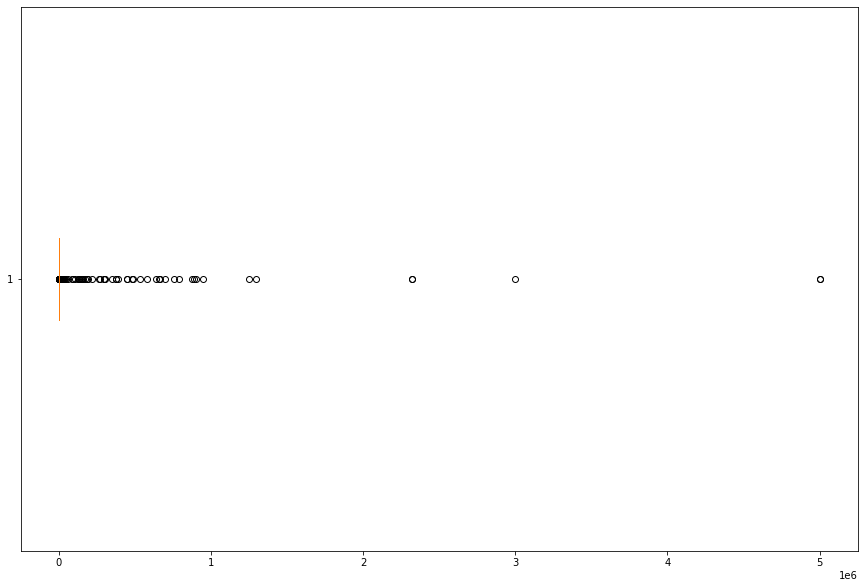

In [153]:
plt.boxplot(df['Price/sqft'], vert=False)

In [154]:
df[['target','Price/sqft']][df['Price/sqft']>40000]

,target,Price/sqft
3423,217700,217700.0
14999,1300000,1300000.0
16918,480000,480000.0
29436,185900,185900.0
30777,144900,144900.0
37964,790000,790000.0
41389,159000,159000.0
47179,1275000,637500.0
57130,950000,950000.0
60872,698000,698000.0


Предельная цена установилась подбором чисел: 20000, 30000, 40000, и т.д.
Цена кв.фута равна всей стоимости  недвижимости! Необходимо обнулять эти данные.

In [155]:
ind_Price_sq = df[['target','Price/sqft']][df['Price/sqft']>40000].index
ind_Price_sq

Int64Index([  3423,  14999,  16918,  29436,  30777,  37964,  41389,  47179,
             57130,  60872,  71524,  83553,  85136,  91165, 108913, 120862,
            125155, 141031, 157795, 159612, 163207, 169060, 171083, 171393,
            173019, 178136, 178782, 180803, 180871, 182751, 191618, 195402,
            200113, 201756, 220596, 223852, 237626, 255940, 261523, 266732,
            268523, 289999, 300313, 303505, 307409, 319904, 325664, 330319,
            338856],
           dtype='int64')

In [156]:
# =0.0
df.loc[ind_Price_sq, 'Price/sqft'] = 0.0

{'whiskers': [<matplotlib.lines.Line2D at 0x7f472eccb690>,
 'caps': [<matplotlib.lines.Line2D at 0x7f472ecc6210>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f472eccb3d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f472eccc410>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f472eccc750>],
 'means': []}

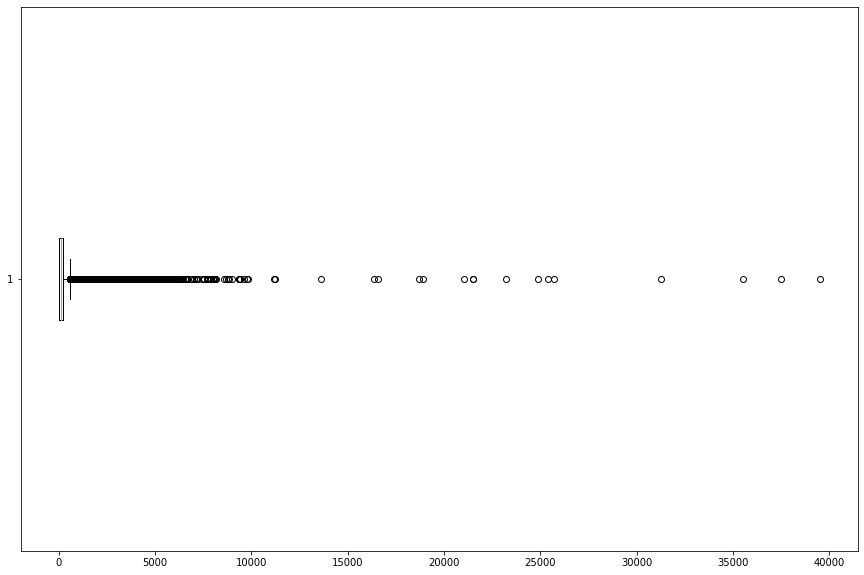

In [157]:
plt.boxplot(df['Price/sqft'], vert=False)

In [158]:
df['Price/sqft'].describe()

count    343227.000000
mean        204.626285
std         356.954001
min           0.000000
25%           0.000000
50%         137.000000
75%         242.000000
max       39500.000000
Name: Price/sqft, dtype: float64

In [159]:
df['Price/sqft'].value_counts()

0.0       86708
123.0      1434
122.0      1434
121.0      1430
127.0      1427
          ...  
4006.0        1
1753.0        1
3978.0        1
2846.0        1
1620.0        1
Name: Price/sqft, Length: 2878, dtype: int64

Признак 'Price/sqft' - числовой

#### Признаки 'Heating' и 'Cooling' анализируем совместно 

In [160]:
df['Heating'].value_counts()

Forced Air                                                      81385
                                                                80575
Forced air                                                      51123
Other                                                           28060
No Data                                                          8416
                                                                ...  
Exhaust Fans                                                        1
Central, Exhaust Fans, Natural Gas, Zoned                           1
BR Closet-Electric - new                                            1
Wood Stove                                                          1
Baseboard, Hot Water, Programmable Thermostat, Radiant Floor        1
Name: Heating, Length: 1984, dtype: int64

In [161]:
# df['Heating'].value_counts().index.tolist()

In [162]:
df['Cooling'].value_counts()

Central                                                                                 156391
                                                                                         89779
Central Air                                                                              14382
No Data                                                                                  10396
Has Cooling                                                                               9729
                                                                                         ...  
Central Air, g-Energy Star HVAC, g-Fresh Air Ventilation, Multizone A/C, Natural Gas         1
Forced Air Heating, Radiator Heat, Wall Heat                                                 1
Air Conditioning, Dual                                                                       1
Dehumidifier                                                                                 1
Central A/C (Gas), Central Heat (Gas), Heat Pump  

In [163]:
# df['Cooling'].value_counts().index.tolist()

  Два признака, 'Heating' и 'Cooling', существенно влияют на цену недвижимости. Поэтому необходимо привести данные этих показателей в пригодную форму для использования в моделях прогноза цен на недвижимость.

In [164]:
# Функция для первоначального парсинга признаков 'Heating' и 'Cooling' 
patterns = "[!#$%&()'*+.:;<=>?@[\]^_`{|}~—\"]+"
def parsing (x):
    if (x==0) or (x=='0') or (x=='') or (x=='No Data'):
        x='No'
    x = x.title()
    x = re.sub(patterns, ' ', x)
    if len(x)>0 and x[0]==',':
        x = x[1:].strip()
    return x

In [165]:
df['Heating'] = df['Heating'].apply(parsing)
# df['Heating'].value_counts().index.tolist()

In [166]:
df['Heating'].value_counts()

Forced Air                                                      132508
No                                                               92544
Other                                                            28060
Heat Pump                                                         8731
Central Air                                                       7814
                                                                 ...  
Zoned Heating, Wall Unit Heating, Forced Air Heating                 1
Baseboard, Spacewallunit                                             1
Hot Air, Stove-Pellet                                                1
Natural Gas, Space Heater                                            1
Baseboard, Hot Water, Programmable Thermostat, Radiant Floor         1
Name: Heating, Length: 1887, dtype: int64

In [167]:
df['Cooling'].value_counts()

Central                                                                                 156391
                                                                                         89779
Central Air                                                                              14382
No Data                                                                                  10396
Has Cooling                                                                               9729
                                                                                         ...  
Central Air, g-Energy Star HVAC, g-Fresh Air Ventilation, Multizone A/C, Natural Gas         1
Forced Air Heating, Radiator Heat, Wall Heat                                                 1
Air Conditioning, Dual                                                                       1
Dehumidifier                                                                                 1
Central A/C (Gas), Central Heat (Gas), Heat Pump  

In [168]:
# df['Cooling'].value_counts().index.tolist()

Беглый просмотр содержимого признаков 'Heating' и 'Cooling' показывает, что в признаке 'Cooling' приведены  тепловые показатели , а в признаке 'Heating' приведены показатели охлаждения.
Вначале исправим некоторые имеющиеся явно заметные неточности.

In [169]:
df[df['Heating']=='Central Air']

,status,private pool,propertyType,baths,homeFacts,fireplace,city,schools,sqft,beds,...,stories,PrivatePool,target,Year built,Remodeled year,Heating,Cooling,Parking,lotsize,Price/sqft
21,active,NaN,penthouse,"1,000","{""atAGlanceFacts"": [{""factValue"": ""1996"", ""fac...",NaN,Miami Beach,"[{'rating': ['7', '10', 'NR', '4', '4'], 'data...","1,080",Baths,...,2.0,NaN,579000,26.0,25.0,Central Air,Has Cooling,0,0.0,0.0
72,active,NaN,other style,NaN,"{""atAGlanceFacts"": [{""factValue"": ""2008"", ""fac...",NaN,Miami Beach,"[{'rating': ['10', '10', 'NR', '4', '4'], 'dat...",538,NaN,...,-1.0,NaN,650000,14.0,13.0,Central Air,Has Cooling,0,0.0,0.0
90,active,NaN,detached,NaN,"{""atAGlanceFacts"": [{""factValue"": ""1952"", ""fac...",NaN,Miami,"[{'rating': ['9', '10', 'NR', '7', '4'], 'data...","3,685",NaN,...,2.0,NaN,800000,70.0,69.0,Central Air,Has Cooling,0,61419.6,0.0
132,active,NaN,high-rise,NaN,"{""atAGlanceFacts"": [{""factValue"": ""2016"", ""fac...",NaN,Miami,"[{'rating': ['4', '10', 'NR', '2', '2'], 'data...","1,170",NaN,...,-1.0,NaN,499000,6.0,5.0,Central Air,Has Cooling,0,0.0,0.0
154,active,NaN,detached,NaN,"{""atAGlanceFacts"": [{""factValue"": ""1995"", ""fac...",NaN,Weston,"[{'rating': ['9', '9', '9'], 'data': {'Distanc...","2,255",NaN,...,1.0,NaN,565000,27.0,26.0,Central Air,Has Cooling,0,7841.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343131,active,NaN,other style,NaN,"{""atAGlanceFacts"": [{""factValue"": ""1950"", ""fac...",NaN,North Miami,"[{'rating': ['4', '10', 'NR', '3', '3'], 'data...",NaN,NaN,...,1.0,NaN,350000,72.0,71.0,Central Air,Has Cooling,0,11325.6,0.0
343135,active,NaN,detached,NaN,"{""atAGlanceFacts"": [{""factValue"": ""1999"", ""fac...",NaN,Miami,"[{'rating': ['10', 'NR', '5', '10', '5'], 'dat...","4,401",NaN,...,1.0,NaN,3450000,23.0,22.0,Central Air,Has Cooling,0,28749.6,0.0
343146,active,NaN,other style,NaN,"{""atAGlanceFacts"": [{""factValue"": ""1978"", ""fac...",NaN,Fort Lauderdale,"[{'rating': ['3', '5', '7'], 'data': {'Distanc...","1,180",NaN,...,-1.0,NaN,335000,44.0,43.0,Central Air,Has Cooling,0,0.0,0.0
343186,active,NaN,other style,NaN,"{""atAGlanceFacts"": [{""factValue"": ""2002"", ""fac...",NaN,Miami,"[{'rating': ['7', 'NR', '10', '5', '5'], 'data...",842,NaN,...,-1.0,NaN,299000,20.0,19.0,Central Air,Has Cooling,0,0.0,0.0


In [170]:
# 'Central Air'
#  Выделение индексов строк 
ind_H = df[df['Heating']=='Central Air'].index
df['Cooling'][ind_H].value_counts()

Has Cooling    7800
                 14
Name: Cooling, dtype: int64

In [171]:
# Изменеие 'Has Cooling' признака 'Cooling' на 'Central Air' признака 'Heating'.
df.loc[ind_H,'Cooling'] = df['Heating'][ind_H]

In [172]:
df['Cooling'][ind_H].value_counts()

Central Air    7814
Name: Cooling, dtype: int64

In [173]:
# Выделение индексов строк
ind_C =df[df['Cooling']=='Central Heating'].index
df['Heating'][ind_C].value_counts()

Electric Heat                                           1470
Natural Gas Heat                                        1134
Central Cooling                                           71
Electric Heat, Natural Gas Heat                           67
Ceiling Fan, Central Cooling                              25
Other Heating Fuel  See Remarks                           16
Propane  Owned                                             5
Electric Heat, Propane  Owned                              2
Electric Heat, Solar Heat                                  2
Ceiling Fan, Central Cooling, Electric Cooling             2
Central Cooling, Wall-Window A/C                           2
Electric Cooling                                           2
Wall-Window A/C                                            1
Natural Gas Heat, Solar Heat                               1
Central Cooling, Zoned Cooling                             1
Ceiling Fan, Electric Cooling                              1
Ceiling Fan             

In [174]:
# Изменение  признака 'Heating' и  признака 'Cooling'.'Central Heating'
def change(x):
    if -1!=x.find('Gas'):
        x = 'Central Heating '+'Gas'
    if -1!=x.find('Electric '):
        x = 'Central Heating '+'Electric '
    return x

In [175]:
df.loc[ind_C, 'Heating'] = df['Heating'][ind_C].apply(change)
df['Heating'][ind_C].value_counts()

Central Heating Electric                                1479
Central Heating Gas                                     1202
Central Cooling                                           71
Ceiling Fan, Central Cooling                              25
Other Heating Fuel  See Remarks                           16
Propane  Owned                                             5
Central Cooling, Wall-Window A/C                           2
Attic Fan, Ceiling Fan, Central Cooling                    1
Ceiling Fan, Central Cooling, Zoned Cooling                1
Central Building Cooling, Central Individual Cooling       1
Ceiling Fan                                                1
Wall-Window A/C                                            1
Central Cooling, Zoned Cooling                             1
Central Building Cooling                                   1
Name: Heating, dtype: int64

In [176]:
df.loc[ind_C,'Cooling']= 'Central'
df['Cooling'][ind_C].value_counts()

Central    2807
Name: Cooling, dtype: int64

In [177]:
ind_CE =df[df['Cooling']=='Electric Heating'].index
df['Heating'][ind_CE].value_counts()

Refrigeration                                                                                   171
Refrigeration, Ceiling Fan S                                                                    144
Refrigeration, Ceiling Fan S , Programmable Thermostat                                           23
No                                                                                                9
Electric Cooling                                                                                  6
Refrigeration, Programmable Thermostat                                                            5
Central Cooling                                                                                   5
1 Window/Wall Air Conditioning Unit                                                               3
Programmable Thermostat                                                                           3
1 Air Conditioner                                                                                 2


Содержимое признака 'Heating' выделенных строк больше похоже на данные признака 'Cooling'. Поэтому поменяем их между собой.

In [178]:
df.loc[ind_CE, 'Cooling'] = df['Heating'][ind_CE]

In [179]:
df.loc[ind_CE, 'Heating'] = 'Electric Heating'

In [180]:
df['Heating'][ind_CE].value_counts()

Electric Heating    398
Name: Heating, dtype: int64

In [181]:
df['Cooling'][ind_CE].value_counts()

Refrigeration                                                                                   171
Refrigeration, Ceiling Fan S                                                                    144
Refrigeration, Ceiling Fan S , Programmable Thermostat                                           23
No                                                                                                9
Electric Cooling                                                                                  6
Refrigeration, Programmable Thermostat                                                            5
Central Cooling                                                                                   5
1 Window/Wall Air Conditioning Unit                                                               3
Programmable Thermostat                                                                           3
1 Air Conditioner                                                                                 2


В дальнейшем содежимые этих признаков анализируются более подробно, и по мере возможности, очищаются, и данные приводятся к приемлемый вид для использования в моделях.

#### Признак 'Heating' отдельно

In [182]:
df['Heating'].value_counts()

Forced Air                                                      132508
No                                                               92535
Other                                                            28060
Heat Pump                                                         8731
Central Air                                                       7814
                                                                 ...  
Baseboard, Spacewallunit                                             1
Hot Air, Stove-Pellet                                                1
Natural Gas, Space Heater                                            1
Exhaust Fans                                                         1
Baseboard, Hot Water, Programmable Thermostat, Radiant Floor         1
Name: Heating, Length: 1875, dtype: int64

In [183]:
# df['Heating'].value_counts().index.tolist()

In [184]:
fnd =['Air Conditioning','Air Conditionings','Air Conditioner','Air Conditioners','A/C','Ac']
   
def dop_Heat(x):
    if (-1!=x.find('Forced Air') or -1!=x.find('Heat Pump')) and -1!=x.find('Gas'):
        x='Forced Gas'
    if (-1!=x.find('Forced Air') or -1!=x.find('Heat Pump')) and -1!=x.find('Electric'):
        x='Forced Electric'
    if -1!=x.find('Heat Pump') or x=='Forcedair':
         x='Forced'
    if -1!=x.find('Forced Air') or x=='Forced Warm Air':
        x='Forced'
    for i in range(0, len(fnd)):
        x = x.replace(fnd[i], '')
    if -1!=x.find('Central Air'):
        x='Central'
    if -1!=x.find('Central') and -1!=x.find('Electric'):
        x='Central Electric'
    if -1!=x.find('Central') and -1!=x.find('Gas'):
        x='Central Gas'
    if x== 'Electric':
        x='Central Electric'
    return x


In [185]:
df['Heating'] = df['Heating'].apply(dop_Heat)

In [186]:
gas = ['Gas', 'Forced Gas', 'Central Gas', 'Electric, Gas']
central = ['Central Electric', 'Central Gas', 'Central Furnace', 'Central Heating']
electric = ['Central Electric', 'Forced Electric', 'Electric, Gas'] 
name_change = ['Wall', 'Refrigeration', 'Baseboard', 'Hot Water', 'Stove', 'Radiator']
def in_gce(x):
    x = x.strip()
    x = x.replace('Units', 'Unit')
    x = x.replace('Unit S', 'Unit')
    if ((-1!=x.find('Gas') or -1!=x.find('Propane')) and (x not in gas)):
        x='Gas'
    if (-1!=x.find('Central') and (x not in central)):
        x='Central'
    if (-1!=x.find('Electric') and (x not in electric)):
        x='Electric'
    for i in range(0, len(name_change)):
        if -1!=x.find(name_change[i]):
            x = name_change[i]
    if -1!=x.find('Heat') and -1==x.find('Heating'):
        x='Heating'
    if -1!=x.find('Heating') and (x not in ['Central Heating', 'Heating System']):
        x='Heating'
    if -1!=x.find('Window Unit') or x=='Window':
        x = 'Window Unit'
    if  -1!=x.find('Hot Air'):
        x='Forced'
    return x

In [187]:
df['Heating'] = df['Heating'].apply(in_gce)

In [188]:
df['Heating'].value_counts()

Forced                                    147141
No                                         92557
Other                                      28060
Central Electric                           22151
Central                                    17049
                                           ...  
Furnace - Wood/Oil Combo                       1
Main Floor Closet-Tankless                     1
Fireplace, Forced Warm Air, Multi-Zone         1
Forcedair, Geothermal, Woodstove               1
Closet Outside Bath-On Demand                  1
Name: Heating, Length: 231, dtype: int64

In [189]:
df['Heating'].value_counts().index.tolist()

['Forced',
 'No',
 'Other',
 'Central Electric',
 'Central',
 'Gas',
 'Baseboard',
 'Wall',
 'Electric',
 'Heating System',
 'Central Gas',
 'Forced Gas',
 'Radiant',
 'Forced Electric',
 'Central Furnace',
 'Central Heating',
 'Heating',
 'Electric, Gas',
 'Hot Water',
 'Refrigeration',
 'Oil',
 'Window Unit',
 'Radiator',
 'Stove',
 'No Cooling/Vent',
 'Other Cooling',
 'Floor Furnace',
 'Yes',
 'Contact Manager',
 'Zoned',
 '1',
 'Has',
 'Garage-Tankless',
 'Dual',
 'No Cooling/Vent, Other Cooling',
 'Geothermal',
 'Oil, Wood',
 'Other, Radiant',
 'Steam',
 'Solar',
 '2 s',
 'Gravity',
 'Basement',
 'Combination',
 'Other   See Remarks',
 '3 s',
 'Tankless',
 'Wood',
 '4 s',
 'Reverse Cycle',
 '1 Unit',
 'Other  See Remarks',
 'Incentive',
 'Other Cooling  See Remarks',
 'Two Or More Unit',
 'G-Geothermal',
 'Fireplace',
 'Basement-Boiler',
 'Garage',
 'Multi Zone, Radiant',
 'Fireplace S',
 'Other Cooling, Zoned',
 'Dual Zone Hvac',
 'Fireplace, Floor Furnace',
 '2 Or  More Unit',


In [190]:
df['Heating'].value_counts()['Stove':].sum()

965

Данные признака 'Heating' оказались слишком разнообразными. Требовалось детально изучать данные по строкам. Данные по возможности приведены к удобному виду для категоризации данных.  
Все остальные значения после  признака 'Stove' отнесем к 'Other'

In [191]:
ind_Heat = df['Heating'].value_counts()[:'Stove'].index
ind_Heat

Index(['Forced', 'No', 'Other', 'Central Electric', 'Central', 'Gas',
       'Baseboard', 'Wall', 'Electric', 'Heating System', 'Central Gas',
       'Forced Gas', 'Radiant', 'Forced Electric', 'Central Furnace',
       'Central Heating', 'Heating', 'Electric, Gas', 'Hot Water',
       'Refrigeration', 'Oil', 'Window Unit', 'Radiator', 'Stove'],
      dtype='object')

In [192]:
df['Heating'] = df['Heating'].apply(lambda x: x 
                                            if x in ind_Heat else 'other')

In [193]:
df['Heating'].value_counts()

Forced              147141
No                   92557
Other                28060
Central Electric     22151
Central              17049
Gas                  11029
Baseboard             4038
Wall                  3879
Heating System        2709
Electric              2709
Central Gas           2560
Forced Gas            2220
Radiant               1472
Forced Electric       1219
Central Furnace       1036
other                  856
Central Heating        646
Heating                385
Electric, Gas          355
Hot Water              261
Refrigeration          235
Oil                    209
Window Unit            205
Radiator               137
Stove                  109
Name: Heating, dtype: int64

#### Признак 'Cooling' отдельно

In [194]:
df['Cooling'].value_counts()

Central                                                                             159198
                                                                                     89765
Central Air                                                                          22196
No Data                                                                              10396
0                                                                                     6996
                                                                                     ...  
Ductless/Mini-Split System, Gas (Hot Air), Heat Pump for A/C, Heat Pump for Heat         1
Other,                                                                                   1
Central Air, Gas (Hot Air), Window Unit                                                  1
Air Conditioning-Room, Evaporative Cooler (Swamp)                                        1
Central A/C (Gas), Central Heat (Gas), Heat Pump                                         1

In [195]:
# df['Cooling'].value_counts().index.tolist()

In [196]:
df['Cooling'] = df['Cooling'].apply(parsing)

In [197]:
df['Cooling'].value_counts().index.tolist()

['Central',
 'No',
 'Central Air',
 'Central Electric',
 'Wall',
 'Central Gas',
 'Cooling System',
 'Central A/C',
 'Has Cooling',
 'Other',
 'Central A/C  Electric , Central Heat  Gas ',
 'Central A/C  Electric , Central Heat  Electric ',
 'Refrigeration',
 'Central, Electric',
 'Electric',
 'Evaporative',
 'Refrigeration, Ceiling Fan S ',
 'Central Air, Gas Hot Air/Furnace',
 'Central Gas, Zoned',
 'Central, Wall',
 'Air Conditioning-Central',
 'Has Heating',
 '2 Or More Units, Central, Electric',
 'Central Air, Gas  Hot Air ',
 'Central Electric, Zoned',
 'Central Air, Zoned',
 'Central, Other',
 'Ceiling Fan, Central Electric',
 'Central Cooling',
 'Solar, Refrigeration',
 'Heat Pump',
 'Gas Heating',
 'Central A/C  Electric , Central Heat  Gas , Zoned',
 'Central Electric, Heat Pump',
 'Gas Heating, Forced Air Heating',
 'Heat Pump - Ac',
 'Central Air, Gas Hot Air/Furnace, Multizone A/C',
 'Central Electric, Central Gas',
 'Forced Air Heating',
 'Central Air, Humidity Control',


In [198]:
fnd =['Air Conditioning','Air Conditionings','Air Conditioner','Air Conditioners','A/C','Ac']
name_change = ['Central Air','Hot Air','Window Unit','Refrigeration','Air Purification System',
               'Common Heating/Cooling', 'Zoned','Baseboard','Wall','Other','No']
def dop_Cool(x):
    x = x.strip()
    x = x.replace('Fan S', 'Fan')
    x = x.replace('Unit S', 'Unit')
    for i in range(0, len(fnd)):
        x = x.replace(fnd[i], 'Air Conditioning')
    if -1!=x.find('Air Conditioning'):
        x='Air Conditioning'
    if -1!=x.find('Central') and -1==x.find('Air'):
        x='Central Air'
    for i in range(0, len(name_change)):
        if -1!=x.find(name_change[i]):
            x = name_change[i]
    if -1!=x.find('Central') and -1!=x.find('Electric'):
        x='Central Electric'
    if -1!=x.find('Central') and -1!=x.find('Gas'):
        x='Central Gas'
    if x== 'Electric':
        x='Central Electric'
    if -1!=x.find('Heat Pump') or -1!=x.find('Forced Air'):
        x='Forced Air'
    if -1!=x.find('Window') and -1==x.find('Unit'):
        x = 'Window Unit'
    if -1!=x.find('Ceiling'):   
        x = 'Ceiling Fan'
    if -1!=x.find('Air Purification System'):    
        x = 'Air Purification System'
    if -1!=x.find('Evaporative'):    
        x = 'Evaporative Cooling'
    return x

In [199]:
df['Cooling'] = df['Cooling'].apply(dop_Cool)

In [200]:
df['Cooling'].value_counts()

Central Air                                                           201088
No                                                                    110785
Air Conditioning                                                       10155
Wall                                                                    4441
Refrigeration                                                           2924
                                                                       ...  
Radiant Heat, Radiator Heat, Tankless Water Heater                         1
Hot Water, Radiator Heat, Stove Heat                                       1
Radiant Floor                                                              1
Ductless/Mini-Split System                                                 1
90  High Efficiency, Ductless Hp-Mini Split, Tankless Water Heater         1
Name: Cooling, Length: 163, dtype: int64

In [201]:
# df['Cooling'].value_counts().index.tolist()

Все остальные значения после  с признака 'Zoned' отнесем к 'Other'
Непонятно, почему-то в признаке 'Cooling' данные чаще всего описывают о теплоснабжении!?
Предполагается,что некоторые установки для тепла также используются для охлаждения.
Данные приведены к удобному виду для категоризации данных, по возможности.

In [202]:
ind_Cool = df['Cooling'].value_counts()['Zoned':].index
ind_Cool

Index(['Zoned', 'Yes', 'Ductless Hp-Mini Split', '1', 'Geothermal',
       '2 Or More Units, Electric', 'Contact Manager', 'Natural Gas Heat',
       'Radiant Heat', 'Attic Fan',
       ...
       'Cooling, Heating', 'Individual Cooling', 'Heat Strip', 'Dual',
       'Dehumidifier', 'Radiant Heat, Radiator Heat, Tankless Water Heater',
       'Hot Water, Radiator Heat, Stove Heat', 'Radiant Floor',
       'Ductless/Mini-Split System',
       '90  High Efficiency, Ductless Hp-Mini Split, Tankless Water Heater'],
      dtype='object', length=144)

In [203]:
df['Cooling'] = df['Cooling'].apply(lambda x: x if x in ind_Cool else 'Other')

In [204]:
df['Cooling'].value_counts()['Zoned':].sum()

1003

In [205]:
df['Cooling'].value_counts()['Other']

342224

In [206]:
# df['Heating_Cooling'] = df['Heating']+', '+df['Cooling']
# df['Heating_Cooling'] = df['Heating_Cooling'].apply(parsing)

In [207]:
# df['Heating_Cooling'].value_counts()

In [208]:
# df['Heating_Cooling'].value_counts().index.tolist()

#### Признак "schools"

Признак "schools" как и признак "homeFacts" также  содержит  отдельные данные, имеющие влияние на оценку недвижимости (дома, квартиры). Поэтому выделим эти данные. Для этого также приведем содежимое данного признака к формату .json и сформируем новые признаки.

In [209]:
# df['schools']=data['schools']

In [210]:
df['schools'] = df['schools'].apply(lambda x: x.replace('None', '0'))

In [211]:
df['schools'].value_counts()

[{'rating': [], 'data': {'Distance': [], 'Grades': []}, 'name': []}]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              3070
[

In [212]:
# df['schools'].value_counts().index.tolist()

Предварительный обзор данных показывает необходимость подробного парсинга признака. В ручную подберем символов, подлежащие изменению.

In [213]:
# Просмотр строк с апострофом среди текста, например, "Lil\' Wonders Development Center Private School" 
ss = df['schools'].loc[1485]
ss

"[{'rating': ['7/10', '6/10', '6/10'], 'data': {'Distance': ['1.51mi', '1.75mi', '1.66mi'], 'Grades': ['9-12', '7-8', '5-6']}, 'name': ['A & M Cons High School', 'A & M Consolidated Middle School', 'Oakwood Intermediate School']}]"

In [214]:
old = ["O\'", " O`,",  "'s", "\'Duke\'", "B\'Nai", "B\'inai",  "L\'Ouver", "L\'ouver",  "L\'Banos", "L\'Dovid", 
              "Lil\'", "D\'",  "d\'Evelyn", "Q\'", "Loggers\'", "Teach N\'",  "K\'Tana", "R&D`",  "Citizens\'",  "Kids\'", 
              "Girls\' ", "d\'Chassidei", "d\'Gur", "d\'Rav", "Pe\'Er", "Be\'Er", "Kids \'R\' Kids", "\'joe\' ", 
              "Meadow\'S", "Sheriff\'S", "Friends\' ", "\'Mother\'", "Int\'L", "\'buddy\'"]
new = ['O`',  " O\', ", '`s', '`Duke`', 'B`Nai', 'B`inai',  'L`Ouver', 'L`Ouver', 'L`Banos', 'L`Dovid', 
              'Lil`', 'D`', 'd`Evelyn', 'Q`', 'Loggers`', 'Teach N`', 'K`Tana', "R&D\'",   'Citizens`', 'Kids`', 
              'Girls` ',  'd`Chassidei','d`Gur', 'd`Rav', 'Pe`Er', 'Be`Er', 'Kids `R` Kids', '`joe` ', 
              'Meadow`S', 'Sheriff`S', 'Friends` ', '`Mother`', 'Int`L', '`buddy`']

In [215]:
for i in range(0,len(old)):
    df['schools'] = df['schools'].apply(lambda x: x.replace(old[i], new[i]))

df['schools'] = df['schools'].apply(lambda x: x.replace("'",'"'))

In [216]:
# Проверка после преобразования отдельных строк с неправильными данными
ss = df['schools'].loc[1485]
sa = json.loads(ss)
sa

[{'rating': ['7/10', '6/10', '6/10'],
  'data': {'Distance': ['1.51mi', '1.75mi', '1.66mi'],
   'Grades': ['9-12', '7-8', '5-6']},
  'name': ['A & M Cons High School',
   'A & M Consolidated Middle School',
   'Oakwood Intermediate School']}]

In [217]:
ss = df['schools'].loc[1492][1:len(df['schools'][1492])-1]
sa = json.loads(ss)
sa

{'rating': ['8/10', '8/10', '10/10'],
 'data': {'Distance': ['3.08mi', '1.89mi', '0.59mi'],
  'Grades': ['9-12', 'PK-5', '6-8']},
 'name': ['West Broward High School',
  'Hawkes Bluff Elementary School',
  'Silver Trail Middle School']}

In [218]:
# Для проверки правильности парсинга признака 'schools' в json формат
for i in range(0,len(df)):
    ss = df['schools'].loc[i][1:len(df['schools'][i])-1]
    try:
        sa = json.loads(ss)
    except:
        print(i)

Создание новых признаков из признака 'schools'

In [219]:
def app_schools(x,k):
    js = json.loads(x[1:len(x)-1])
    if k==0:
        return js['rating']
    if k==1:
        return js['data']['Distance']
    if k==2:
        return js['data']['Grades']
    if k==3:
        return js['name']

In [220]:
df['schools_rating'] = df['schools'].apply(lambda x: app_schools(x,0))
df['schools_Distance'] = df['schools'].apply(lambda x: app_schools(x,1))
df['schools_Grades'] = df['schools'].apply(lambda x: app_schools(x,2))
df['schools_name'] = df['schools'].apply(lambda x: app_schools(x,3))

#### Новые признаки  анализируются по отдельности
'schools_rating', 'schools_Distance', 'schools_Grades', 'schools_name'

Сперва посчитаем количества школ и создаем отдельный признак "school_count"

In [221]:
df['school_count'] = df['schools_rating'].apply(lambda x: len(x))

In [222]:
df['school_count'].value_counts()

3     192992
8      34491
2      33347
5      28180
4      20901
6       9108
1       7456
7       5345
0       3070
24      1715
13      1025
10       750
63       747
12       714
11       627
9        534
15       502
14       402
22       398
65       338
49       256
16       117
61       109
21        96
17         5
19         2
Name: school_count, dtype: int64

In [223]:
df['school_count'].value_counts().index.tolist()

[3,
 8,
 2,
 5,
 4,
 6,
 1,
 7,
 0,
 24,
 13,
 10,
 63,
 12,
 11,
 9,
 15,
 14,
 22,
 65,
 49,
 16,
 61,
 21,
 17,
 19]

##### Признак  'schools_rating'

In [224]:
# Вычисляется средний рейтинг школ
df['schools_rating']

0         [4, 4, 7, NR, 4, 7, NR, NR]
1                  [4/10, 0/10, 4/10]
2                  [8/10, 4/10, 8/10]
3           [9/10, 9/10, 10/10, 9/10]
4                                  []
                     ...             
343222                  [10/10, 5/10]
343223             [1/10, 5/10, 7/10]
343224                   [5/10, 4/10]
343225                   [NA, NA, NA]
343226             [5/10, 4/10, 3/10]
Name: schools_rating, Length: 343227, dtype: object

In [225]:
# df['schools_rating'].value_counts().index.tolist()

In [226]:
def rait_ch(x):
    count = len(x)
    c = 0
    s = 0
    for i in range(0, len(x)):
        x[i]=x[i].replace('/10', '')
        if x[i].isdigit():
            s+=int(x[i])
            c+=1
    if c!=0:
        s = round(s/c, 2)
    else:
        s = 0
    return s

In [227]:
df['schools_rating'] = df['schools_rating'].apply(rait_ch)

In [228]:
# df['schools_rating'].value_counts().index.tolist()

In [229]:
df['schools_rating'].value_counts()

6.00    20541
4.00    18689
5.00    18036
3.00    16459
6.33    14965
        ...  
5.44        1
3.89        1
1.44        1
1.90        1
3.93        1
Name: schools_rating, Length: 232, dtype: int64

##### Признак  'schools_Distance'

In [230]:
# Вычисляется средняя дистанция до школ
df['schools_Distance']

0         [2.7 mi, 3.6 mi, 5.1 mi, 4.0 mi, 10.5 mi, 12.6...
1                                  [1.65mi, 1.32mi, 1.01mi]
2                                  [1.19mi, 2.06mi, 2.63mi]
3                           [1.05mi, 0.1mi, 1.05mi, 0.81mi]
4                                                        []
                                ...                        
343222                                    [32.1 mi, 1.1 mi]
343223                             [10.61mi, 1.42mi, 0.4mi]
343224                                     [0.48mi, 0.73mi]
343225                             [1.3 mi, 0.5 mi, 1.9 mi]
343226                             [0.3 mi, 1.1 mi, 4.1 mi]
Name: schools_Distance, Length: 343227, dtype: object

In [231]:
def dist_ch(x):
    count = len(x)
    c = 0
    s = 0
    for i in range(0, len(x)):
        x[i]=x[i].replace('mi', '')
        if float(x[i]):
            s+=float(x[i])
            c+=1
    if c!=0:
        s = round(s/c, 2)
    else:
        s = 0
    return s

In [232]:
df['schools_Distance'] = df['schools_Distance'].apply(dist_ch)

In [233]:
# df['schools_Distance'].value_counts().index.tolist()

In [234]:
df['schools_Distance']

0          5.54
1          1.33
2          1.96
3          0.75
4          0.00
          ...  
343222    16.60
343223     4.14
343224     0.60
343225     1.23
343226     1.83
Name: schools_Distance, Length: 343227, dtype: float64

##### Признак  'schools_Grades'

In [235]:
df['schools_Grades']

0         [3–5, 6–8, 9–12, PK–2, 6–8, 9–12, PK–5, K–12]
1                                     [9-12, 3-8, PK-8]
2                                      [6-8, K-5, 9-12]
3                                [5-6, PK-4, 7-8, 9-12]
4                                                    []
                              ...                      
343222                                     [PK-8, 9-12]
343223                               [9-12, 9-12, PK-8]
343224                                      [PK-5, 6-8]
343225                                [PK-5, 6-8, 9-12]
343226                                [PK-5, 6-8, 9-12]
Name: schools_Grades, Length: 343227, dtype: object

In [236]:
df['schools_Grades'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[PK-5, 6-8, 9-12]                                   49058
[Preschool to 5, 6 to 8, 9 to 12]                   24127
[K-5, 6-8, 9-12]                                    15837
[PK-8, 9-12]                                        11387
[9-12, 6-8, PK-5]                                   11344
                                                    ...  
[K–5, 6–8, 9–12, 11–12, 6–8, 9–12, 6–10, PK–6]          1
[K–5, 6–8, 9–12, K–8, K–12, 9–12, PK–6, 1–12]           1
[K–5, K–12, 6–10, K–5, 5–8, 6–12, K–12, K–8]            1
[PK–12, 6–8, 9–12, PK–5, K–11, 9–12, 1–12, PK–8]        1
[PK–5, 6–8, 9–12, PK–5, K–8, 6–12, PK–8, PK–12]         1
Name: schools_Grades, Length: 15784, dtype: int64

In [237]:
# Для приведения к единой структуре данных 
def change_to(x):
    if len(x)!=0:
        for i in range(0, len(x)):
            try:
                x[i] = str(x[i].replace(' to ','-'))
            except:
                if x[i]==0: x[i]='0'
                else: print(x)
    else:
        x = []
    return x

In [238]:
df['schools_Grades'] = df['schools_Grades'].apply(change_to)

In [239]:
df['schools_Grades'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[PK-5, 6-8, 9-12]                                   49058
[Preschool-5, 6-8, 9-12]                            24127
[K-5, 6-8, 9-12]                                    20285
[PK-8, 9-12]                                        11387
[9-12, 6-8, PK-5]                                   11344
                                                    ...  
[K–5, 6–8, 9–12, 11–12, 6–8, 9–12, 6–10, PK–6]          1
[K–5, 6–8, 9–12, K–8, K–12, 9–12, PK–6, 1–12]           1
[K–5, K–12, 6–10, K–5, 5–8, 6–12, K–12, K–8]            1
[PK–12, 6–8, 9–12, PK–5, K–11, 9–12, 1–12, PK–8]        1
[PK–5, 6–8, 9–12, PK–5, K–8, 6–12, PK–8, PK–12]         1
Name: schools_Grades, Length: 15754, dtype: int64

In [240]:
# df['schools_Grades'].value_counts().index.tolist()

Цель преобразования:  данные признака  привести к форму 

"Самое младшее образовательное учреждение" - "Самое старшое образовательное учреждение"

In [241]:
def corr(x):
    s = set()
    for i in range(0, len(x)):
        if [x[i]]==x[i].split(','):
            ch = re.sub(r'[0-9a-zA-Z]', '', x[i])
            if ch!='':
                s.add(x[i].split(ch)[0])
                if len(x[i].split(ch))>1:
                    s.add(x[i].split(ch)[1])
            else:
                s.add(x[i])
        else:
            a = x[i].split(',')
            ch = re.sub(r'[0-9a-zA-Z]', '', a[0])
            if ch!='':
                s.add(a[0].split(ch)[0])
                if len(a[0].split(ch))>1:
                    s.add(a[0].split(ch)[1])
            else:
                s.add(a[0])
            ch = re.sub(r'[0-9a-zA-Z]', '', a[1])
            if ch!='':
                try:
                    s.add(a[1].split(ch)[0])
                except:
                    print(ch,'  ', a)
                if len(a[1].split(ch))>1:
                    s.add(a[1].split(ch)[1])
            else:
                s.add(a[1])
    return s

df['schools_Grades'] = df['schools_Grades'].apply(corr)

In [242]:
# df['schools_Grades'].value_counts()

In [243]:
# df['schools_Grades'].value_counts().index.tolist()

In [244]:
left = ['Preschool', 'PK', 'K']
def diapason_school(x):
    x = list(x)
    stroka=''
    if len(x)==0:
        stroka = '0'
    else:
        x.sort()
    # Предполагаемое самое младшее образовательное учреждение
        a = x[-1]
        max=0
        min=12
    # Выделение самого старшего класса
        for i in range(0, len(x)):
            try:
                if max<int(x[i]):
                    max = int(x[i])
                if min>int(x[i]):
                    min=int(x[i])
            except:
                continue
        if a in left:
            stroka = a+' - '+str(max)
        else:
            stroka = str(min)+' - '+str(max)
    return stroka

df['schools_Grades'] = df['schools_Grades'].apply(diapason_school)

In [245]:
# df['schools_Grades'].value_counts().index.tolist()

In [246]:
df['schools_Grades'].value_counts()

PK - 12           197353
K - 12             67780
Preschool - 12     53821
PK - 8              4594
0                   3150
9 - 12              2517
1 - 12              2299
6 - 12              2171
Preschool - 8       2054
K - 8               1571
PK - 5              1299
3 - 12               652
5 - 12               606
7 - 12               407
K - 5                400
PK - 6               298
4 - 12               251
6 - 8                202
PK - 10              189
PK - 9               170
K - 6                163
PK - 11              160
K - 4                146
8 - 12               138
2 - 12                98
Preschool - 9         81
1 - 8                 80
K - 10                71
Preschool - 11        70
Preschool - 10        62
7 - 8                 52
K - 11                47
K - 9                 44
PK - 0                44
12 - 0                37
4 - 8                 18
K - 2                 18
K - 7                 17
Preschool - 5         16
PK - 7                15


Признак категориальный

##### Признак  'schools_name'

In [247]:
# Данный признак подлежит удалению.
df['schools_name']

0         [Southern Pines Elementary School, Southern Mi...
1         [East Valley High School&Extension, Eastvalley...
2         [Paul Revere Middle School, Brentwood Science ...
3         [Mcculloch Intermediate School, Bradfield Elem...
4                                                        []
                                ...                        
343222    [Air Base Elementary School, Dr Michael M. Kro...
343223    [Hope College Prep High School, Lake View High...
343224    [Ps 48 William Wordsworth, Jhs 8 Richard S Gro...
343225    [Hiliard El, Forest Brook Middle, North Forest...
343226    [Mary Lou Hartman, Woodlake Hills Middle Schoo...
Name: schools_name, Length: 343227, dtype: object

In [248]:
df.drop(['schools_name'], axis=1, inplace=True)

#### Признак "PrivatePool" & "private pool"

In [249]:
df.columns

Index(['status', 'private pool', 'propertyType', 'baths', 'homeFacts',
       'fireplace', 'city', 'schools', 'sqft', 'beds', 'state', 'stories',
       'PrivatePool', 'target', 'Year built', 'Remodeled year', 'Heating',
       'Cooling', 'Parking', 'lotsize', 'Price/sqft', 'schools_rating',
       'schools_Distance', 'schools_Grades', 'school_count'],
      dtype='object')

In [250]:
df['private pool'].value_counts()

Yes    4151
Name: private pool, dtype: int64

In [251]:
df['PrivatePool'].value_counts()

yes    28359
Yes    11434
Name: PrivatePool, dtype: int64

In [252]:
df['private pool'] = df['private pool'].apply(lambda x: 1 if x=='Yes' else 0)
df['PrivatePool'] = df['PrivatePool'].apply(lambda x: 1 if (x=='Yes' or x=='yes') else 0)

In [253]:
df['PrivatePool'].value_counts()

0    303434
1     39793
Name: PrivatePool, dtype: int64

In [254]:
df['private pool'].value_counts()

0    339076
1      4151
Name: private pool, dtype: int64

In [255]:
# Объединим два признака:
df['PrivatePool'] = df['private pool'] | df['PrivatePool']
df.drop(['private pool'], axis=1, inplace=True)

In [256]:
df['PrivatePool'].value_counts()

0    299283
1     43944
Name: PrivatePool, dtype: int64

#### Признак "fireplace"

Содержимое признака "fireplace" также небрежно заполнено и данные очень разнообразны, поэтому требуют сложного и кропотливого парсинга содежимого признака.

In [257]:
df['fireplace'] = df['fireplace'].fillna('0') # Заполнение 0 пустых признаков, отсутствие камин 
df['fireplace'] = df['fireplace'].apply(lambda x: x.lower()) #  Перевод всех символов к нижнему регистру

In [258]:
no = ['no fireplace', 'no', 'n/k'] # Признаки  отсутствия камин
for i in range(0, len(no)):
    df['fireplace'] = df['fireplace'].apply(lambda x: '0' if x==no[i] else x)

In [259]:
df['fireplace'] = df['fireplace'].apply(lambda x: '1' if x=='yes' else x) # Есть камин, считаем,  что единственный

In [260]:
# Для подсчета каминов в доме используем слово "room". 
# Для этого в названиях комнат расшифруем сокращения и пропущенное слово "room", заодно расшифруем слово 'fp'
old= ['fp', 'bedroom',  'familyrm', 'family rm', 'livingrm', 'living rm', 'guest house',
      'kitchen',  'basement',  'in-law quarters'] 

new = ['fireplace',   'bed room', 'family room', 'family room', 'living room', 'living room', 'guest house room',
'kitchen room', 'basement room',  'in-law quarters room']

for i in range(0, len(old)):
    df['fireplace'] = df['fireplace'].apply(lambda x: x.replace(old[i], new[i]))

In [261]:
# Здесь слово из yes_substr заменяется на слово из in_str , если отсуствует некотроые сопутствующее слово из non_substr.
yes_substr = ['master', 'dining', 'den']
non_substr = ['bed room', 'kitchen/dining room', 'den/family']
in_str = ['master bed room', 'dining room', 'den room'] 
for i in range(0,len(yes_substr)):
    df['fireplace'] = df['fireplace'].apply(
        lambda x: x.replace(yes_substr[i], in_str[i]) if ((-1!=x.find(yes_substr[i])) and (-1==x.find(non_substr[i]))) else x)

In [262]:
#  Переводим словесное описание чисел в цифровой вид и заменим всю строку
n_old = ['one', 'two', 'three', 'four'] 
n_new = ['1','2', '3', '4']
for i in range(0, len(n_old)):
    df['fireplace'] = df['fireplace'].apply(lambda x: n_new[i] if (-1!=x.find(n_old[i])) else x)

In [263]:
sub_str = ['fireplace','gas log']
for i in range(0,len(sub_str)):
    df['fireplace'] = df['fireplace'].apply(lambda x: '1' if -1!=x.find(sub_str[i]) else x)

In [264]:
# Подсчет количества комнат, где имеется камин
df['fireplace'] = df['fireplace'].apply(lambda x: str(x.count('room'))+' '+x if 0<x.count('room') else x)

df['fireplace'] = df['fireplace'].apply(
        lambda x: '2' if (-1!=x.find('2') and  -1==x.find('2+') and -1==x.find('12')) else x)

df['fireplace'] = df['fireplace'].apply(
        lambda x: '1' if (-1!=x.find('1') and -1==x.find('10') and -1==x.find('11') and -1==x.find('12')) else x)

In [265]:
# Замена всей строки на элемент из n_new  при отсутсвии сопутствущего слово из n_not
n_new = ['3', '4', 'ceiling fan']
n_not = ['3+', '4+', 'fireplace']
for i in range(0,len(n_new)):
    df['fireplace'] = df['fireplace'].apply(
        lambda x: n_new[i] if (-1!=x.find(n_new[i]) and -1==x.find(n_not[i])) else x)

In [266]:
n = ['2+', '3+', '4+', '5', '6', '7', '8', '9' , '10', '11', '12']
for i in range(0, len(n)):
    df['fireplace'] = df['fireplace'].apply(lambda x: n[i] if (-1!=x.find(n[i])) else x)

df['fireplace'] = df['fireplace'].apply(lambda x: '0' if -1!=x.find('utility connection') else x)

In [267]:
df['fireplace'].value_counts()

0                                                      242427
1                                                       91589
2                                                        2788
not applicable                                           1990
ceiling fan                                              1173
                                                        ...  
extra closets, smcam, smlt, smthr, storage, wet bar         1
smcam                                                       1
central vacuum, elevator, walk-in closets, wet bar          1
fire sprinkler system                                       1
elevator, walk-in closets                                   1
Name: fireplace, Length: 243, dtype: int64

Создаем список вручную, скопировав распечатки Type.index.tolist(), и вручную выберем индексы-наименования, показывающие  отсутствование камина, и создаем список fp_no.
Затем вычитаем из общего списка содержимого fp_no, и из оставшегося списка выберем также вручную все индексы-наименования  с числами и создаем список fp_yes.
Предполагаем, что оставшийся список показывает наличия хотя бы одного камина.
Из списков fp_no и создаем файлы: "fireplace_no" и "fireplace_yes".

Пришлось обойтись без лемминга и токенайзера.

In [268]:
Type = df['fireplace'].value_counts()
s = Type.index.tolist()
# s

In [269]:
# Из списка s вручную выделим строки датасет,  где предполагается 
#  отсутствие камина ('fireplace'), и переименуем списка как  fp_no
fp_no =['not applicable',
 'ceiling fan',
 'smthr',
 'smapl',
 'number',
 'extra closets, walk-in closets',
 'extra closets, smthr, storage, walk-in closets',
 'redecorated',
 'other-see remarks',
 'air filter, storage, walk-in closets',
 'extra closets, smthr, walk-in closets',
 'smthr, storage, walk-in closets',
 'air filter',
 'see through',
 'elevator',
 'extra closets, smthr',
 'storage, wet bar',
 'extra closets, redecorated, storage',
 'fire sprinkler system, smcam, smlt, smthr, storage, walk-in closets',
 'fire sprinkler system, redecorated',
 'central vacuum, elevator, extra closets, walk-in closets, wet bar',
 'water filter',
 'air filter, extra closets, smthr, walk-in closets',
 'heating system: yes(s)',
 'water filter, wet bar',
 'central vacuum, elevator, walk-in closets, wet bar',
 'smcam',
 'extra closets, fire sprinkler system',
 'central vacuum, smthr',
 'extra closets, storage, walk-in closets, water filter, wet bar',
 'redecorated, storage',
 'air filter, dehumidifier, extra closets, redecorated, storage, water filter',
 'fire sprinkler system, smthr',
 'extra closets, storage, walk-in closets, wet bar',
 'extra closets, fire sprinkler system, redecorated',
 'air filter, walk-in closets, water filter, wet bar',
 'central vacuum, elevator, extra closets, hot tub, smthr, wet bar',
 'extra closets, smcam, smthr',
 'elevator, fire sprinkler system, storage, walk-in closets',
 'walk-in closets, water filter, wet bar',
 'hot tub, redecorated',
 'redecorated, walk-in closets',
 'extra closets, smapl',
 'presently inoperative, decorative only',
 'other - see remarks',
 'air filter, central vacuum, intercom, walk-in closets',
 'firepit',
 'fire pit,gas fuel,location',
 'fire pit, location',
 'firepit, wood',
 'central vacuum',
 'central vacuum, elevator, extra closets, storage, walk-in closets, wet bar',
 'storage, walk-in closets, water filter, wet bar',
 'fire pit,see through,location',
 'air filter, central vacuum, elevator, extra closets, redecorated, wet bar',
 'air filter, elevator, extra closets, walk-in closets, wet bar',
 'elevator, walk-in closets',
 'central vacuum, extra closets, smthr, storage, walk-in closets',
 'elevator, extra closets, fire sprinkler system, storage, walk-in closets',
 'air filter, extra closets, storage, walk-in closets',
 'dehumidifier, fire sprinkler system, storage, walk-in closets, water filter']

In [270]:
f = open("fireplace_no", "w")
for  line in fp_no:
    f.write(line)
    f.write('\n')
f.close()

In [271]:
s1 = list(set(s) - set(fp_no))
# s1

In [272]:
fp_yes = ['natural gas, propane logs convey',
 'elevator, storage, walk-in closets',
 'wood burning, gas',
 'wood burning w/gas starter',
 'bath features',
 'redecorated, storage, walk-in closets',
 'decorative,fire pit,location',
 'recirculator, wood',
 'gas fuel,wood fuel,location',
 'factory built, gas starter',
 'wood, location',
 'wood burning',
 'insert unit, blower',
 'fire sprinkler system',
 'extra closets, fire sprinkler system, storage, walk-in closets',
 'gas vented',
 'wood stove',
 'attached doors, ventless',
 'factory built, metal, wood stove',
 'insert, wood',
 'extra closets, storage, walk-in closets',
 'wood burning, woodstove',
 'fire pit,free standing,electric,location',
 'outside, wood burning',
 'woodburning',
 'wood fuel,location',
 'gas, wood burning',
 'wood burning, includes accessories',
 'brick, wood burning, wood stove',
 'factory built, metal',
 'central vacuum, extra closets, redecorated, smthr, walk-in closets',
 'electric logs',
 'free standing,location',
 'ventless, propane',
 'wood',
 'gas starter',
 'prefab',
 'free-standing, insert, wood',
 'flue',
 'gas, location',
 'gas, propane logs convey',
 'electric, wood burning',
 'gas',
 'gas, ventless, propane',
 'gas, wall mounted',
 'woodburning, gas starter, living, freestanding',
 'gas starter, portable/ventless',
 'metal',
 'insert, recirculator, wood',
 'decorative, electric, wood burning',
 'decorative',
 'free standing',
 'wood burning, heatilator type system, includes accessories',
 'fire pit,location',
 'ventless',
 'free standing, wood burning',
 'factory built, wood stove',
 'free standing, propane',
 'bath',
 'wood burning, electric, gas starter',
 'in living area, wood burning',
 'living',
 'gas, attached doors, flue',
 'wood burning, gas starters, ventless',
 'wall mounted, electric',
 'decorative,gas fuel',
 'gas burning, woodburning',
 'gas unvented, propane',
 'gas starters',
 'gas, gas starters',
 'coal',
 'electric logs, outside',
 'free standing wood stove',
 'insert',
 'decorative, wood burning',
 'decorative, electric, non wood burning',
 'other (see remarks)',
 'intercom, storage',
 'propane stove, freestanding',
 'wood fuel',
 'marble, stove',
 'decorative, gas',
 'wood burning frplc',
 'gas fuel,location',
 'gas starter, masonry',
 'extra closets, redecorated, storage, walk-in closets',
 'wet bar',
 'see through,location',
 'factory built',
 'gas, gas starters, free standing',
 'propane, wood burning',
 'vented gas',
 'decorative only',
 'gas, propane',
 'gas, ventless',
 'special features',
 'extra closets, fire sprinkler system, redecorated, storage',
 'decorative,location',
 'gas burning',
 'extra closets, smcam, smlt, smthr, storage, wet bar',
 'unit features',
 'extras',
 'extra closets, storage',
 'woodstove',
 'wood stove insert',
 'smcam, smlt, smthr, storage, walk-in closets',
 'brick',
 'decorative, electric, free standing',
 'walk-in closets, wet bar',
 'decorative,gas fuel,location',
 'outdoors',
 'gas unvented',
 'brick, flue, wood burning stove',
 'brick, wood burning',
 'in living area',
 'wood burning, electric logs',
 'log wood-burning',
 'decorative, other (see remarks)',
 'free-standing, wood',
 'location',
 'stove, wood burning',
 'see agent',
 'extra closets',
 'gas vented, natural gas',
 'pellet',
 'electric',
 'masonry',
 'pre-fab',
 'decorative, electric',
 'woodburning stove',
 'smthr, walk-in closets',
 'gas fuel,wood fuel',
 'gas, gas starters, attached screens',
 'fire sprinkler system, smlt, smthr',
 'pellet, wood',
 'walk-in closets',
 'wood burning, gas, flue',
 'log woodburning',
 'gas fuel',
 'gas fuel,gas starter,location',
 'gas, attached screens, ventless',
 'wood-burning stove',
 'storage',
 'gas, wood stove, ventless',
 'heatilator type system',
 'free standing frplc',
 'wood burning, gas starter',
 'pellet stove',
 'masonry, wood stove',
 'electric, non wood burning',
 'electric, free standing',
 'fire pit',
 'gas, gas starters, ventless',
 'brick, free standing',
 'gas, gas starters, ventless, propane',
 'in living area, wood burning, free standing',
 'wood burning stove',
 'direct vent',
 'gas, attached screens',
 'storage, walk-in closets',
 'electric logs, free standing',
 'gas fuel,gas starter',
 'factory built, masonry',
 'electric,location',
 'study',
 'natural gas',
 'gas, non wood burning',
 'electric,gas fuel,location']

In [273]:
f = open("fireplace_yes", "w")
for  line in fp_yes:
    f.write(line)
    f.write('\n')
f.close()

In [274]:
#  Переменное содержит строки, по смыслу указывающие на отсутствие камина. 
f = open("fireplace_no", "r")
fp_0 = f.readlines()
f.close()

In [275]:
## Переменное содержит строки, по смыслу указывающие на наличие  хотя бы одного камина.
f = open("fireplace_yes", "r")
fp_1 = f.readlines()
f.close()

In [276]:
for i in range(0, len(fp_0)):
    df['fireplace'] = df['fireplace'].apply(lambda x: '0' if x== fp_0[i].strip() else x)
for i in range(0, len(fp_1)):
    df['fireplace'] = df['fireplace'].apply(lambda x: '1' if x== fp_1[i].strip() else x)

In [277]:
# Признак сделаем числовым
df['fireplace'] = df['fireplace'].apply(lambda x: int(re.sub('\+','',x)))

In [278]:
df['fireplace'].value_counts()

0     245717
1      93714
2       2788
3        662
4        208
5         70
6         36
7         18
8          5
9          3
10         3
11         2
12         1
Name: fireplace, dtype: int64

Признак оказался самым сложным. 

#### Признак "state"

In [279]:
df['state'].value_counts()

FL    102126
TX     78064
NY     23885
CA     22189
NC     18904
TN     15847
WA     12542
OH     11507
IL      8211
NV      7662
CO      6205
GA      5869
PA      4878
MI      4731
DC      4510
AZ      3236
IN      2855
OR      2552
MA      1481
UT      1222
MD      1078
MO       832
VT       717
VA       692
WI       438
NJ       428
IA       212
ME       183
KY        76
OK        30
SC        27
MS        26
DE         5
MT         3
Fl         1
BA         1
OT         1
OS         1
Name: state, dtype: int64

In [280]:
df['state'] = df['state'].apply(lambda x: x.upper())
df['state'].unique()

array(['NC', 'WA', 'CA', 'TX', 'PA', 'FL', 'TN', 'IA', 'NY', 'OR', 'DC',
       'NV', 'GA', 'IL', 'NJ', 'MA', 'IN', 'OH', 'UT', 'MI', 'VT', 'AZ',
       'MD', 'CO', 'VA', 'KY', 'MO', 'WI', 'ME', 'MS', 'OK', 'SC', 'MT',
       'DE', 'BA', 'OT', 'OS'], dtype=object)

<AxesSubplot:>

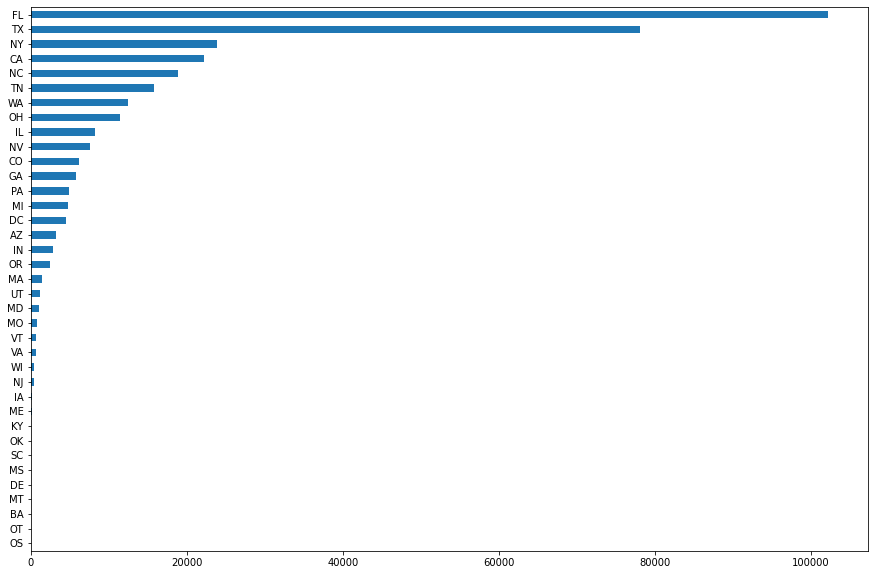

In [281]:
df['state'].value_counts(ascending = True).plot(kind = 'barh')

#### Признак "city"

In [282]:
df['city'].value_counts()

Houston         23298
Miami           15278
San Antonio     15023
Jacksonville     9473
Dallas           8459
                ...  
Suwannee            1
FORT COLLINS        1
Kagel Canyon        1
New Albany          1
Blue Springs        1
Name: city, Length: 1908, dtype: int64

In [283]:
# df[df['city'].isna()].sum()

In [284]:
df['city'] = df['city'].fillna('other')
top_city = df['city'].value_counts()[:200].index

df['city'] = df['city'].apply(lambda x: x if x in top_city else 'other')

In [285]:
df['city'].value_counts()

other                   53718
Houston                 23298
Miami                   15278
San Antonio             15023
Jacksonville             9473
                        ...  
Bellingham                246
Conroe                    245
Parkland                  245
North Richland Hills      245
Winter Haven              245
Name: city, Length: 201, dtype: int64

Признак "city" - категориальный. Если категориальных признаков будут слишком много, то придется уменьшить число категории признака "city", Если необходимо, то категории можно и увеличить.

#### Признак "sqft"

In [286]:
df['sqft'].value_counts()

0                                          948
1,200 sqft                                 804
1,000 sqft                                 633
1,100 sqft                                 563
1,800 sqft                                 555
                                          ... 
Total interior livable area: 2,503 sqft      1
7,992                                        1
12,930 sqft                                  1
6435                                         1
Total interior livable area: 4,615 sqft      1
Name: sqft, Length: 24898, dtype: int64

In [287]:
# df['sqft'].value_counts().index.tolist()

In [288]:
df.sqft.isna().sum()

23665

In [289]:
df.sqft = df.sqft.fillna('0')

In [290]:
def make_features_sqft(x):
    x = x.replace('--', '0')
    x = re.sub('[^0-9]', '', x)
    return x

df.sqft = df.sqft.apply(make_features_sqft)

In [291]:
# df.sqft.value_counts().index.tolist()

In [292]:
df['sqft'] = df['sqft'].apply(lambda x: '0' if x=='' else x)
df['sqft'] = df['sqft'].astype(float)

# df.sqft.value_counts().index.tolist()

In [293]:
df.sqft.value_counts()

0.0         25424
1200.0       1386
1000.0       1003
1500.0        995
1800.0        976
            ...  
35.0            1
136944.0        1
114003.0        1
106001.0        1
13870.0         1
Name: sqft, Length: 9480, dtype: int64

Всем пропущенным значениям поставлено число 0. Этот признак не очень согласуется с признаками "beds" и "baths".

Признак  "sqft" - числовой

In [294]:
df['sqft'] = df['sqft'].apply(lambda x: -1.0 if x=='' or x=='0' else x)
df['sqft'].astype(float)

0         2900.0
1         1947.0
2         3000.0
3         6457.0
4          897.0
           ...  
343222    4017.0
343223    2000.0
343224    1152.0
343225       0.0
343226    1462.0
Name: sqft, Length: 343227, dtype: float64

Всем пропущенным значениям проставлено число 0. Этот признак не очень согласуется с признаками "beds" и "baths".

Признак  "sqft" - числовой

#### Признак "baths"

In [295]:
df['baths'].value_counts()

2 Baths            51722
3 Baths            35291
2                  20425
2.0                16355
4 Baths            14679
                   ...  
5.25 Baths             1
116 / 116 / 116        1
Bathrooms: 21          1
1-0 / 1-0 / 1          1
44.0                   1
Name: baths, Length: 225, dtype: int64

In [296]:
# df['baths'].value_counts().index.tolist()

В результате детального анализа признака данные приведены к более или менее единообразию. 
Значение поля "Bathrooms: 241"   в признаке "baths" по всей вероятности "Bathrooms: 4", так как является домом с 4-мя спальнями для одной семьи. Поэтому ставим 4 вместо 241. Bathrooms: SemiMod ==> "Bathrooms: 6", и т.д. Все изменения в функции  make_baths(x).

In [297]:
def is_num(x):
    try:
        float(x)
        return True
    except ValueError:
        return False

def make_baths(x):
    x = re.sub('ba','Baths', x)
    x = re.sub('1 1/2', '1.5', x)
    x = x.replace('.0', '')
    x = x.replace('Bathsths','Baths')
    x = x.replace('7,500+','7,500')
    if x == 'Bathrooms: 241': 
        x='4 Baths'
    if x == 'Bathrooms: SemiMod': 
        x='6 Baths'
    if x == 'Sq. Ft. ':
        x = '0'
    x = x.replace('Bathrooms: ','')
    x = x.replace('Bathrooms: ','')
    x = x.replace('+','+ Baths')
    if x=='1 / 1-0 / 1-0 / 1-0' or x=='2-1 / 2-1 / 1-1 / 1-1':  
        x = '2 Baths'
    if x=='1 / 1 / 1 / 1' or x=='1-0 / 1-0 / 1' or x=='3-1 / 2-2':  
        x = '3'
    if x=='116 / 116 / 116':
        x='116 Baths'
    if x=='0 / 0' or x== '0.00' or x=='0.0' or x=='00' or x=='0 /':
        x='0'
    if (-1.0!=x.find('--') or -1.0!=x.find('~') or -1.0!=x.find('—')):
        x = '0'
    if is_num(x) and float(x)<120:
        x = x + ' Baths'
    return x

In [298]:
df.baths = df.baths.fillna('0')
df.baths = df.baths.apply(make_baths)

In [299]:
df.baths.value_counts()

2 Baths        100599
0 Baths         79897
3 Baths         64639
4 Baths         25906
1 Baths         16237
                ...  
14.5+ Baths         1
5.2 Baths           1
116 Baths           1
35 Baths            1
68 Baths            1
Name: baths, Length: 105, dtype: int64

In [300]:
# df.baths.value_counts().index.tolist()

In [301]:
df.baths.value_counts()['44 Baths':].sum()

44

In [302]:
ind_Baths_top = df.baths.value_counts()[:50]

Признак 'baths' - категориальный, так как данные заданы и в количестве и в виде  площади.

#### Признак "beds"

In [303]:
df['beds'].value_counts()

3 Beds        52051
4 Beds        34791
3             31189
2 Beds        25536
4             19913
              ...  
8.93 acres        1
5,510 sqft        1
3.8 acres         1
7,104 sqft        1
8,479 sqft        1
Name: beds, Length: 1144, dtype: int64

In [304]:
# df['beds'].value_counts().index.tolist()

In [305]:
df.beds = df.beds.fillna('0')

In [306]:
df['beds'].value_counts()

0             63254
3 Beds        52051
4 Beds        34791
3             31189
2 Beds        25536
              ...  
8.93 acres        1
5,510 sqft        1
3.8 acres         1
7,104 sqft        1
8,479 sqft        1
Name: beds, Length: 1144, dtype: int64

In [307]:
# df['beds'].value_counts().index.tolist()

In [308]:
# Выделим из признака 'beds' идексов строк датасет (df), где заначением являются 'Bath' или 'Baths'
# Для этого создаем временный служебный признак
df['beds_Baths'] = df['beds'].apply(lambda x: x if -1!=x.find('Bath') else ' ')

In [309]:
# Выделим  и сгруппируем для этих индексов данные признака 'baths'
ind_Baths =  df[df['beds_Baths']!=' '].index

In [310]:
# Удалим служебный признак
df.drop('beds_Baths', axis=1, inplace=True)

In [311]:
df['beds'][ind_Baths].value_counts()

Baths                                                                                                                 15257
Bath                                                                                                                    735
1 Bath, 2 Bedrooms, Living Room, Range/Oven, Refrigerator                                                                 1
1 Bath, 2 Bedrooms                                                                                                        1
1 Bath, 2 Bedrooms, Eat-In Kitchen, Living Room, Range/Oven, Refrigerator                                                 1
1 Bath, 3 or More Bedrooms, Cable TV Available, Dining Room, Eat-In Kitchen, Living Room, Range/Oven, Refrigerator        1
2 Baths, 3 or More Bedrooms                                                                                               1
1 Bath, 2 Bedrooms, Cable TV Available, Dining Room, Eat-In Kitchen, Living Room                                          1
Name: be

Заметим, что  3356  строк имеют значения 0, хотя в признаке есть "Baths". Заменим их на "1 Bath"

In [312]:
df.loc[ind_Baths, 'baths'] = df['baths'][ind_Baths].apply(lambda x: '1 Bath' 
                                                          if x== '0 Baths' else x)

In [313]:
df['baths'][ind_Baths].value_counts()

1,500     2202
2,000     1791
1,750     1707
3,000     1684
1 Bath    1511
2,250     1440
1,000     1265
1,250     1128
2,750      964
2,500      894
3,500      653
4,000      288
5,000      229
750        223
7,500       19
Name: baths, dtype: int64

In [314]:
df['beds'][ind_Baths].value_counts().index.tolist()

['Baths',
 'Bath',
 '1 Bath, 2 Bedrooms, Living Room, Range/Oven, Refrigerator',
 '1 Bath, 2 Bedrooms',
 '1 Bath, 2 Bedrooms, Eat-In Kitchen, Living Room, Range/Oven, Refrigerator',
 '1 Bath, 3 or More Bedrooms, Cable TV Available, Dining Room, Eat-In Kitchen, Living Room, Range/Oven, Refrigerator',
 '2 Baths, 3 or More Bedrooms',
 '1 Bath, 2 Bedrooms, Cable TV Available, Dining Room, Eat-In Kitchen, Living Room']

In [315]:
df['beds'][ind_Baths].value_counts()['2 Baths, 3 or More Bedrooms']

1

In [316]:
def make_beds(x):
    x = x.replace('bd','Beds')
    x = x.replace('1-2','2')
    x = x.replace('.0', '')
    x = x.replace('--', '0')
    if x=='Baths':
        x='Bath'
    if len(x)>0 and len(x)<=3 and x!='0':
        x = x + ' Beds'
    if( x==' ') or (x=='0 sqft') or (x=='0'):
        x='0 Beds'
        
    if x==' Beds' or x=='  Beds':
        x='1 Beds'
    if -1!=x.find('3 or More Bedrooms'):
        x = '3+ Beds' 
    if -1!=x.find('2 Bedrooms'):
        x = '2 Beds' 
    return x

In [317]:
df.beds = df.beds.apply(make_beds)

In [318]:
df['beds'].value_counts()

3 Beds        104002
4 Beds         68128
0 Beds         64277
2 Beds         49132
5 Beds         21483
               ...  
3,225 sqft         1
1,210 sqft         1
5.79 acres         1
42 acres           1
8,479 sqft         1
Name: beds, Length: 1047, dtype: int64

In [319]:
# df['beds'].value_counts().index.tolist()

In [320]:
# Имеются длинные данные, которые не имеют отношения к данному признаку. Их два,поставим 0.
df.beds = df.beds.apply(lambda x: '0 Beds' if len(x)>25 else x)

Здесь небходим полный анализ данных, так как в признаке о спальнях присутствуют несвойственные данные для спальных комнат в акрах, измеримые для оценки земельных участков. Размеры в кв. футах допустимы, надо найти способ совместить с количеством комнат.
* 1 acre = 4046,856 кв.м.
* 1 acre = 43560 sqft 
* 1 sqft = 0,092903 кв.м.
* acre_sqft = 43560

In [321]:
def is_num(x):
    try:
        float(x)
        return True
    except ValueError:
        return False

acre_sqft = 43560

In [322]:
def acre_to_sqft(x):
    ed_izm = re.sub('[^A-Z a-z]', '', x).strip()
    value = re.sub('[^0-9\.]', '', x).strip()
    if ed_izm=='acres' or ed_izm=='acre':
        if is_num(value):
            value = round(float(value)*acre_sqft, 1)
            return str(value)+' '+ 'sqft'
        else:
            return value
    if ed_izm=='sqft'  or ed_izm=='':
        if is_num(value):
            value = round(float(value), 1)
            return str(value)+' '+ 'sqft'
        else:
            return value
    if ed_izm =='Beds' or ed_izm=='Bath':
        return x

In [323]:
df['beds'] = df['beds'].apply(acre_to_sqft)

In [324]:
df['beds'].value_counts()

3 Beds            104002
4 Beds             68128
0 Beds             64279
2 Beds             49132
5 Beds             21483
                   ...  
3225.0 sqft            1
1210.0 sqft            1
252212.4 sqft          1
1829520.0 sqft         1
8479.0 sqft            1
Name: beds, Length: 1045, dtype: int64

In [325]:
# df['beds'].value_counts().index.tolist()

Признак 'beds' - категориальный, но можно сделать числовым, разделив признак на два признака: 'count_beds' и 'sqft_beds'

In [326]:
df['sqft_beds'] = df['beds'].apply(lambda x: x if -1!=x.find('sqft') else '0')

df['sqft_beds'].value_counts()

0                340347
5000.0 sqft          90
43560.0 sqft         46
14810.4 sqft         39
12196.8 sqft         37
                  ...  
222591.6 sqft         1
3225.0 sqft           1
1210.0 sqft           1
252212.4 sqft         1
8479.0 sqft           1
Name: sqft_beds, Length: 992, dtype: int64

In [327]:
df['sqft_beds'] = df['beds'].apply(lambda x: float(re.sub('[^0-9\.]', '', x).strip())
                                   if -1!=x.find('sqft') else 0)

In [328]:
df['sqft_beds'].value_counts()

0.0         340347
5000.0          90
43560.0         46
14810.4         39
12196.8         37
             ...  
222591.6         1
3225.0           1
1210.0           1
252212.4         1
8479.0           1
Name: sqft_beds, Length: 992, dtype: int64

In [329]:
df['count_beds'] = df['beds'].apply(lambda x: x if (-1==x.find('sqft'))  else '0')

In [330]:
df['count_beds'].value_counts()

3 Beds      104002
4 Beds       68128
0 Beds       64279
2 Beds       49132
5 Beds       21483
Bath         15992
6 Beds        6465
1 Beds        6428
0             2880
7 Beds        1801
8 Beds        1190
9 Beds         476
10 Beds        270
12 Beds        185
11 Beds        132
16 Beds         68
13 Beds         46
14 Beds         42
15 Beds         32
18 Beds         31
24 Beds         30
20 Beds         19
17 Beds         12
32 Beds          9
28 Beds          9
22 Beds          8
26 Beds          8
19 Beds          6
21 Beds          5
34 Beds          5
27 Beds          5
23 Beds          5
3+ Beds          4
40 Beds          4
30 Beds          4
44 Beds          3
36 Beds          3
25 Beds          3
47 Beds          2
42 Beds          2
78 Beds          2
48 Beds          2
33 Beds          2
29 Beds          2
35 Beds          1
76 Beds          1
46 Beds          1
52 Beds          1
75 Beds          1
39 Beds          1
144 Beds         1
53 Beds          1
99 Beds     

In [331]:
df['beds'] = df['beds'].apply(lambda x: '999 Beds' if -1!=x.find('Bath') else x)
df['count_beds'] = df['beds'].apply(lambda x: float(re.sub('[^0-9\.]', '', x).strip())
                                   if -1!=x.find('Beds') else 0)

In [332]:
df['count_beds'].value_counts()

3.0      104006
4.0       68128
0.0       67159
2.0       49132
5.0       21483
999.0     15992
6.0        6465
1.0        6428
7.0        1801
8.0        1190
9.0         476
10.0        270
12.0        185
11.0        132
16.0         68
13.0         46
14.0         42
15.0         32
18.0         31
24.0         30
20.0         19
17.0         12
32.0          9
28.0          9
22.0          8
26.0          8
19.0          6
21.0          5
23.0          5
34.0          5
27.0          5
30.0          4
40.0          4
44.0          3
36.0          3
25.0          3
47.0          2
42.0          2
33.0          2
48.0          2
78.0          2
29.0          2
35.0          1
76.0          1
46.0          1
52.0          1
75.0          1
39.0          1
144.0         1
53.0          1
99.0          1
31.0          1
88.0          1
Name: count_beds, dtype: int64

Для признака  поставим значение 999 (большое число) вместо 'Bath' для того, чтобы подчеркнуть значимость совмещенных спальных комнат с ванной.

In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343227 entries, 0 to 343226
Data columns (total 26 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   status            343227 non-null  object 
 1   propertyType      343227 non-null  object 
 2   baths             343227 non-null  object 
 3   homeFacts         343227 non-null  object 
 4   fireplace         343227 non-null  int64  
 5   city              343227 non-null  object 
 6   schools           343227 non-null  object 
 7   sqft              343227 non-null  float64
 8   beds              343227 non-null  object 
 9   state             343227 non-null  object 
 10  stories           343227 non-null  float64
 11  PrivatePool       343227 non-null  int64  
 12  target            343227 non-null  int64  
 13  Year built        343227 non-null  float64
 14  Remodeled year    343227 non-null  float64
 15  Heating           343227 non-null  object 
 16  Cooling           34

In [334]:
#  Удаляется признаки: вспомогательные, рабочие и расшипленные на отдельные признаки
feature_drop = ['schools',  'homeFacts', 'beds']
df.drop(feature_drop, axis=1, inplace=True)

In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343227 entries, 0 to 343226
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   status            343227 non-null  object 
 1   propertyType      343227 non-null  object 
 2   baths             343227 non-null  object 
 3   fireplace         343227 non-null  int64  
 4   city              343227 non-null  object 
 5   sqft              343227 non-null  float64
 6   state             343227 non-null  object 
 7   stories           343227 non-null  float64
 8   PrivatePool       343227 non-null  int64  
 9   target            343227 non-null  int64  
 10  Year built        343227 non-null  float64
 11  Remodeled year    343227 non-null  float64
 12  Heating           343227 non-null  object 
 13  Cooling           343227 non-null  object 
 14  Parking           343227 non-null  int64  
 15  lotsize           343227 non-null  float64
 16  Price/sqft        34

Признак "target" надо преобразовать float

In [336]:
df.to_csv('df_after_EDA.csv')

# Результаты EDA

Датасет очень "грязный". Цель -  максимально сохранить исходные данные. Поэтому пришлось изменить и исправить даже одиночные строки.
* Слишком длительное время было уделено для чистки датасет.
* В датасет очень большое число категориальных признаков. На следующем этапе, при выборе методов прогноза необходимо учитывать эту особенность проекта.
* Следующим ответственным этапом будет подборка важных признаков и их типа, которые определяются с помощью модельных экспериментов. 
* Выбор модели для прогноза особой сложности не представляет.
* Для прогнозных расчетов используется Kaggle.

Окончательный результат постараюсь оформить в виде презентации.

# Data preprocessing, Feature engineering

In [337]:
import seaborn as sns
import matplotlib.pyplot as plt

In [338]:
# Если понадобится повторно изменить или исправить признаков и их содержимые, можно повторить с этого датасет.
data = pd.read_csv('df_after_EDA.csv')
# data.head(3)

In [339]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343227 entries, 0 to 343226
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        343227 non-null  int64  
 1   status            343227 non-null  object 
 2   propertyType      343227 non-null  object 
 3   baths             343227 non-null  object 
 4   fireplace         343227 non-null  int64  
 5   city              343227 non-null  object 
 6   sqft              343227 non-null  float64
 7   state             343227 non-null  object 
 8   stories           343227 non-null  float64
 9   PrivatePool       343227 non-null  int64  
 10  target            343227 non-null  int64  
 11  Year built        343227 non-null  float64
 12  Remodeled year    343227 non-null  float64
 13  Heating           343227 non-null  object 
 14  Cooling           343227 non-null  object 
 15  Parking           343227 non-null  int64  
 16  lotsize           34

In [340]:
data.drop('Unnamed: 0', axis=1,inplace=True)

In [341]:
data['target'] = data['target'].astype(float)

In [342]:
# Сохраним для случая повторной загрузки 
df = data.copy()

In [343]:
# data = df.copy()

In [344]:
df_num = data.select_dtypes(include=[np.number])
col_num = df_num.columns.values
col_num

array(['fireplace', 'sqft', 'stories', 'PrivatePool', 'target',
       'Year built', 'Remodeled year', 'Parking', 'lotsize', 'Price/sqft',
       'schools_rating', 'schools_Distance', 'school_count', 'sqft_beds',
       'count_beds'], dtype=object)

## Numerical features

In [345]:
data[col_num].corr()

,fireplace,sqft,stories,PrivatePool,target,Year built,Remodeled year,Parking,lotsize,Price/sqft,schools_rating,schools_Distance,school_count,sqft_beds,count_beds
fireplace,1.000000,0.001662,0.033285,0.031957,0.064656,0.074282,0.030217,0.152970,0.003254,0.010227,0.090432,-0.054385,0.003273,-0.008152,0.050848
sqft,0.001662,1.000000,0.000336,-0.000730,-0.000241,0.003125,-0.001788,0.000397,0.000047,-0.001392,-0.000944,0.000528,0.002530,-0.000055,-0.000523
stories,0.033285,0.000336,1.000000,0.102275,0.082264,0.023430,-0.024821,0.128414,0.000090,0.184653,0.026129,-0.025222,0.017083,-0.009642,-0.061459
PrivatePool,0.031957,-0.000730,0.102275,1.000000,0.104777,-0.063588,0.059672,0.176831,-0.000118,0.153120,0.109497,0.044814,-0.029427,-0.005289,-0.083567
target,0.064656,-0.000241,0.082264,0.104777,1.000000,-0.017823,-0.009523,-0.008477,0.001400,0.456935,0.153478,0.006886,-0.013660,0.027675,-0.000673
Year built,0.074282,0.003125,0.023430,-0.063588,-0.017823,1.000000,0.413006,0.094786,-0.001522,0.064981,-0.220543,-0.058750,0.049946,-0.015571,-0.050921
Remodeled year,0.030217,-0.001788,-0.024821,0.059672,-0.009523,0.413006,1.000000,0.074658,-0.002711,0.007384,-0.041737,0.009790,-0.035282,-0.009182,-0.002669
Parking,0.152970,0.000397,0.128414,0.176831,-0.008477,0.094786,0.074658,1.000000,0.002852,0.143525,0.015817,-0.019513,0.007411,-0.014940,-0.236234
lotsize,0.003254,0.000047,0.000090,-0.000118,0.001400,-0.001522,-0.002711,0.002852,1.000000,-0.000451,-0.000230,-0.000549,-0.001707,0.000011,-0.001551
Price/sqft,0.010227,-0.001392,0.184653,0.153120,0.456935,0.064981,0.007384,0.143525,-0.000451,1.000000,0.100915,-0.000685,-0.023045,-0.007908,-0.125397


In [346]:
plt.rcParams['figure.figsize']=(15,10)

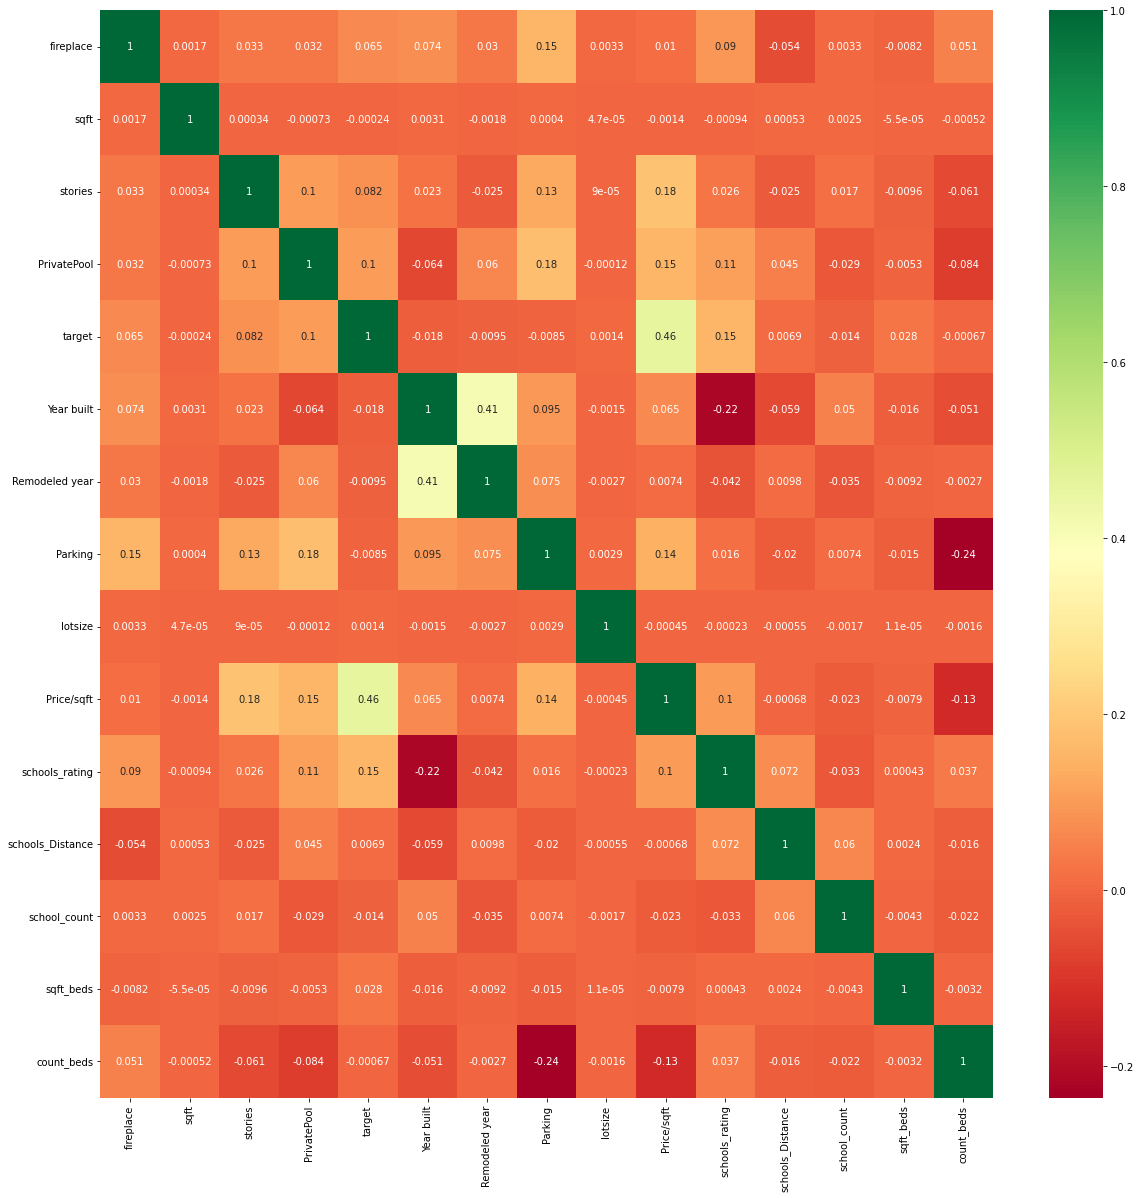

In [347]:
corrmat = data[col_num].corr()
top_corr_features = corrmat.index
data[top_corr_features].corr().loc['target', data[top_corr_features].corr().loc['target', :]>0.05]

plt.figure(figsize=(20,20))
ax = sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Признак 'lotsize'

count    3.432270e+05
mean     6.970015e+04
std      5.457482e+06
min      0.000000e+00
25%      0.000000e+00
50%      5.750000e+03
75%      1.001900e+04
max      2.147484e+09
Name: lotsize, dtype: float64

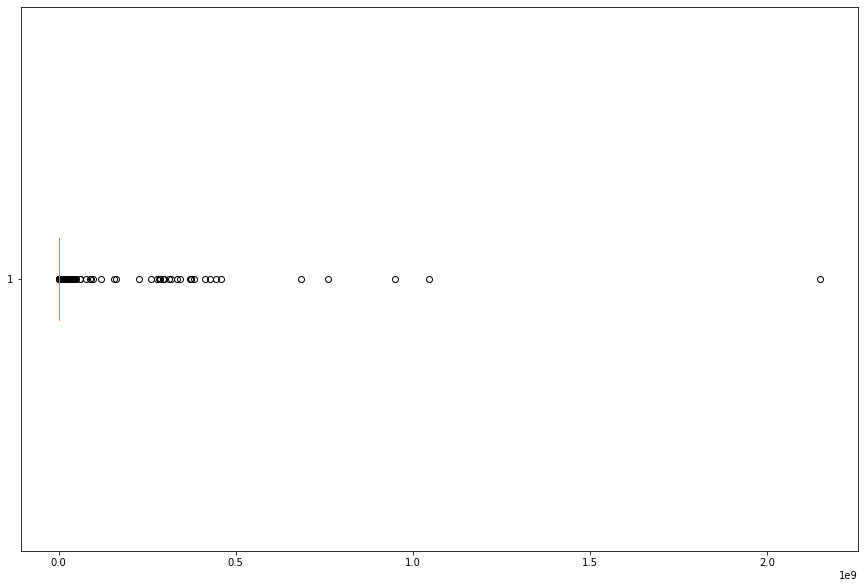

In [348]:
plt.boxplot(data['lotsize'], vert=False)
data['lotsize'].describe()

In [349]:
# Имеются явные выбросы
data[data['lotsize']>0.5e6]

,status,propertyType,baths,fireplace,city,sqft,state,stories,PrivatePool,target,...,Cooling,Parking,lotsize,Price/sqft,schools_rating,schools_Distance,schools_Grades,school_count,sqft_beds,count_beds
20,for sale,single-family,5 Baths,1,other,5266.0,OR,1.0,0,3500000.0,...,Other,1,667339.2,665.0,6.33,4.67,K - 12,3,0.0,5.0
66,for sale,single-family,4 Baths,1,Saint Johns,3928.0,FL,1.0,1,1785000.0,...,Other,1,1106859.6,454.0,9.00,1.38,PK - 12,3,0.0,4.0
693,other,single-family,2 Baths,0,Jacksonville,1679.0,FL,2.0,0,119900.0,...,Other,1,3267000.0,71.0,3.00,2.00,PK - 12,3,0.0,4.0
908,active,ranch,2.5 Baths,1,other,2364.0,MI,1.0,0,749000.0,...,Other,0,6882480.0,317.0,5.00,4.60,K - 12,3,0.0,4.0
1040,pending,ranch,1.5 Baths,0,Cleveland,0.0,TX,-1.0,0,175000.0,...,Other,0,1590811.0,0.0,3.67,3.27,PK - 12,6,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341756,for sale,single-family,2 Baths,1,Panama City,3266.0,FL,-1.0,1,279000.0,...,Other,0,993168.0,85.0,5.00,5.34,PK - 12,3,0.0,3.0
342195,active,contemporary,0 Baths,0,Charlotte,2656.0,VT,2.0,0,549900.0,...,Other,0,866844.0,0.0,9.00,2.30,Preschool - 8,2,0.0,0.0
342410,for sale,townhouse,3 Baths,0,Houston,1440.0,TX,2.0,0,189900.0,...,Other,1,571071.6,132.0,4.67,1.13,PK - 12,3,0.0,2.0
342748,for sale,single-family,0 Baths,0,Lakeland,672.0,FL,-1.0,0,518000.0,...,Other,0,558439.2,771.0,3.33,4.13,PK - 12,3,0.0,2.0


In [350]:
ind_lotsize = data[data['lotsize']>0.5e6].index
ind_lotsize

Int64Index([    20,     66,    693,    908,   1040,   1094,   1211,   1264,
              1313,   1803,
            ...
            341203, 341447, 341450, 341485, 341540, 341756, 342195, 342410,
            342748, 342913],
           dtype='int64', length=2159)

In [351]:
# В принципе можно исправить на значения 75% персентиль, или на медианного значения 
data.loc[ind_lotsize,'lotsize'] = 1.001900e+04

In [352]:
data['lotsize'].describe()

count    343227.000000
mean      12886.223186
std       36970.366096
min           0.000000
25%           0.000000
50%        5750.000000
75%       10019.000000
max      499197.600000
Name: lotsize, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f4731857bd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4731856dd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4731859510>],
 'medians': [<matplotlib.lines.Line2D at 0x7f4731855d10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f4731855790>],
 'means': []}

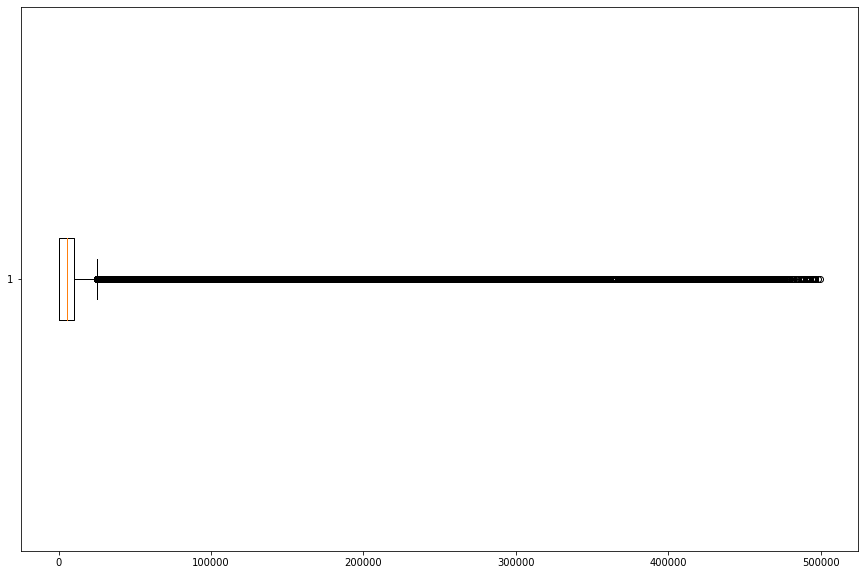

In [353]:
plt.boxplot(data['lotsize'], vert=False)

<AxesSubplot:>

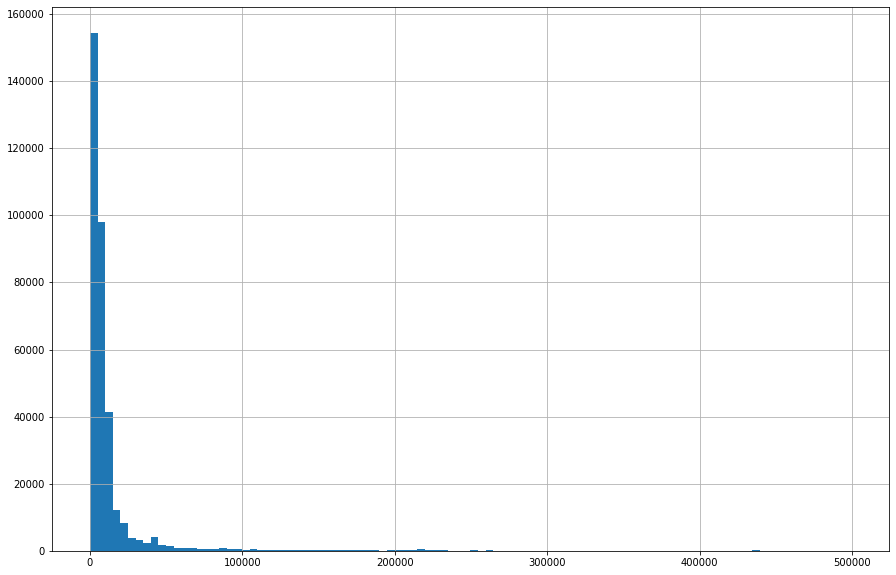

In [354]:
data['lotsize'].hist(bins=100)

### Признак 'sqft'

{'whiskers': [<matplotlib.lines.Line2D at 0x7f4731935050>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4731933250>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4731935850>],
 'medians': [<matplotlib.lines.Line2D at 0x7f4731931d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f4731931490>],
 'means': []}

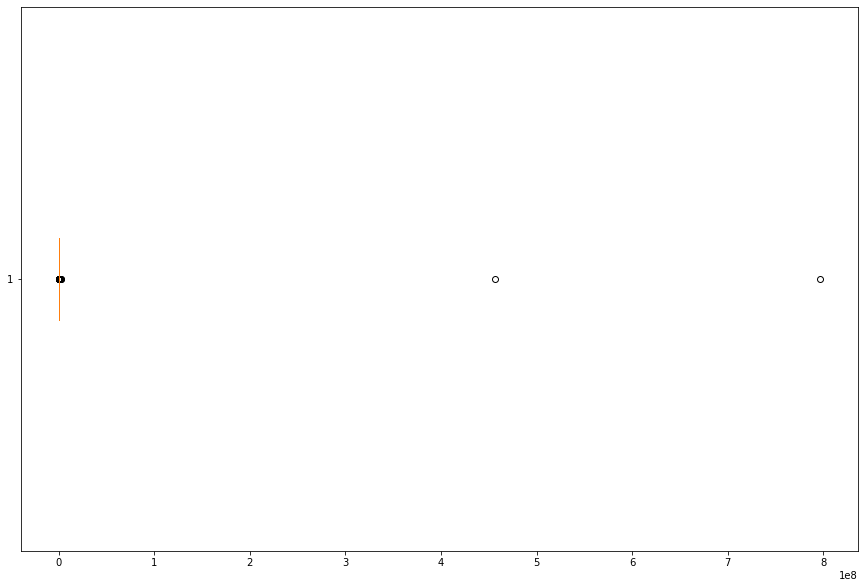

In [355]:
plt.boxplot(data['sqft'], vert=False)

In [356]:
data['sqft'].describe()

count    3.432270e+05
mean     6.213918e+03
std      1.566389e+06
min      0.000000e+00
25%      1.180000e+03
50%      1.750000e+03
75%      2.539000e+03
max      7.959794e+08
Name: sqft, dtype: float64

In [357]:
# ind_sqft = data[['target','sqft']][data['sqft']>1.5e4]
ind_sqft = data['sqft'][data['sqft']>1.0e4].index

In [358]:
data.loc[ind_sqft]

,status,propertyType,baths,fireplace,city,sqft,state,stories,PrivatePool,target,...,Cooling,Parking,lotsize,Price/sqft,schools_rating,schools_Distance,schools_Grades,school_count,sqft_beds,count_beds
83,for sale,cooperative,2 Baths,0,other,107250.0,NY,-1.0,0,319000.0,...,Other,0,32670.0,0.0,5.33,0.73,K - 12,3,0.0,2.0
125,for sale,single-family,0 Baths,0,other,109200.0,NY,-1.0,0,270000.0,...,Other,0,40075.2,0.0,8.00,0.57,K - 12,3,0.0,0.0
163,active,detached,0 Baths,5,Dallas,11598.0,TX,-1.0,0,6599000.0,...,Other,0,54014.4,0.0,6.00,3.53,Preschool - 12,4,0.0,0.0
186,for sale,cooperative,0 Baths,0,New York,225667.0,NY,14.0,0,455000.0,...,Other,0,27007.2,2.0,1.67,2.13,PK - 8,3,0.0,0.0
290,for sale,cooperative,0 Baths,0,other,373772.0,NY,1.0,0,239000.0,...,Other,1,263102.4,1.0,7.67,0.62,6 - 12,3,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342631,active,multi-family,0 Baths,0,Glendale,456602479.0,KY,-1.0,0,198000.0,...,Other,0,456509.0,0.0,6.33,4.98,PK - 12,6,0.0,0.0
342787,for sale,cooperative,0 Baths,0,Brooklyn,40558.0,NY,7.0,0,245000.0,...,Other,0,11325.6,6.0,10.00,0.19,K - 5,1,0.0,0.0
342864,for sale,cooperative,1 Baths,0,New York,21304.0,NY,4.0,0,499000.0,...,Other,0,0.0,23.0,6.00,1.50,PK - 12,3,0.0,1.0
343098,for sale,multi-family,20 Baths,0,Detroit,13870.0,MI,2.0,0,749000.0,...,Other,0,20473.2,54.0,3.08,5.25,K - 12,13,0.0,0.0


In [359]:
# Для  строк с индексами ind_sqft значение признака слишком большие, заменим на медианную значению, т.е. на 1.750000e+03 
456602479.0/107639 # hectar для жилия?

4241.979942214253

In [360]:
data.loc[ind_sqft, 'sqft'] = 2.539000e+03

{'whiskers': [<matplotlib.lines.Line2D at 0x7f4731911b10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4731910b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f47319124d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f473190f4d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f473190ec10>],
 'means': []}

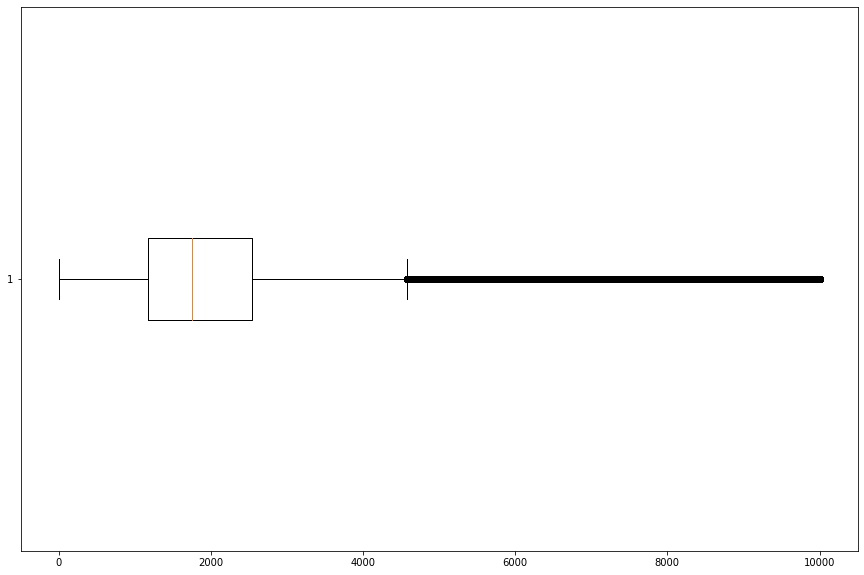

In [361]:
plt.boxplot(data['sqft'], vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f47319747d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4731973910>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4731974f90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f4731972650>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f4731971e90>],
 'means': []}

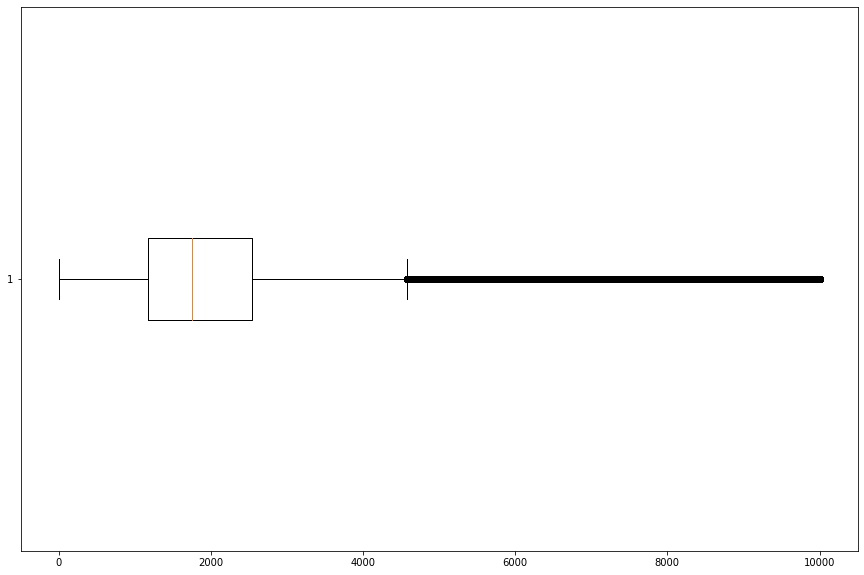

In [362]:
plt.boxplot(data['sqft'], vert=False)

<AxesSubplot:>

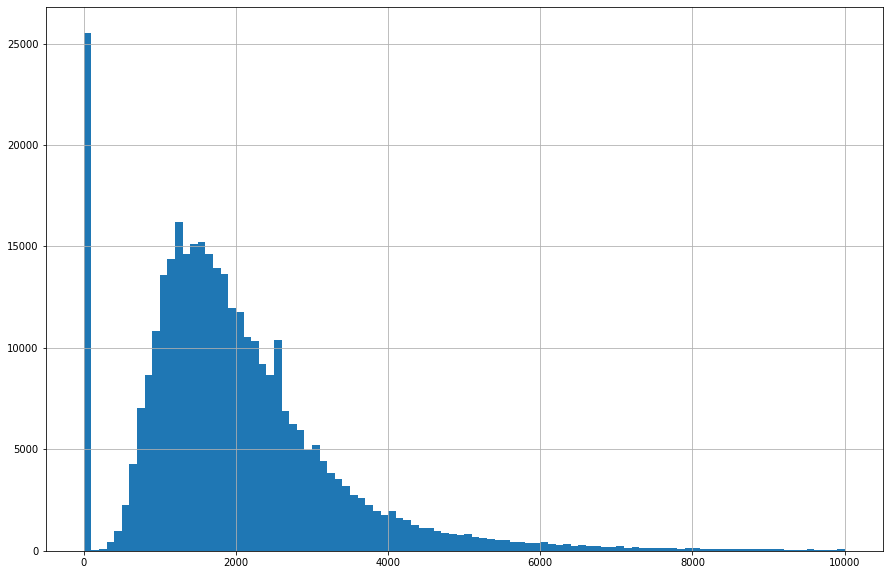

In [363]:
data['sqft'].describe()
data['sqft'].hist(bins=100)

### Признак 'Price/sqft'

{'whiskers': [<matplotlib.lines.Line2D at 0x7f473199c090>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4731995f50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f47319986d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f4731994ed0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f4731994690>],
 'means': []}

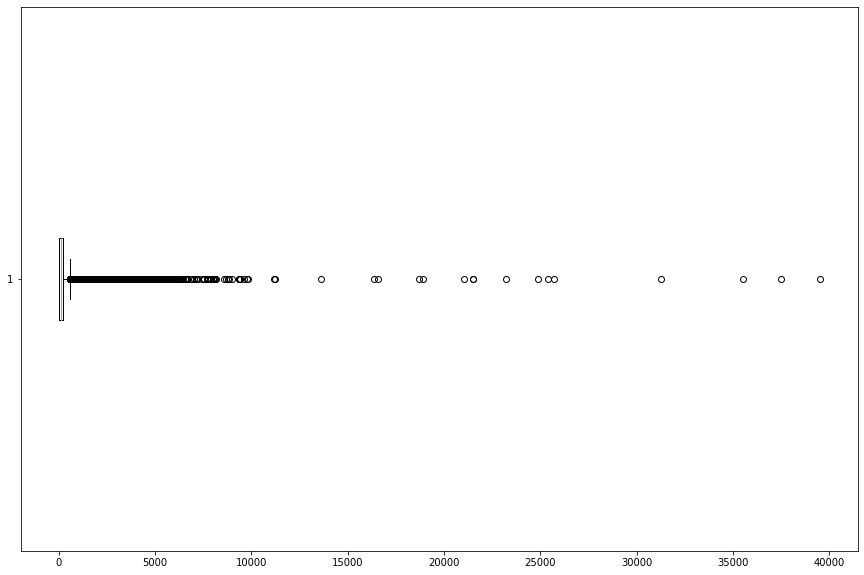

In [364]:
plt.boxplot(data['Price/sqft'], vert=False)

In [365]:
data['Price/sqft'].describe()

count    343227.000000
mean        204.626285
std         356.954001
min           0.000000
25%           0.000000
50%         137.000000
75%         242.000000
max       39500.000000
Name: Price/sqft, dtype: float64

In [366]:
ind_Price_sq = data[data['Price/sqft']>3000].index
ind_Price_sq

Int64Index([  2834,   3038,   3366,   3927,   4665,   4980,   5260,   5331,
              6836,   6899,
            ...
            339482, 339808, 340239, 340514, 340535, 340754, 340924, 341375,
            341635, 342832],
           dtype='int64', length=491)

In [367]:
data.loc[ind_Price_sq,'Price/sqft'] = 2523.5

{'whiskers': [<matplotlib.lines.Line2D at 0x7f47319f8150>,
 'caps': [<matplotlib.lines.Line2D at 0x7f47319f6f50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f47319f89d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f47319f64d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f47319f5c90>],
 'means': []}

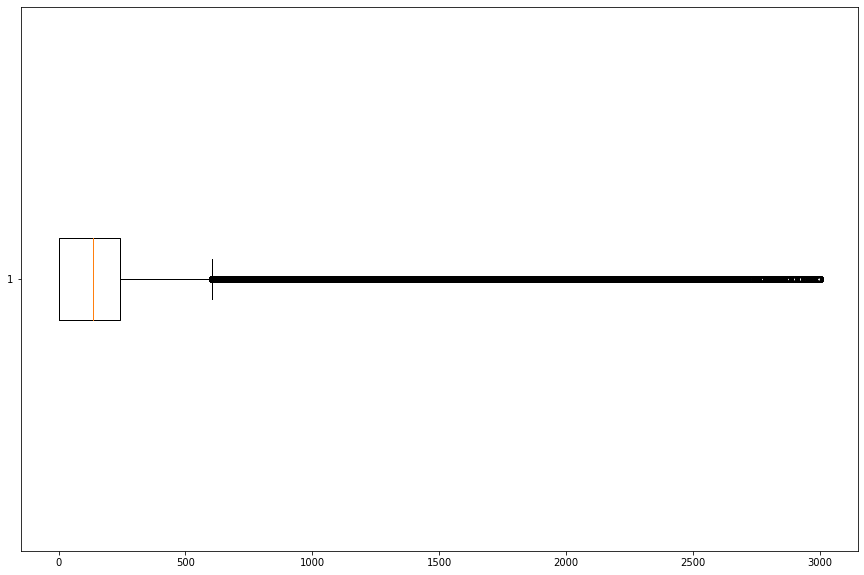

In [368]:
plt.boxplot(data['Price/sqft'], vert=False)

### Признак 'target'

In [369]:
data['target'].describe()

count    3.432270e+05
mean     6.749297e+05
std      1.876817e+06
min      1.000000e+00
25%      2.099000e+05
50%      3.390000e+05
75%      5.999000e+05
max      1.950000e+08
Name: target, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f47319daf50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f47319d8e90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f47319db610>],
 'medians': [<matplotlib.lines.Line2D at 0x7f47319d7e90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f47319d78d0>],
 'means': []}

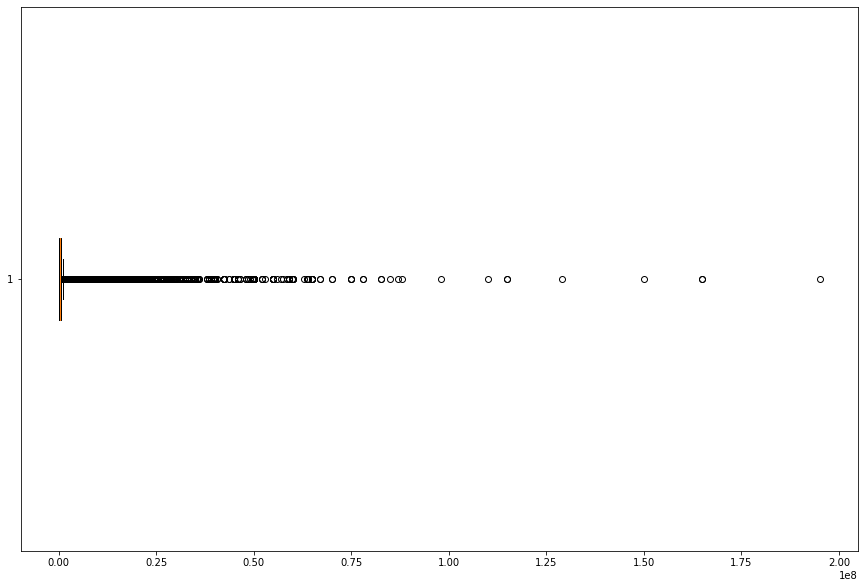

In [370]:
plt.boxplot(data['target'], vert=False)

In [371]:
data[data['target']>1.0e8]

,status,propertyType,baths,fireplace,city,sqft,state,stories,PrivatePool,target,...,Cooling,Parking,lotsize,Price/sqft,schools_rating,schools_Distance,schools_Grades,school_count,sqft_beds,count_beds
49321,for sale,single-family,24 Baths,1,other,2539.0,CA,2.0,1,110000000.0,...,Other,1,226512.0,2895.0,7.33,4.36,K - 12,3,0.0,12.0
100195,for sale,single-family,0 Baths,0,Los Angeles,0.0,CA,-1.0,1,150000000.0,...,Other,0,457815.6,0.0,7.33,2.18,K - 12,3,0.0,0.0
109082,for sale,single-family,10 Baths,1,Los Angeles,2539.0,CA,3.0,1,115000000.0,...,Other,0,431244.0,2523.5,7.33,1.80,K - 12,3,0.0,9.0
120528,for sale,single-family,18 Baths,1,Los Angeles,0.0,CA,2.0,1,195000000.0,...,Other,1,282704.4,0.0,8.50,2.15,K - 12,2,0.0,11.0
130623,for sale,single-family,23 Baths,1,other,2539.0,CA,3.0,1,165000000.0,...,Other,1,236530.8,2523.5,7.33,4.81,K - 12,3,0.0,20.0
162863,for sale,single-family,23 Baths,1,other,2539.0,CA,3.0,1,129000000.0,...,Other,1,10019.0,3000.0,7.33,3.50,K - 12,3,0.0,12.0
260287,for sale,single-family,23 Baths,1,other,2539.0,CA,3.0,1,165000000.0,...,Other,1,429937.2,2523.5,7.33,4.43,K - 12,3,0.0,20.0
267704,for sale,single-family,10 Baths,1,Los Angeles,2539.0,CA,3.0,1,115000000.0,...,Other,0,168577.2,2523.5,7.33,1.90,K - 12,3,0.0,9.0


In [372]:
ind_target = data[data['target']>1.0e8].index
ind_target

Int64Index([49321, 100195, 109082, 120528, 130623, 162863, 260287, 267704], dtype='int64')

In [373]:
data.loc[ind_target,'target'] = 1.0e8

In [374]:
data['target'].describe()

count    3.432270e+05
mean     6.739275e+05
std      1.805849e+06
min      1.000000e+00
25%      2.099000e+05
50%      3.390000e+05
75%      5.999000e+05
max      1.000000e+08
Name: target, dtype: float64

### Признаки 'PrivatePool' и 'Parking'

In [375]:
# Отнесем к категориальным признакам
data['PrivatePool'].value_counts()

0    299283
1     43944
Name: PrivatePool, dtype: int64

In [376]:
#Отнесем к категориальным признакам
data['Parking'].value_counts()

1    185263
0    157964
Name: Parking, dtype: int64

### Признак 'fireplace'

In [377]:
data['fireplace'].value_counts()

0     245717
1      93714
2       2788
3        662
4        208
5         70
6         36
7         18
8          5
9          3
10         3
11         2
12         1
Name: fireplace, dtype: int64

In [378]:
data['fireplace'].describe()

count    343227.000000
mean          0.299892
std           0.507675
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          12.000000
Name: fireplace, dtype: float64

<AxesSubplot:>

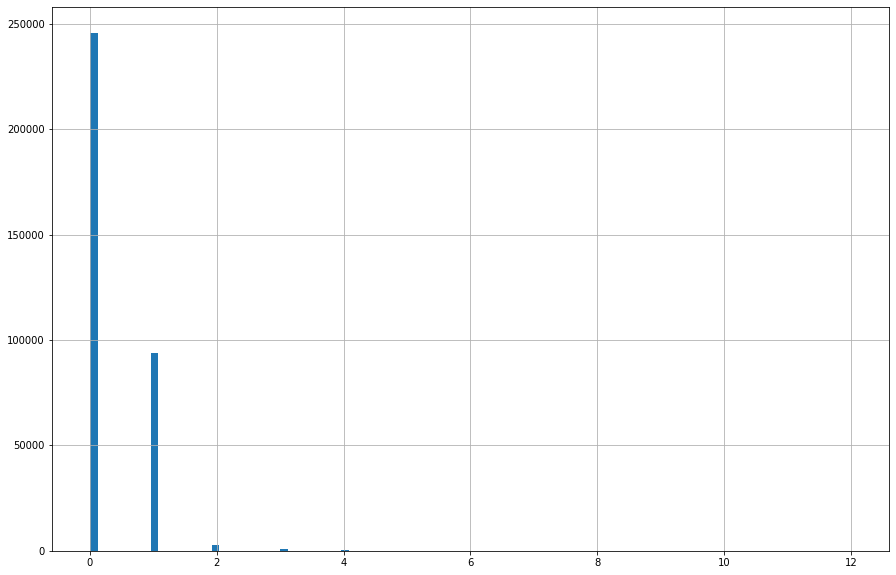

In [379]:
data['fireplace'].hist(bins=100)

### Признак 'schools_rating'

<AxesSubplot:>

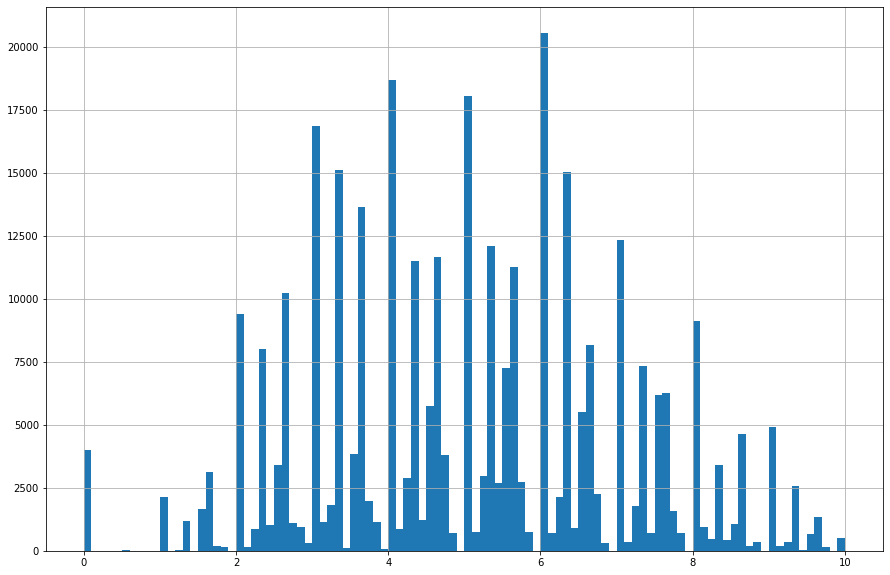

In [380]:
data['schools_rating'].value_counts()
data['schools_rating'].hist(bins=100)

### Признак 'schools_Distance']

In [381]:
data['schools_Distance'].value_counts()

0.90     3181
0.00     3151
1.00     3108
1.10     3060
1.20     2926
         ... 
23.56       1
17.25       1
24.71       1
18.13       1
25.04       1
Name: schools_Distance, Length: 1955, dtype: int64

In [382]:
# data['schools_Distance'] = df['schools_Distance']

{'whiskers': [<matplotlib.lines.Line2D at 0x7f4731aab950>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4731aaab10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4731aabf90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f4731aa9b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f4731aa91d0>],
 'means': []}

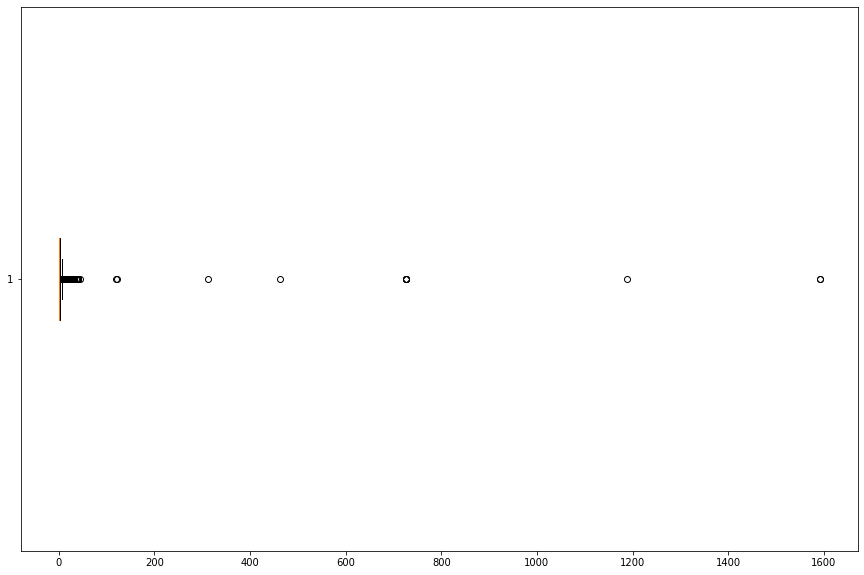

In [383]:
plt.boxplot(data['schools_Distance'], vert=False)

In [384]:
data['schools_Distance'].describe()

count    343227.000000
mean          2.752938
std           6.050248
min           0.000000
25%           1.010000
50%           1.700000
75%           3.070000
max        1590.830000
Name: schools_Distance, dtype: float64

In [385]:
# Предполагаем, что школы недолжны быть так далеко, дальше 10-15 миля многоватоБ но мы допустим.
data[data['schools_Distance']>=15.0]

,status,propertyType,baths,fireplace,city,sqft,state,stories,PrivatePool,target,...,Cooling,Parking,lotsize,Price/sqft,schools_rating,schools_Distance,schools_Grades,school_count,sqft_beds,count_beds
32,other,condo,2 Baths,0,North Miami Beach,1085.0,FL,-1.0,0,179000.0,...,Other,0,0.0,165.0,8.00,16.30,PK - 12,2,0.0,2.0
260,for sale,single-family,2 Baths,0,Lehigh Acres,1410.0,FL,1.0,0,180500.0,...,Other,1,21780.0,128.0,5.67,16.80,PK - 12,3,0.0,3.0
369,for sale,single-family,3 Baths,1,San Antonio,3031.0,TX,2.0,0,450000.0,...,Other,1,22215.6,148.0,9.00,25.12,PK - 12,2,0.0,3.0
671,for sale,single-family,3 Baths,0,El Paso,1892.0,TX,-1.0,0,217580.0,...,Other,0,2178.0,115.0,5.00,39.69,PK - 12,3,0.0,4.0
677,for sale,single-family,2 Baths,0,El Paso,1637.0,TX,-1.0,0,185950.0,...,Other,0,5301.0,114.0,5.00,39.69,PK - 12,3,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342970,for sale,single-family,2 Baths,0,Miami Gardens,1140.0,FL,-1.0,0,195000.0,...,Other,0,3136.0,171.0,6.00,15.30,PK - 12,2,0.0,3.0
343116,other,single-family,3 Baths,0,North Miami Beach,2299.0,FL,1.0,1,680000.0,...,Other,1,14374.8,296.0,7.50,16.20,PK - 12,2,0.0,4.0
343136,for sale,single-family,3.5 Baths,0,San Antonio,2754.0,TX,1.0,1,445981.0,...,Other,0,24829.2,162.0,8.67,25.04,PK - 12,3,0.0,4.0
343213,for sale,single-family,3 Baths,0,Bonita Springs,2022.0,FL,1.0,1,334900.0,...,Other,1,6752.0,166.0,5.46,16.56,PK - 12,24,0.0,3.0


In [386]:
ind_sc_dist = data[data['schools_Distance']>=15.0].index
data.loc[ind_sc_dist, 'schools_Distance'] = 3.070000

<AxesSubplot:>

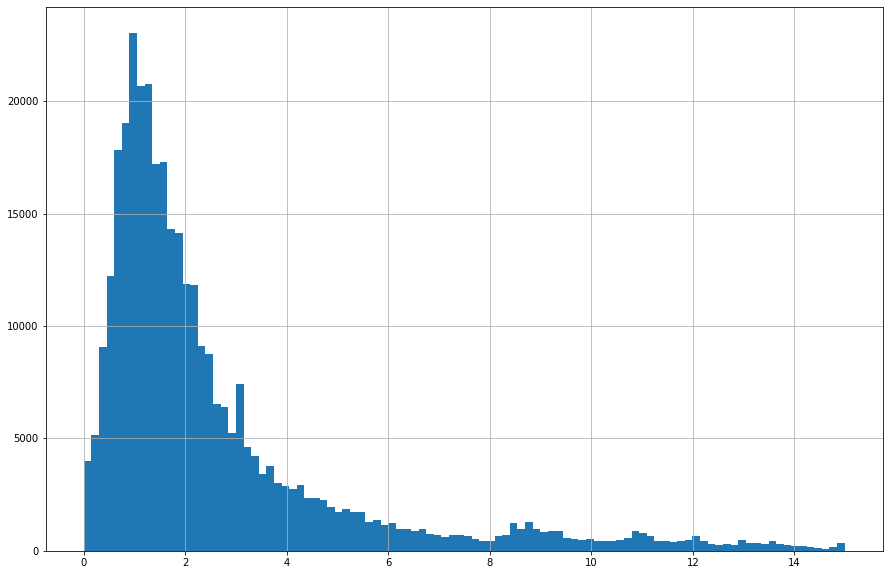

In [387]:
data['schools_Distance'].describe()
data['schools_Distance'].hist(bins=100)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f4731ac3d10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4731ac2fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4731ac4490>],
 'medians': [<matplotlib.lines.Line2D at 0x7f4731ac2310>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f4731b41b10>],
 'means': []}

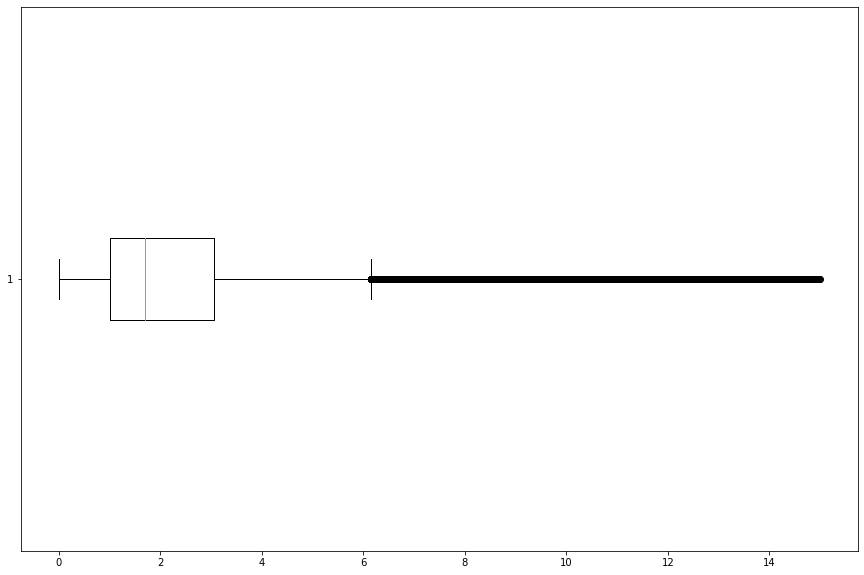

In [388]:
plt.boxplot(data['schools_Distance'], vert=False)

### Признак 'school_count']

In [389]:
data['school_count'].describe()

count    343227.000000
mean          4.201377
std           4.511333
min           0.000000
25%           3.000000
50%           3.000000
75%           4.000000
max          65.000000
Name: school_count, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f4731b27150>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4731b26410>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4731b2b210>],
 'medians': [<matplotlib.lines.Line2D at 0x7f4731b24190>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f4731b23bd0>],
 'means': []}

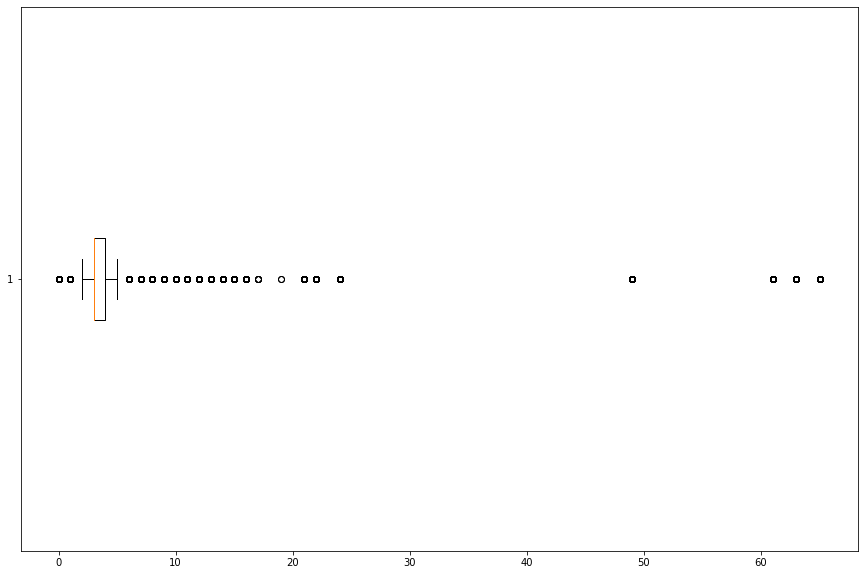

In [390]:
plt.boxplot(data['school_count'], vert=False)

In [391]:
data[data['school_count']>30]

,status,propertyType,baths,fireplace,city,sqft,state,stories,PrivatePool,target,...,Cooling,Parking,lotsize,Price/sqft,schools_rating,schools_Distance,schools_Grades,school_count,sqft_beds,count_beds
522,for sale,single-family,2 Baths,0,Garland,1515.0,TX,1.0,0,198500.0,...,Other,1,7597.0,131.0,5.31,3.97,PK - 12,65,0.0,3.0
819,for sale,single-family,0 Baths,0,Cleveland,1374.0,OH,1.0,0,75000.0,...,Other,1,4480.0,55.0,2.46,6.68,PK - 12,63,0.0,4.0
985,for sale,multi-family,2 Baths,0,Cleveland,1963.0,OH,2.0,0,99900.0,...,Other,1,5200.0,51.0,2.46,5.92,PK - 12,63,0.0,4.0
1116,for sale,single-family,0 Baths,0,Cleveland,1143.0,OH,1.0,0,20000.0,...,Other,1,6762.0,17.0,2.46,4.93,PK - 12,63,0.0,2.0
1308,for sale,single-family,2 Baths,0,Buffalo,1009.0,NY,1.0,0,129900.0,...,Other,0,2770.0,129.0,2.84,3.02,PK - 12,49,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342358,for sale,multi-family,3 Baths,0,Cleveland,1649.0,OH,2.0,0,92000.0,...,Other,1,6000.0,56.0,2.46,5.61,PK - 12,63,0.0,4.0
342458,for sale,multi-family,2 Baths,0,Cleveland,1610.0,OH,1.0,0,23000.0,...,Other,1,5600.0,14.0,2.46,5.34,PK - 12,63,0.0,3.0
342658,for sale,condo,2 Baths,1,Cleveland,1606.0,OH,1.0,0,65000.0,...,Other,1,33541.2,40.0,2.46,5.73,PK - 12,63,0.0,3.0
343001,foreclosure,single-family,2 Baths,0,Cleveland,864.0,OH,1.0,0,20900.0,...,Other,1,6400.0,24.0,2.46,7.23,PK - 12,63,0.0,3.0


In [392]:
ind_sc_count = data[data['school_count']>25].index
data.loc[ind_sc_count,'school_count'] = 25

<AxesSubplot:>

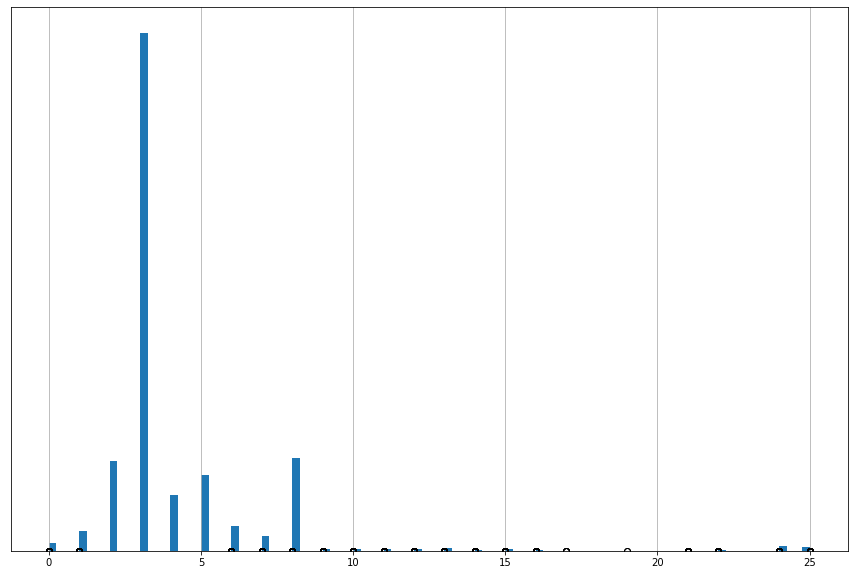

In [393]:
plt.boxplot(data['school_count'], vert=False)
data['school_count'].hist(bins=100)

### Признак 'sqft_beds'

In [394]:
data['sqft_beds'].describe()

count    3.432270e+05
mean     1.147096e+03
std      8.309896e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.766060e+07
Name: sqft_beds, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f4731b45fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4731b44fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4731b47950>],
 'medians': [<matplotlib.lines.Line2D at 0x7f4731b43c90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f4731b43810>],
 'means': []}

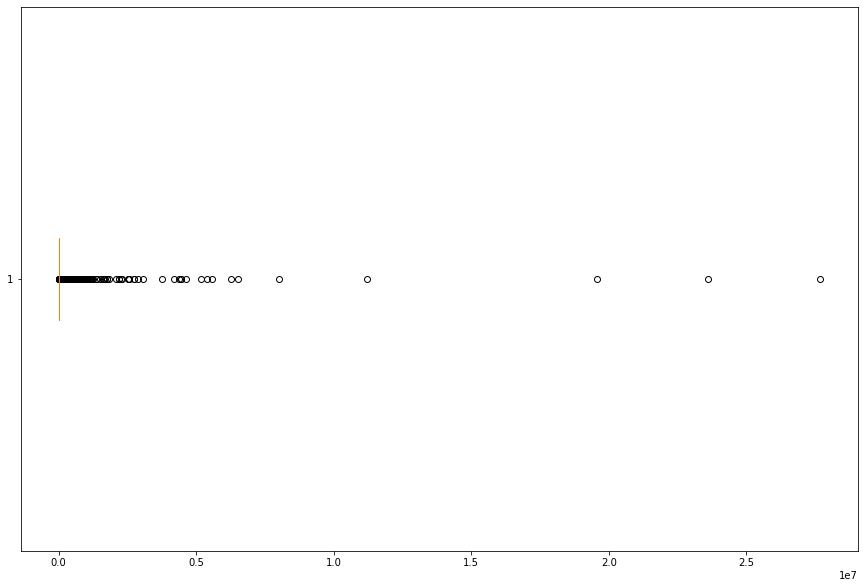

In [395]:
plt.boxplot(data['sqft_beds'], vert=False)

In [396]:
data[data['sqft_beds']>0.5e6]

,status,propertyType,baths,fireplace,city,sqft,state,stories,PrivatePool,target,...,Cooling,Parking,lotsize,Price/sqft,schools_rating,schools_Distance,schools_Grades,school_count,sqft_beds,count_beds
1395,other,other style,0 Baths,0,Jacksonville,0.0,FL,-1.0,0,174000.0,...,Other,0,0.0,0.0,5.67,4.03,PK - 12,3,1393920.0,0.0
4945,other,other style,0 Baths,0,Jacksonville,0.0,FL,-1.0,0,175000.0,...,Other,0,0.0,0.0,6.33,3.77,PK - 12,3,609840.0,0.0
9844,other,other style,0 Baths,0,San Antonio,0.0,TX,-1.0,0,900000.0,...,Other,0,0.0,0.0,2.33,2.47,PK - 12,3,27660600.0,0.0
14708,other,other style,0 Baths,0,Houston,0.0,TX,-1.0,0,1999990.0,...,Other,0,0.0,0.0,5.67,2.97,PK - 12,3,1611720.0,0.0
15496,other,other style,0 Baths,0,Orlando,0.0,FL,-1.0,0,49900.0,...,Other,0,0.0,0.0,5.00,4.70,9 - 12,1,784080.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333090,other,other style,0 Baths,0,Orlando,0.0,FL,-1.0,0,39500.0,...,Other,0,0.0,0.0,5.00,5.60,9 - 12,1,784080.0,0.0
333264,other,other style,0 Baths,0,San Antonio,0.0,TX,-1.0,0,790000.0,...,Other,0,0.0,0.0,8.50,4.00,PK - 12,3,500940.0,0.0
339068,other,other style,0 Baths,0,Saint Johns,0.0,FL,-1.0,0,575000.0,...,Other,0,0.0,0.0,9.67,2.47,PK - 12,3,509652.0,0.0
342198,other,other style,0 Baths,0,Orlando,0.0,FL,-1.0,0,99000.0,...,Other,0,0.0,0.0,5.00,5.90,9 - 12,1,566280.0,0.0


In [397]:
ind_sq_beds = data[data['sqft_beds']>0.5e6].index

In [398]:
# mean = 1.147096e+03
data.loc[ind_sq_beds,'sqft_beds'] = 1.147096e+03

{'whiskers': [<matplotlib.lines.Line2D at 0x7f4731ba8fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4731ba7f90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4731ba96d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f4731ba6e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f4731ba6590>],
 'means': []}

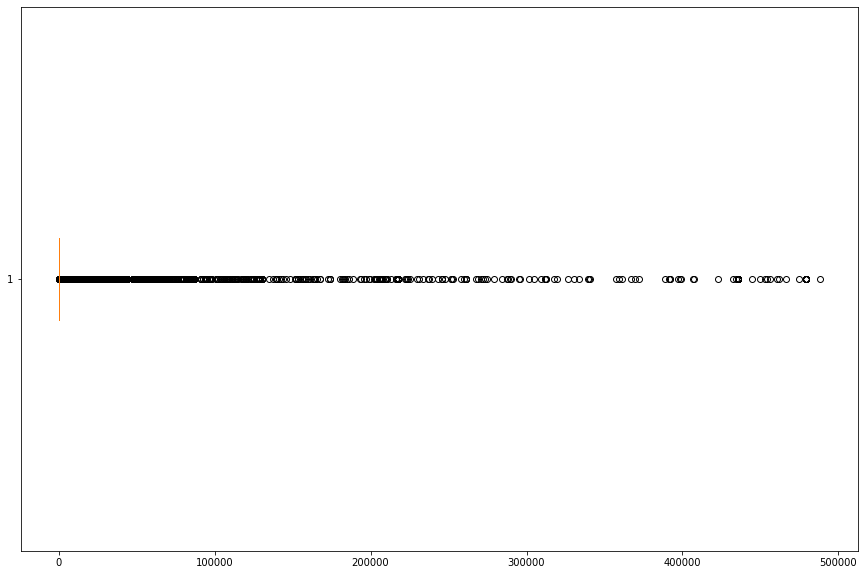

In [399]:
plt.boxplot(data['sqft_beds'], vert=False)

In [400]:
data['count_beds'].describe()

count    343227.000000
mean         49.099529
std         209.998819
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max         999.000000
Name: count_beds, dtype: float64

## Categorical features

In [401]:
df_cat = data.select_dtypes(exclude=[np.number])
col_cat = df_cat.columns.values
col_cat

array(['status', 'propertyType', 'baths', 'city', 'state', 'Heating',
       'Cooling', 'schools_Grades'], dtype=object)

In [402]:
# Перекиним два двоичного признака с числовых в категориальные
col_cat = col_cat.tolist()

col_cat.append('PrivatePool')
col_cat.append('Parking')

col_num = col_num.tolist()

col_num.remove('PrivatePool')
col_num.remove('Parking')
#col_num

In [403]:
for col in  col_cat:
    print(data['target'].groupby(data[col]).sum(), '\n')

status
accepted offer                       4.669000e+05
active                               6.634092e+10
active auction                       5.301046e+08
active backup                        9.725550e+06
active contingency                   1.777300e+06
active contingent                    5.239589e+06
active option                        1.103020e+07
active under contract                6.679729e+08
active with contingencies            2.601300e+06
active with offer                    1.248952e+07
back market                          3.448051e+07
backup contract                      3.483799e+06
closed                               1.696150e+06
coming soon                          5.659883e+07
contingency                          1.472700e+06
contingency contract                 2.738400e+06
contingent                           1.203806e+08
contingent escape                    2.456250e+06
contingent finance and inspection    5.159415e+07
contingent lien holder release       1.0793

In [404]:
# После  EDA, Data Preprocessing  и Feature Engineering сохраним датасет, 
#   чтобы не повторять все расчеты с самого начала.
data.to_csv('df_after_EDA_DP_FE.csv')

In [405]:
df.shape

(343227, 23)

In [406]:
# Загрузим  датасет для использования в модельных расчетах, и сохраним для потоковых расчетах (PipeLine)
df = pd.read_csv('df_after_EDA_DP_FE.csv')

In [407]:
# Для дальнейщих расчетов используем DataFrame 'data'
data = df.copy()

## Подготовка к расчетам 

In [408]:
# Создание dummies feature
data = pd.concat([data, pd.get_dummies(data[col_cat])], axis=1)
data.drop(col_cat, axis=1, inplace=True)

In [409]:
data.columns

Index(['Unnamed: 0', 'fireplace', 'sqft', 'stories', 'target', 'Year built',
       'Remodeled year', 'lotsize', 'Price/sqft', 'schools_rating',
       ...
       'schools_Grades_PK - 8', 'schools_Grades_PK - 9',
       'schools_Grades_Preschool - 10', 'schools_Grades_Preschool - 11',
       'schools_Grades_Preschool - 12', 'schools_Grades_Preschool - 5',
       'schools_Grades_Preschool - 6', 'schools_Grades_Preschool - 7',
       'schools_Grades_Preschool - 8', 'schools_Grades_Preschool - 9'],
      dtype='object', length=685)

In [410]:
data.shape

(343227, 685)

In [411]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data.drop('target', axis=1), data['target'], test_size=0.2, random_state=0)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((274581, 684), (274581,), (68646, 684), (68646,))

In [412]:
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.linear_model import SGDRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
import sklearn.metrics
from sklearn.metrics import   explained_variance_score, max_error, mean_absolute_error, mean_squared_error, mean_squared_log_error,  median_absolute_error, r2_score 

Сделаем функции, которые будут показывать качество моделей в разрезе различных типов метрик

In [413]:
# С делением на 1% для определния отклонения в процентах 
def evaluate(clf, x_train, y_train, x_test, y_test, mode='all'):
    own_predict = clf.predict(x_train)
    
    # Дома не имеют отрицательных цен. 
    own_predict = np.where(own_predict < 1, 1, own_predict)
    
    # Найдем значение эквивалентное 1% в денежном выражении
    one_percent = (y_train.max() - y_train.min())/100
    
    predict = clf.predict(x_test)
    predict = np.where(predict < 1, 1, predict)
    print('\n')
    print(f'''\t\t\t\town evaluate \t\t\tevaluate on test
Explained variance score:\t{explained_variance_score(y_train, own_predict)}\t\t{explained_variance_score(y_test, predict)}\n
Max error:\t\t\t{max_error(y_train, own_predict)/one_percent}\t\t{max_error(y_test, predict)/one_percent}\n
Mean absolute error:\t\t{mean_absolute_error(y_train, own_predict)/one_percent}\t\t{mean_absolute_error(y_test, predict)/one_percent}\n
Mean squared error:\t\t{mean_squared_error(y_train, own_predict)/(one_percent**2)}\t\t{mean_squared_error(y_test, predict)/(one_percent**2)}\n
Mean squared log error:\t\t{mean_squared_log_error(y_train, own_predict)}\t\t{mean_squared_log_error(y_test, predict)}\n
Median absolute error:\t\t{median_absolute_error(y_train, own_predict)/one_percent}\t\t{median_absolute_error(y_test, predict)/one_percent}\n
R^2 score:\t\t\t{r2_score(y_train, own_predict)}\t\t{r2_score(y_test, predict)}''')

In [414]:
# Метрика реальная
def evaluate_real_metric(clf, x_train, y_train, x_test, y_test, mode='all'):
    own_predict = clf.predict(x_train)
    # Дома не имеют отрицательных цен
    own_predict = np.where(own_predict < 1, 1, own_predict)
    predict = clf.predict(x_test)
    predict = np.where(predict < 1, 1, predict)
    print('\n')
    print(f'''\t\t\t\town evaluate \t\t\tevaluate on test
Explained variance score:\t{explained_variance_score(y_train, own_predict)}\t\t{explained_variance_score(y_test, predict)}\n
Max error:\t\t\t{max_error(y_train, own_predict)}\t\t{max_error(y_test, predict)}\n
Mean absolute error:\t\t{mean_absolute_error(y_train, own_predict)}\t\t{mean_absolute_error(y_test, predict)}\n
Mean squared error:\t\t{mean_squared_error(y_train, own_predict)}\t\t{mean_squared_error(y_test, predict)}\n
Mean squared log error:\t\t{mean_squared_log_error(y_train, own_predict)}\t\t{mean_squared_log_error(y_test, predict)}\n
Median absolute error:\t\t{median_absolute_error(y_train, own_predict)}\t\t{median_absolute_error(y_test, predict)}\n
R^2 score:\t\t\t{r2_score(y_train, own_predict)}\t\t{r2_score(y_test, predict)}''')

## Модели

### Без преобразования числовых признаков

In [415]:
my_lr = LinearRegression()
my_lr.fit(x_train, y_train)

LinearRegression()

In [416]:
evaluate(my_lr, x_train, y_train, x_test, y_test)



				own evaluate 			evaluate on test
Explained variance score:	0.4265110513212521		-705592.85621011

Max error:			99.68568462844864		370598.08754800865

Mean absolute error:		0.35636617534558696		7.454456435782416

Mean squared error:		1.8914741460152757		2200072.440876218

Mean squared log error:		17.41545313904288		17.3636348133352

Median absolute error:		0.13662301778468722		0.13768797388054185

R^2 score:			0.4262798175701543		-705609.1565446527


In [417]:
# Запускаем модель с функцией без деление на процент, evaluate_real_metric()
evaluate_real_metric(my_lr, x_train, y_train, x_test, y_test)



				own evaluate 			evaluate on test
Explained variance score:	0.4265110513212521		-705592.85621011

Max error:			99685683.6315918		370598083842.0278

Mean absolute error:		356366.1717819252		7454456.361237852

Mean squared error:		1891474108185.793		2.2000723968747697e+18

Mean squared log error:		17.41545313904288		17.3636348133352

Median absolute error:		136623.01641845703		137687.9725036621

R^2 score:			0.4262798175701543		-705609.1565446527


### Расчеты с масштабирование и стандартизация числовых переменных. Используем PipeLine

In [418]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer, OneHotEncoder
from sklearn.pipeline import FeatureUnion

In [419]:
df.shape

(343227, 24)

In [420]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=0)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((274581, 23), (274581,), (68646, 23), (68646,))

In [421]:
col_num.remove('target')

In [422]:
# Объявляем scaler и OneHotEncoder() для числовых и категориальных переменных соответственно
scaler = StandardScaler() 
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Делаем pipeline для числовых переменных датасета
numerical_selector = FunctionTransformer(lambda data: data[col_num], validate=False)
numerical_preprocessor = Pipeline([("numerical_selector", numerical_selector), ("scaling", scaler)])

# Делаем pipeline для категориальных переменных датасета
dummy_selector = FunctionTransformer(lambda data: data[col_cat], validate=False)
dummy_preprocessor = Pipeline([("dummy_selector", dummy_selector), ("ohe", ohe)])

# Объединяем созданные выше pipeline в один с помощью функции FeatureUnion 
#  и затем записываем итоговый pipeline на примере линейной регрессии
feature_union = FeatureUnion([("numerical_preprocessor", numerical_preprocessor),
                    ("dummy_preprocessor", dummy_preprocessor)])

pipeline = Pipeline([("preprocessing", feature_union), ('lin_reg', LinearRegression())])

In [423]:
# Обучение модели
pipeline.fit(x_train,y_train)
evaluate(pipeline, x_train, y_train, x_test, y_test)



				own evaluate 			evaluate on test
Explained variance score:	0.4268396439543565		-2842762191076391.5

Max error:			99.60790499607906		22232507197.31935

Mean absolute error:		0.3579197967731917		541527.8082145863

Mean squared error:		1.8903794556423519		8863945078085080.0

Mean squared log error:		17.507871713251987		17.528667124616277

Median absolute error:		0.1398900013989		0.13989900139899

R^2 score:			0.42661185803805135		-2842856243251632.5


In [424]:
evaluate_real_metric(pipeline, x_train, y_train, x_test, y_test)



				own evaluate 			evaluate on test
Explained variance score:	0.4268396439543565		-2842762191076391.5

Max error:			99607904.0		2.223250697499428e+16

Mean absolute error:		357919.79319399374		541527802799.3082

Mean squared error:		1890379417834.763		8.863944900806179e+27

Mean squared log error:		17.507871713251987		17.528667124616277

Median absolute error:		139890.0		139899.0

R^2 score:			0.42661185803805135		-2842856243251632.5


#### Скалирование входных данных приводит лишь к ухудшению результата для данной задач

### Выбираем лучшие признаки (feature selection)

In [425]:
x_train, x_test, y_train, y_test = train_test_split(data.drop('target', axis=1), data['target'], test_size=0.2, random_state=0)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((274581, 684), (274581,), (68646, 684), (68646,))

In [426]:
# функция для отбора К лучших признаков по их статистической близости к целевой переменной
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression # числовые признаки и числовой выходной признак
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier

In [427]:
# Методы, основанные на F-тесте, оценивают степень линейной зависимости 
# между двумя случайными величинами.  извлекаем лучшие 100 признаков.
bestfeatures = SelectKBest(score_func=f_regression, k=100)
fit = bestfeatures.fit(x_train,y_train)
# Создаем набор данных признаков с их весом и выбираем 100 лучших
featureScores =  pd.DataFrame({'Features':x_train.columns, 'Score': fit.scores_})
print(featureScores.nlargest(100,'Score'))

                          Features         Score
7                       Price/sqft  71553.527589
334                  city_New York  23530.836163
2                             sqft  18113.990402
442                       state_NY   9529.853615
8                   schools_rating   7089.891844
..                             ...           ...
420                       state_AZ     93.823797
162                 baths_26 Baths     93.353778
678  schools_Grades_Preschool - 12     92.054423
342                     city_Ocala     90.514706
4                       Year built     89.351061

[100 rows x 2 columns]


/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


In [428]:
# Пробуем с разным количеством признаков. Сначало выберем 100 признаков.
x_train_100 = x_train[featureScores.nlargest(100,'Score').Features.values]
x_test_100 = x_test[featureScores.nlargest(100,'Score').Features.values]

#### Эксперименты с линейной регрессией

In [429]:
my_lr_100 = LinearRegression()
my_lr_100.fit(x_train_100, y_train)
evaluate(my_lr, x_train, y_train, x_test, y_test)
evaluate(my_lr_100, x_train_100, y_train, x_test_100, y_test)



				own evaluate 			evaluate on test
Explained variance score:	0.4265110513212521		-705592.85621011

Max error:			99.68568462844864		370598.08754800865

Mean absolute error:		0.35636617534558696		7.454456435782416

Mean squared error:		1.8914741460152757		2200072.440876218

Mean squared log error:		17.41545313904288		17.3636348133352

Median absolute error:		0.13662301778468722		0.13768797388054185

R^2 score:			0.4262798175701543		-705609.1565446527


				own evaluate 			evaluate on test
Explained variance score:	0.4186920713031531		0.42472316334416116

Max error:			99.75126085945313		86.88782880593877

Mean absolute error:		0.358037046655577		0.35293446021309594

Mean squared error:		1.9172602842679396		1.7944425379603213

Mean squared log error:		17.529088090909813		17.3698760364725

Median absolute error:		0.13348438873786825		0.13399900133999001

R^2 score:			0.4184583900483212		0.42448400489199867


In [430]:
x_train_20 = x_train[featureScores.nlargest(20,'Score').Features.values]
x_test_20 = x_test[featureScores.nlargest(20,'Score').Features.values]
my_lr_20 = LinearRegression()
my_lr_20.fit(x_train_20, y_train)
evaluate(my_lr, x_train, y_train, x_test, y_test)
evaluate(my_lr_20, x_train_20, y_train, x_test_20, y_test)



				own evaluate 			evaluate on test
Explained variance score:	0.4265110513212521		-705592.85621011

Max error:			99.68568462844864		370598.08754800865

Mean absolute error:		0.35636617534558696		7.454456435782416

Mean squared error:		1.8914741460152757		2200072.440876218

Mean squared log error:		17.41545313904288		17.3636348133352

Median absolute error:		0.13662301778468722		0.13768797388054185

R^2 score:			0.4262798175701543		-705609.1565446527


				own evaluate 			evaluate on test
Explained variance score:	0.3700478127343172		0.3696504561684132

Max error:			99.77983412831716		87.85907587853212

Mean absolute error:		0.4004724043089798		0.39633477992811905

Mean squared error:		2.0771730565475215		1.9657001385799122

Mean squared log error:		17.663640197951626		17.551961929988188

Median absolute error:		0.18311365256638254		0.182142241885114

R^2 score:			0.36995379638079384		0.36955803966581546


In [431]:
evaluate_real_metric(my_lr, x_train, y_train, x_test, y_test)
evaluate_real_metric(my_lr_20, x_train_20, y_train, x_test_20, y_test)



				own evaluate 			evaluate on test
Explained variance score:	0.4265110513212521		-705592.85621011

Max error:			99685683.6315918		370598083842.0278

Mean absolute error:		356366.1717819252		7454456.361237852

Mean squared error:		1891474108185.793		2.2000723968747697e+18

Mean squared log error:		17.41545313904288		17.3636348133352

Median absolute error:		136623.01641845703		137687.9725036621

R^2 score:			0.4262798175701543		-705609.1565446527


				own evaluate 			evaluate on test
Explained variance score:	0.3700478127343172		0.3696504561684132

Max error:			99779833.13051882		87859074.99994136

Mean absolute error:		400472.4003042557		396334.7759647712

Mean squared error:		2077173015004.0608		1965700099265.9097

Mean squared log error:		17.663640197951626		17.551961929988188

Median absolute error:		183113.65073524602		182142.24006369157

R^2 score:			0.36995379638079384		0.36955803966581546


In [447]:
x_train_10 = x_train[featureScores.nlargest(10,'Score').Features.values]
x_test_10 = x_test[featureScores.nlargest(10,'Score').Features.values]
my_lr_10 = LinearRegression()
my_lr_10.fit(x_train_10, y_train)
evaluate(my_lr, x_train, y_train, x_test, y_test)
evaluate(my_lr_10, x_train_10, y_train, x_test_10, y_test)



				own evaluate 			evaluate on test
Explained variance score:	0.4265110513212521		-705592.85621011

Max error:			99.68568462844864		370598.08754800865

Mean absolute error:		0.35636617534558696		7.454456435782416

Mean squared error:		1.8914741460152757		2200072.440876218

Mean squared log error:		17.41545313904288		17.3636348133352

Median absolute error:		0.13662301778468722		0.13768797388054185

R^2 score:			0.4262798175701543		-705609.1565446527


				own evaluate 			evaluate on test
Explained variance score:	0.3360408900236369		0.3474447932359873

Max error:			100.0		88.08166191992345

Mean absolute error:		0.4087529185889068		0.40536362234851037

Mean squared error:		2.189704591392503		2.035398033336395

Mean squared log error:		19.02138041235993		18.950052201234666

Median absolute error:		0.19499900194999		0.19466324097899906

R^2 score:			0.3358208356758412		0.3472044382496875


In [449]:
evaluate_real_metric(my_lr, x_train, y_train, x_test, y_test)
evaluate_real_metric(my_lr_10, x_train_10, y_train, x_test_10, y_test)



				own evaluate 			evaluate on test
Explained variance score:	0.4265110513212521		-705592.85621011

Max error:			99685683.6315918		370598083842.0278

Mean absolute error:		356366.1717819252		7454456.361237852

Mean squared error:		1891474108185.793		2.2000723968747697e+18

Mean squared log error:		17.41545313904288		17.3636348133352

Median absolute error:		136623.01641845703		137687.9725036621

R^2 score:			0.4262798175701543		-705609.1565446527


				own evaluate 			evaluate on test
Explained variance score:	0.3360408900236369		0.3474447932359873

Max error:			99999999.0		88081661.03910683

Mean absolute error:		408752.9145013776		405363.61829487415

Mean squared error:		2189704547598.4114		2035397992628.4346

Mean squared log error:		19.02138041235993		18.950052201234666

Median absolute error:		194999.0		194663.23903236666

R^2 score:			0.3358208356758412		0.3472044382496875


In [432]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
dtr_20 = DecisionTreeRegressor()
dtr_20.fit(x_train_20, y_train)
evaluate(dtr, x_train, y_train, x_test, y_test)
evaluate(dtr_20, x_train_20, y_train, x_test_20, y_test)



				own evaluate 			evaluate on test
Explained variance score:	1.0		0.6616191731295076

Max error:			0.0		83.9900008399

Mean absolute error:		0.0		0.12629958980420733

Mean squared error:		0.0		1.0550655963865188

Mean squared log error:		0.0		0.18714568637071807

Median absolute error:		0.0		0.001100000011

R^2 score:			1.0		0.6616179600274106


				own evaluate 			evaluate on test
Explained variance score:	0.8482226778686512		0.671900109830577

Max error:			86.64780865076884		82.65095055001181

Mean absolute error:		0.06789763439197574		0.14408024964792493

Mean squared error:		0.500388324404088		1.0230239691736234

Mean squared log error:		0.18657981450450886		0.3483939086422625

Median absolute error:		0.0		0.0010000000100000002

R^2 score:			0.8482226778686512		0.6718943932818684


In [433]:
evaluate_real_metric(dtr, x_train, y_train, x_test, y_test)
evaluate_real_metric(dtr_20, x_train_20, y_train, x_test_20, y_test)



				own evaluate 			evaluate on test
Explained variance score:	1.0		0.6616191731295076

Max error:			0.0		83990000.0

Mean absolute error:		0.0		126299.58854121143

Mean squared error:		0.0		1055065575285.207

Mean squared log error:		0.0		0.18714568637071807

Median absolute error:		0.0		1100.0

R^2 score:			1.0		0.6616179600274106


				own evaluate 			evaluate on test
Explained variance score:	0.8482226778686512		0.671900109830577

Max error:			86647807.78429075		82650949.72350231

Mean absolute error:		67897.63371299939		144080.24820712244

Mean squared error:		500388314396.3216		1023023948713.1442

Mean squared log error:		0.18657981450450886		0.3483939086422625

Median absolute error:		0.0		1000.0

R^2 score:			0.8482226778686512		0.6718943932818684


Расчеты с выделенными лучшими признаками

In [434]:
SGDR = SGDRegressor()
SGDR.fit(x_train, y_train)
SGDR_20 = SGDRegressor()
SGDR_20.fit(x_train_20, y_train)
evaluate(SGDR, x_train, y_train, x_test, y_test)
evaluate(SGDR_20, x_train_20, y_train, x_test_20, y_test)



				own evaluate 			evaluate on test
Explained variance score:	-2.907217569102738e+18		-3.0483432527018025e+18

Max error:			25589105377.94891		22942139948.41886

Mean absolute error:		1655062588.4829228		1647762454.0684977

Mean squared error:		1.2323916544903959e+19		1.2219768843248808e+19

Mean squared log error:		255.94091396709177		255.8059727026765

Median absolute error:		0.49694900496949007		0.49899900498999006

R^2 score:			-3.7380789281670636e+18		-3.9191405002056387e+18


				own evaluate 			evaluate on test
Explained variance score:	-307789473472708.7		-318452898331518.25

Max error:			499290657.0137616		490415275.15096414

Mean absolute error:		7506101.833097278		7403600.7710083425

Mean squared error:		1071079830763320.1		1047740388383954.6

Mean squared log error:		166.1640597452795		166.18666482565095

Median absolute error:		0.37498700374987004		0.37499900374999007

R^2 score:			-324878940162630.0		-336032689528767.2


In [435]:
evaluate_real_metric(SGDR, x_train, y_train, x_test, y_test)
evaluate_real_metric(SGDR_20, x_train_20, y_train, x_test_20, y_test)



				own evaluate 			evaluate on test
Explained variance score:	-2.907217569102738e+18		-3.0483432527018025e+18

Max error:			2.5589105122057856e+16		2.294213971899746e+16

Mean absolute error:		1655062571932297.0		1647762437590873.0

Mean squared error:		1.2323916298425629e+31		1.2219768598853433e+31

Mean squared log error:		255.94091396709177		255.8059727026765

Median absolute error:		496949.0		498999.0

R^2 score:			-3.7380789281670636e+18		-3.9191405002056387e+18


				own evaluate 			evaluate on test
Explained variance score:	-307789473472708.7		-318452898331518.25

Max error:			499290652020855.0		490415270246811.4

Mean absolute error:		7506101758036.26		7403600696972.335

Mean squared error:		1.0710798093417236e+27		1.047740367429147e+27

Mean squared log error:		166.1640597452795		166.18666482565095

Median absolute error:		374987.0		374999.0

R^2 score:			-324878940162630.0		-336032689528767.2


In [436]:
# Теория рекомендует при n-samples>10000 использовать модель HistGradientBoostingRegressor
GBR = GradientBoostingRegressor()
GBR.fit(x_train, y_train)
GBR_20 = GradientBoostingRegressor()
GBR_20.fit(x_train_20, y_train)
evaluate(GBR, x_train, y_train, x_test, y_test)
evaluate(GBR_20, x_train_20, y_train, x_test_20, y_test)



				own evaluate 			evaluate on test
Explained variance score:	0.7085824134205961		0.7048348173222124

Max error:			86.51208966402996		81.92380296601179

Mean absolute error:		0.21393192051279403		0.21293257399862206

Mean squared error:		0.960762489432751		0.9203186420014265

Mean squared log error:		0.5244203582260264		0.5130247934403532

Median absolute error:		0.07276356651998665		0.07254758954503003

R^2 score:			0.708582413420596		0.7048341822803984


				own evaluate 			evaluate on test
Explained variance score:	0.6911509035572079		0.7032413112511717

Max error:			86.55105711842785		81.79510612509594

Mean absolute error:		0.2053712576433344		0.2038140280763974

Mean squared error:		1.0182317074285636		0.9252920986081713

Mean squared log error:		0.4762254943202944		0.4656798481240603

Median absolute error:		0.0568760764335258		0.05680534629578034

R^2 score:			0.6911509035571819		0.7032390886690918


In [437]:
evaluate_real_metric(GBR, x_train, y_train, x_test, y_test)
evaluate_real_metric(GBR_20, x_train_20, y_train, x_test_20, y_test)



				own evaluate 			evaluate on test
Explained variance score:	0.7085824134205961		0.7048348173222124

Max error:			86512088.79890905		81923802.14677376

Mean absolute error:		213931.91837347482		212932.5718692963

Mean squared error:		960762470217.5013		920318623595.0538

Mean squared log error:		0.5244203582260264		0.5130247934403532

Median absolute error:		72763.56579235099		72547.58881955413

R^2 score:			0.708582413420596		0.7048341822803984


				own evaluate 			evaluate on test
Explained variance score:	0.6911509035572079		0.7032413112511717

Max error:			86551056.25291727		81795105.30714488

Mean absolute error:		205371.2555896218		203814.0260382571

Mean squared error:		1018231687063.9297		925292080102.3295

Mean squared log error:		0.4762254943202944		0.4656798481240603

Median absolute error:		56876.07586476504		56805.345727726875

R^2 score:			0.6911509035571819		0.7032390886690918


In [438]:
HGBR = HistGradientBoostingRegressor()
HGBR.fit(x_train, y_train)
HGBR_20 = HistGradientBoostingRegressor()
HGBR_20.fit(x_train_20, y_train)
evaluate(HGBR, x_train, y_train, x_test, y_test)
evaluate(HGBR_20, x_train_20, y_train, x_test_20, y_test)



				own evaluate 			evaluate on test
Explained variance score:	0.7884793462278068		0.760648927826131

Max error:			86.55522200307108		81.66883317262827

Mean absolute error:		0.15461829118393294		0.15687906386714384

Mean squared error:		0.6973552689804352		0.7462898522048824

Mean squared log error:		0.3865882518782498		0.38013131003956774

Median absolute error:		0.03481507933654101		0.034878090010033454

R^2 score:			0.7884788470512679		0.760648926981582


				own evaluate 			evaluate on test
Explained variance score:	0.7216234586949042		0.7197262193087415

Max error:			87.663706489078		82.0970332301863

Mean absolute error:		0.16725784349038175		0.16815285797472845

Mean squared error:		0.9177680466286375		0.8738912980017585

Mean squared log error:		0.39123375154656787		0.3856883843463199

Median absolute error:		0.028849219009819387		0.028881941763256053

R^2 score:			0.7216234479073801		0.7197244217374733


In [439]:
evaluate_real_metric(HGBR, x_train, y_train, x_test, y_test)
evaluate_real_metric(HGBR_20, x_train_20, y_train, x_test_20, y_test)



				own evaluate 			evaluate on test
Explained variance score:	0.7884793462278068		0.760648927826131

Max error:			86555221.13751885		81668832.35593994

Mean absolute error:		154618.28963775004		156879.0622983532

Mean squared error:		697355255033.33		746289837279.0854

Mean squared log error:		0.3865882518782498		0.38013131003956774

Median absolute error:		34815.07898839022		34878.089661252554

R^2 score:			0.7884788470512679		0.760648926981582


				own evaluate 			evaluate on test
Explained variance score:	0.7216234586949042		0.7197262193087415

Max error:			87663705.61244093		82097032.40921597

Mean absolute error:		167257.8418178033		168152.85629319987

Mean squared error:		917768028273.2767		873891280523.9326

Mean squared log error:		0.39123375154656787		0.3856883843463199

Median absolute error:		28849.218721327197		28881.941474436637

R^2 score:			0.7216234479073801		0.7197244217374733


In [440]:
ABR = AdaBoostRegressor()
ABR.fit(x_train, y_train)
ABR_20 = AdaBoostRegressor()
ABR_20.fit(x_train_20, y_train)
evaluate(ABR, x_train, y_train, x_test, y_test)
evaluate(ABR_20, x_train_20, y_train, x_test_20, y_test)



				own evaluate 			evaluate on test
Explained variance score:	-7.210088332499264		-7.546829561439386

Max error:			38.838807928765455		55.880289943981644

Mean absolute error:		7.599740017947681		7.5755769682071055

Mean squared error:		84.22500913087644		83.47813977256024

Mean squared log error:		10.26048189888332		10.217057846092983

Median absolute error:		5.761292517235549		5.761292517235549

R^2 score:			-24.547051597569975		-25.77321990793787


				own evaluate 			evaluate on test
Explained variance score:	0.35628081444116977		0.3559835569351939

Max error:			86.33540292523486		76.92101709130577

Mean absolute error:		0.5751628749411986		0.5713380027924683

Mean squared error:		2.168703627084542		2.0541175239166667

Mean squared log error:		1.49290185468948		1.4757293060230015

Median absolute error:		0.3946979420661483		0.3946979420661483

R^2 score:			0.34219082867804473		0.34120069835759514


In [441]:
evaluate_real_metric(ABR, x_train, y_train, x_test, y_test)
evaluate_real_metric(ABR_20, x_train_20, y_train, x_test_20, y_test)



				own evaluate 			evaluate on test
Explained variance score:	-7.210088332499264		-7.546829561439386

Max error:			38838807.54037738		55880289.385178745

Mean absolute error:		7599739.941950281		7575576.892451336

Mean squared error:		84225007446376.27		83478138102997.45

Mean squared log error:		10.26048189888332		10.217057846092983

Median absolute error:		5761292.459622623		5761292.459622623

R^2 score:			-24.547051597569975		-25.77321990793787


				own evaluate 			evaluate on test
Explained variance score:	0.35628081444116977		0.3559835569351939

Max error:			86335402.06188083		76921016.3220956

Mean absolute error:		575162.8691895698		571337.9970790882

Mean squared error:		2168703583710.4697		2054117482834.3164

Mean squared log error:		1.49290185468948		1.4757293060230015

Median absolute error:		394697.93811916886		394697.93811916886

R^2 score:			0.34219082867804473		0.34120069835759514


In [442]:
# Результаты моделя хорошие, но слишком долг считает, поэтому закомментирован на время экспериментов
'''
RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)
RFR_20 = RandomForestRegressor()
RFR_20.fit(x_train_20, y_train)
evaluate(RFR, x_train, y_train, x_test, y_test)
evaluate(RFR_20, x_train_20, y_train, x_test_20, y_test)
'''

'\nRFR = RandomForestRegressor()\nRFR.fit(x_train, y_train)\nRFR_20 = RandomForestRegressor()\nRFR_20.fit(x_train_20, y_train)\nevaluate(RFR, x_train, y_train, x_test, y_test)\nevaluate(RFR_20, x_train_20, y_train, x_test_20, y_test)\n'

In [443]:
'''
evaluate_real_metric(RFR, x_train, y_train, x_test, y_test)
evaluate_real_metric(RFR_20, x_train_20, y_train, x_test_20, y_test)
'''

'\nevaluate_real_metric(RFR, x_train, y_train, x_test, y_test)\nevaluate_real_metric(RFR_20, x_train_20, y_train, x_test_20, y_test)\n'

### Использование SelectFromModel для выбора признаков

In [444]:
embeded_lr_selector = SelectFromModel(LinearRegression(), max_features=20)
embeded_lr_selector.fit(x_train, y_train)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = x_train.loc[:,embeded_lr_support].columns.tolist()
print(featureScores.nlargest(20,'Score'))
print(str(embeded_lr_feature), 'selected features')

             Features         Score
7          Price/sqft  71553.527589
334     city_New York  23530.836163
2                sqft  18113.990402
442          state_NY   9529.853615
8      schools_rating   7089.891844
216     baths_9 Baths   6268.741231
207     baths_7 Baths   5917.158290
213     baths_8 Baths   5687.880824
127    baths_10 Baths   5058.263287
200     baths_6 Baths   4494.496717
159    baths_23 Baths   4389.957043
145     baths_2 Baths   3696.578933
130    baths_11 Baths   3287.790950
193     baths_5 Baths   3006.755785
422          state_CA   2970.646114
319  city_Los Angeles   2829.506755
138    baths_14 Baths   2580.291602
3             stories   2148.298254
325  city_Miami Beach   2022.631164
134    baths_12 Baths   1491.977653
['status_accepted offer', 'status_active auction', 'status_active contingency', 'status_active contingent', 'status_active option', 'status_active with contingencies', 'status_active with offer', 'status_contingent finance and inspection', 'sta

In [445]:
embeded_lr_feature.extend(featureScores.nlargest(20,'Score').Features.values)
emb_20 = LinearRegression()
emb_20.fit(x_train[embeded_lr_feature], y_train)
evaluate(my_lr, x_train, y_train, x_test, y_test)
evaluate(emb_20, x_train[embeded_lr_feature], y_train, x_test[embeded_lr_feature], y_test)



				own evaluate 			evaluate on test
Explained variance score:	0.4265110513212521		-705592.85621011

Max error:			99.68568462844864		370598.08754800865

Mean absolute error:		0.35636617534558696		7.454456435782416

Mean squared error:		1.8914741460152757		2200072.440876218

Mean squared log error:		17.41545313904288		17.3636348133352

Median absolute error:		0.13662301778468722		0.13768797388054185

R^2 score:			0.4262798175701543		-705609.1565446527


				own evaluate 			evaluate on test
Explained variance score:	0.3706592443647977		0.3703032445188532

Max error:			99.7929888312964		87.83383329996576

Mean absolute error:		0.3991089385309954		0.3950756476195688

Mean squared error:		2.0751482170306716		1.9636482389945578

Mean squared log error:		17.170939728006207		17.063290208464256

Median absolute error:		0.17999900179999		0.17954859204783707

R^2 score:			0.37056796882372445		0.3702161276272551


In [446]:
evaluate_real_metric(my_lr, x_train, y_train, x_test, y_test)
evaluate_real_metric(emb_20, x_train[embeded_lr_feature], y_train, x_test[embeded_lr_feature], y_test)



				own evaluate 			evaluate on test
Explained variance score:	0.4265110513212521		-705592.85621011

Max error:			99685683.6315918		370598083842.0278

Mean absolute error:		356366.1717819252		7454456.361237852

Mean squared error:		1891474108185.793		2.2000723968747697e+18

Mean squared log error:		17.41545313904288		17.3636348133352

Median absolute error:		136623.01641845703		137687.9725036621

R^2 score:			0.4262798175701543		-705609.1565446527


				own evaluate 			evaluate on test
Explained variance score:	0.3706592443647977		0.3703032445188532

Max error:			99792987.83336651		87833832.42162743

Mean absolute error:		399108.934539906		395075.64366881235

Mean squared error:		2075148175527.7078		1963648199721.5933

Mean squared log error:		17.170939728006207		17.063290208464256

Median absolute error:		179999.0		179548.59025235116

R^2 score:			0.37056796882372445		0.3702161276272551
